# Exploratory Analysis

In [1]:
#same as when not random since this is model part not prediction part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory','Urea']]
df_96on.tail()

Date  Dollar  Crude    Corn    Gas  My_Coal  Monthly Imports  \
1057   4/8/2016  94.235  40.99  365.00  2.077    49.85          1000000   
1058  4/15/2016  94.696  41.71  382.00  1.997    50.85          1000000   
1059  4/22/2016  95.116  44.54  375.50  2.267    51.00          1000000   
1060  4/29/2016  93.082  46.69  391.75  2.322    50.75          1000000   
1061  4/30/2016  93.082  46.69  391.75  2.322    50.75          1000000   

        Urea_Prod  Urea_Inventory     UAN  UAN_Inventory  Urea  
1057  316641.6667          300000  209.92    998987.8733   248  
1058  316641.6667          300000  205.12    998987.8733   255  
1059  316641.6667          300000  205.12    998987.8733   238  
1060  316641.6667          300000  212.16    998987.8733   232  
1061  316641.6667          300000  212.16    998987.8733   232

In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
My_Coal                   float64
Monthly Imports             int64
Urea_Prod                 float64
Urea_Inventory              int64
UAN                       float64
UAN_Inventory             float64
Urea                        int64
dtype: object

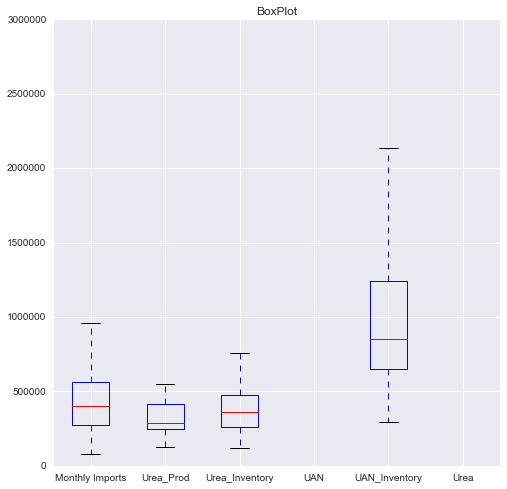

In [3]:
plt.show(df_96on[['Monthly Imports','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory','Urea']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

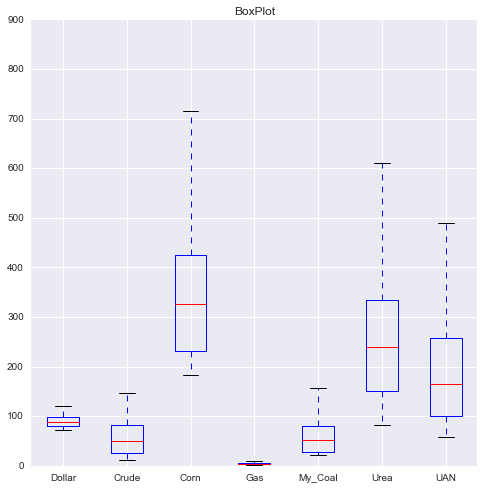

In [4]:
#no urea_prod and monthly imports urea_inventory since too big compared to others so not able to see them
plt.show(df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea','UAN']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

In [5]:
df_96on.describe()

Dollar        Crude         Corn          Gas      My_Coal  \
count  1062.000000  1062.000000  1062.000000  1062.000000  1062.000000   
mean     90.673056    54.785461   361.748588     4.598145    58.269067   
std      11.704768    31.243572   156.648138     2.364433    33.567989   
min      71.657000    11.260000   182.500000     1.661000    20.900000   
25%      81.181750    26.417500   231.062500     2.762500    27.425593   
50%      87.900000    49.170000   325.500000     4.025500    51.840000   
75%      98.708250    81.967500   424.437500     5.824750    79.675000   
max     119.900000   145.860000   809.250000    14.431000   192.500000   

       Monthly Imports      Urea_Prod  Urea_Inventory          UAN  \
count      1062.000000    1062.000000     1062.000000  1062.000000   
mean     437717.487759  321111.410575   379240.621469   183.703955   
std      226058.674754   97500.498985   150650.515279    96.550610   
min       76875.000000  129670.329700   117546.000000    58.000000   
25%      273879.500000  246470.588200   259783.750000   101.200000   
50%      399137.000000  287209.302300   359240.500000   165.200000   
75%      562811.000000  418566.750000   478000.000000   257.680000   
max     1400000.000000  549000.000000   843000.000000   514.880000   

        UAN_Inventory         Urea  
count     1062.000000  1062.000000  
mean   1005441.983512   260.028249  
std     490773.222051   135.620177  
min     297701.149400    83.000000  
25%     650601.513700   151.250000  
50%     850475.860200   240.000000  
75%    1245263.158000   335.000000  
max    2588392.857000   825.000000

In [6]:
df_96on.corr() #gas and monthly imports no apparent correlation to urea

Dollar     Crude      Corn       Gas   My_Coal  \
Dollar           1.000000 -0.775038 -0.681901 -0.330457 -0.755347   
Crude           -0.775038  1.000000  0.777411  0.393632  0.894882   
Corn            -0.681901  0.777411  1.000000 -0.001415  0.835389   
Gas             -0.330457  0.393632 -0.001415  1.000000  0.285473   
My_Coal         -0.755347  0.894882  0.835389  0.285473  1.000000   
Monthly Imports -0.255140  0.379346  0.324131  0.156109  0.328468   
Urea_Prod        0.558864 -0.740514 -0.484917 -0.479290 -0.644274   
Urea_Inventory   0.512081 -0.589771 -0.362287 -0.243438 -0.454161   
UAN             -0.699618  0.879090  0.817191  0.344626  0.896790   
UAN_Inventory    0.526080 -0.583918 -0.371072 -0.481610 -0.491347   
Urea            -0.728465  0.870389  0.799823  0.324833  0.882454   

                 Monthly Imports  Urea_Prod  Urea_Inventory       UAN  \
Dollar                 -0.255140   0.558864        0.512081 -0.699618   
Crude                   0.379346  -0.740514       -0.589771  0.879090   
Corn                    0.324131  -0.484917       -0.362287  0.817191   
Gas                     0.156109  -0.479290       -0.243438  0.344626   
My_Coal                 0.328468  -0.644274       -0.454161  0.896790   
Monthly Imports         1.000000  -0.436865       -0.207568  0.468589   
Urea_Prod              -0.436865   1.000000        0.630979 -0.701339   
Urea_Inventory         -0.207568   0.630979        1.000000 -0.483051   
UAN                     0.468589  -0.701339       -0.483051  1.000000   
UAN_Inventory          -0.216165   0.677104        0.714760 -0.529593   
Urea                    0.402426  -0.644789       -0.522455  0.953766   

                 UAN_Inventory      Urea  
Dollar                0.526080 -0.728465  
Crude                -0.583918  0.870389  
Corn                 -0.371072  0.799823  
Gas                  -0.481610  0.324833  
My_Coal              -0.491347  0.882454  
Monthly Imports      -0.216165  0.402426  
Urea_Prod             0.677104 -0.644789  
Urea_Inventory        0.714760 -0.522455  
UAN                  -0.529593  0.953766  
UAN_Inventory         1.000000 -0.532196  
Urea                 -0.532196  1.000000

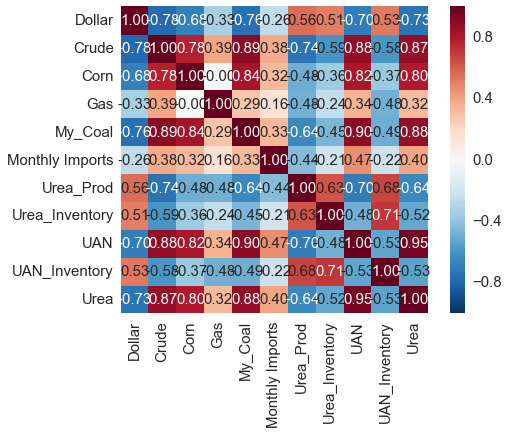

In [7]:
cols= ['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory','Urea']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#many of the x variables correlated to each other
#dollar to crude, corn, coal, urea_prod
#crude to dollar, corn, coal, urea_prod
#corn to dollar, crude, coal
#gas to nothing
#coal to dollar, crude, corn, urea_prod
#monthly import to nothing
#urea_prod to dollar, crude, coal
#urea_Inventory to dollar, crude,  urea_prod (nice since not correlated to coal)
#uan to dollar, crude, corn, coal, urea_prod, UAN_inventory
#uan_Inventory to dollar, coal, urea_prod, urea_inventory, uan
#urea to coal, crude, corn, dollar, urea_prod, urea_inventory,UAN,UAN_inventory

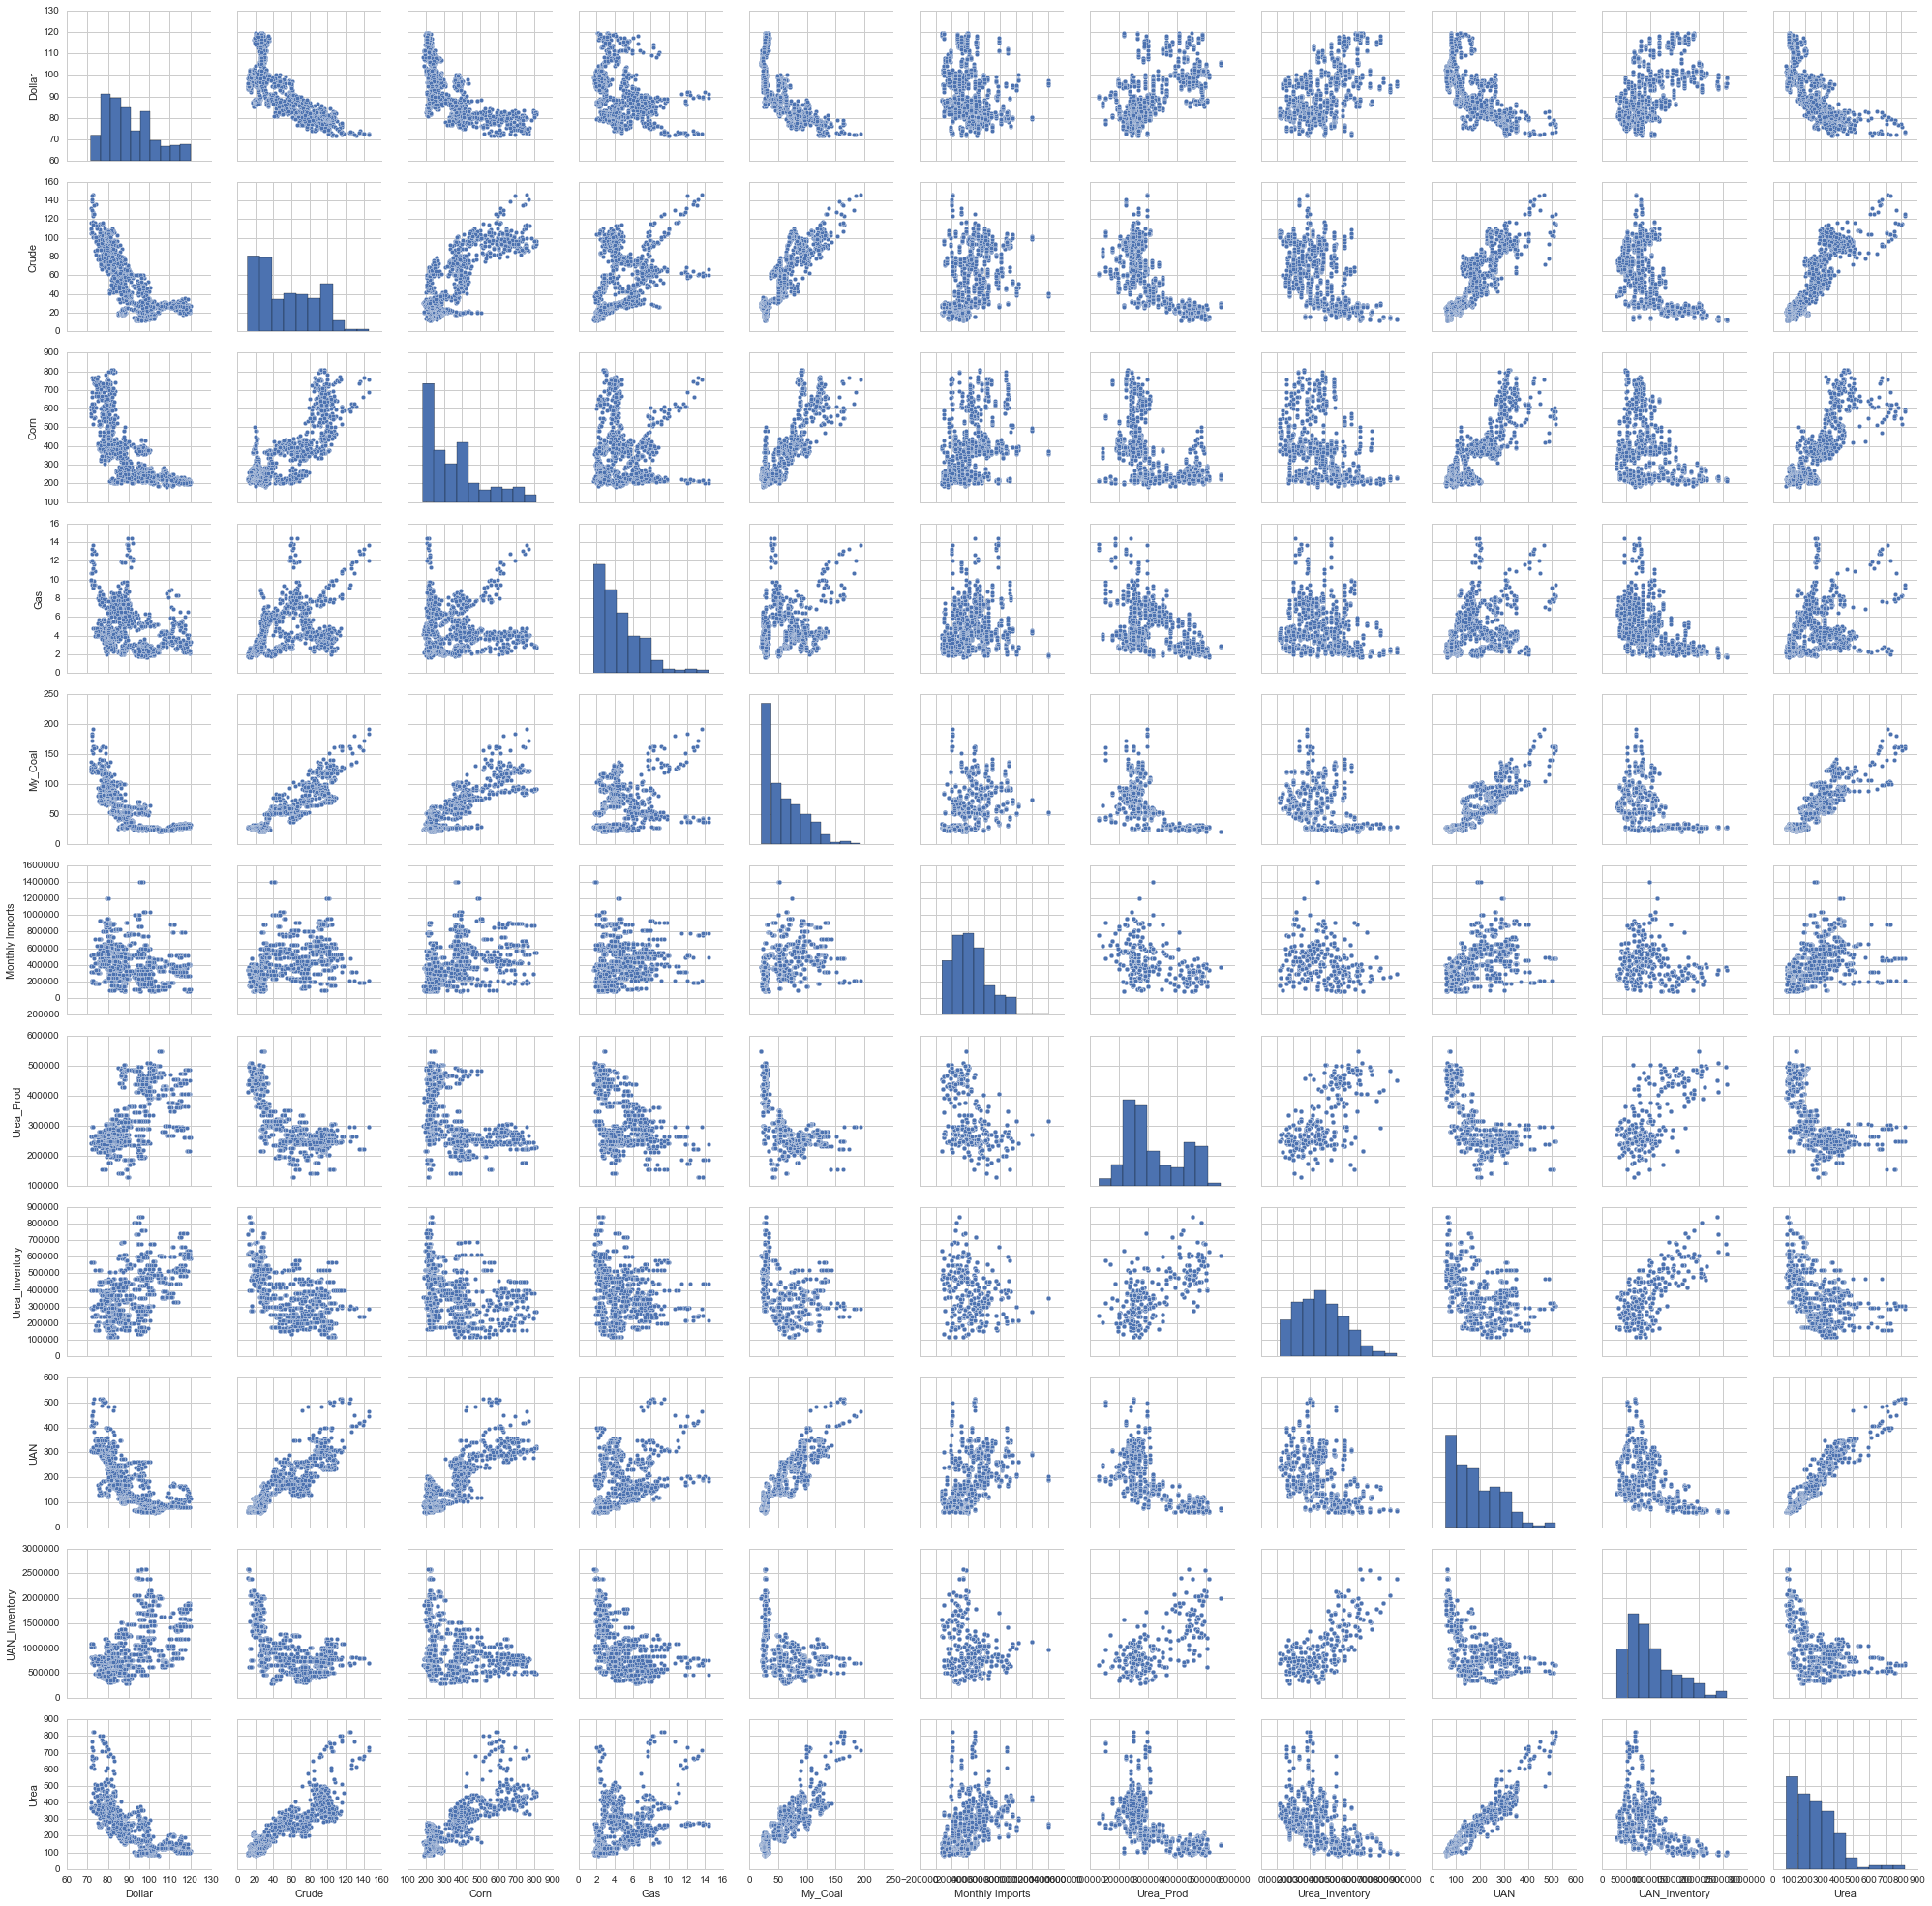

In [8]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()
#pretty much all variables are positively skewed

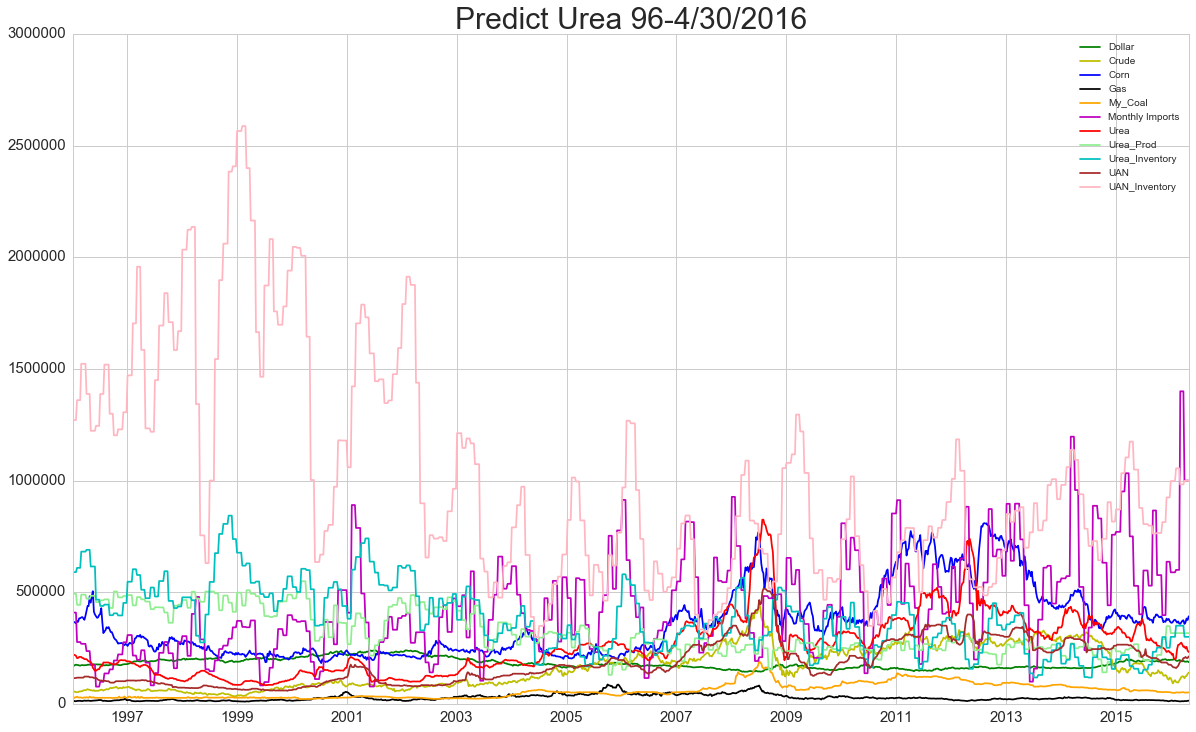

In [11]:
#trend, just modify to look at the different variables and scaling
x = date
y1 = (df_96on['Dollar'])*2000
y2 = (df_96on['Crude'])*3000
y3 = (df_96on['Corn'])*1000
y4 = (df_96on['Gas'])*6000
y5 = (df_96on['My_Coal'])*1000
y6 = (df_96on['Monthly Imports'])
y8 = (df_96on['Urea_Prod'])
y9 = (df_96on['Urea_Inventory'])
y7 = (df_96on['Urea'])*1000
y10 = (df_96on['UAN'])*1000
y11 = (df_96on['UAN_Inventory'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'k')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'m')
ax.plot(x,y7,'r')
ax.plot(x,y8,'lightgreen')
ax.plot(x,y9,'c')
ax.plot(x,y10,'brown')
ax.plot(x,y11,'lightpink')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Predict Urea 96-4/30/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

## Look at different MLR's since different X variables are highly correlated to each other

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1341.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:12:16   Log-Likelihood:                -5328.7
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1051   BIC:                         1.073e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              64.7775     20.794      3.115      0.002        23.974   105.581
Dollar             -0.7975      0.165     -4.820      0.000        -1.122    -0.473
Crude               0.2805      0.108      2.600      0.009         0.069     0.492
Corn               -0.0126      0.018     -0.717      0.474        -0.047     0.022
Gas                 0.3175      0.729      0.435      0.663        -1.113     1.748
My_Coal             0.2272      0.099      2.302      0.022         0.034     0.421
Monthly Imports -1.316e-05   6.01e-06     -2.188      0.029      -2.5e-05 -1.36e-06
Urea_Prod           0.0002   2.13e-05      8.524      0.000         0.000     0.000
Urea_Inventory  -8.809e-05   1.25e-05     -7.059      0.000        -0.000 -6.36e-05
UAN                 1.2126      0.034     35.702      0.000         1.146     1.279
UAN_Inventory     1.78e-07   3.93e-06      0.045      0.964     -7.53e-06  7.88e-06
==============================================================================
Omnibus:                      191.769   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              906.856
Skew:                           0.756   Prob(JB):                    1.20e-197
Kurtosis:                       7.267   Cond. No.                     2.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forward selection

#### Step 1, 1 variable regressions to see which one has lowest AIC (not p-value since p-value may give high values 
#### to variables that have high correlation)

In [13]:
#dollar
X = df_96on[['Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12642.0358444
const     7.786272e-255
Dollar    2.597162e-176
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1198.
Date:                Thu, 19 May 2016   Prob (F-statistic):          2.60e-176
Time:                        12:18:50   Log-Likelihood:                -6319.0
No. Observations:                1062   AIC:                         1.264e+04
Df Residuals:                    1060   BIC:                         1.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1025.3573     22.290     46.000      0.000       981.619  1069.095
Dollar        -8.4405      0.244    -34.619      0.000        -8.919    -7.962
==============================================================================
Omnibus:                      327.835   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1071.407
Skew:                           1.504   Prob(JB):                    2.22e-233
Kurtosis:                       6.894   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#crude
X = df_96on[['Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()


11940.4366641
const    4.755654e-35
Crude    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     3313.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:18:54   Log-Likelihood:                -5968.2
No. Observations:                1062   AIC:                         1.194e+04
Df Residuals:                    1060   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         53.0417      4.140     12.813      0.000        44.919    61.164
Crude          3.7781      0.066     57.554      0.000         3.649     3.907
==============================================================================
Omnibus:                      357.277   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1748.526
Skew:                           1.486   Prob(JB):                         0.00
Kurtosis:                       8.539   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#corn
X = df_96on[['Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12361.2052828
const     1.300290e-01
Corn     3.215925e-237
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 19 May 2016   Prob (F-statistic):          3.22e-237
Time:                        12:18:55   Log-Likelihood:                -6178.6
No. Observations:                1062   AIC:                         1.236e+04
Df Residuals:                    1060   BIC:                         1.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.5328      6.292      1.515      0.130        -2.813    21.878
Corn           0.6925      0.016     43.384      0.000         0.661     0.724
==============================================================================
Omnibus:                      344.259   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1395.322
Skew:                           1.496   Prob(JB):                    1.02e-303
Kurtosis:                       7.752   Cond. No.                         992.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#coal
X = df_96on[['My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11843.4979173
const      1.517209e-37
My_Coal    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     3730.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:18:57   Log-Likelihood:                -5919.7
No. Observations:                1062   AIC:                         1.184e+04
Df Residuals:                    1060   BIC:                         1.185e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         52.2840      3.925     13.321      0.000        44.582    59.985
My_Coal        3.5653      0.058     61.077      0.000         3.451     3.680
==============================================================================
Omnibus:                      160.671   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.153
Skew:                           0.712   Prob(JB):                    1.71e-121
Kurtosis:                       6.247   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#urea_prod
X = df_96on[['Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12874.6121227
const        3.541869e-281
Urea_Prod    7.506985e-126
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     754.3
Date:                Thu, 19 May 2016   Prob (F-statistic):          7.51e-126
Time:                        12:19:01   Log-Likelihood:                -6435.3
No. Observations:                1062   AIC:                         1.287e+04
Df Residuals:                    1060   BIC:                         1.288e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        548.0271     10.959     50.009      0.000       526.524   569.530
Urea_Prod     -0.0009   3.27e-05    -27.465      0.000        -0.001    -0.001
==============================================================================
Omnibus:                      397.629   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1809.114
Skew:                           1.709   Prob(JB):                         0.00
Kurtosis:                       8.404   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#gas
X = df_96on[['Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13326.9416201
const    2.816988e-77
Gas      1.612585e-27
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     125.0
Date:                Thu, 19 May 2016   Prob (F-statistic):           1.61e-27
Time:                        12:19:04   Log-Likelihood:                -6661.5
No. Observations:                1062   AIC:                         1.333e+04
Df Residuals:                    1060   BIC:                         1.334e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        174.3561      8.614     20.241      0.000       157.453   191.259
Gas           18.6319      1.666     11.182      0.000        15.362    21.901
==============================================================================
Omnibus:                      223.128   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.267
Skew:                           1.258   Prob(JB):                     1.82e-90
Kurtosis:                       4.735   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#monthly import
X = df_96on[['Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13257.7366772
const              6.773328e-67
Monthly Imports    1.307507e-42
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     204.8
Date:                Thu, 19 May 2016   Prob (F-statistic):           1.31e-42
Time:                        12:19:07   Log-Likelihood:                -6626.9
No. Observations:                1062   AIC:                         1.326e+04
Df Residuals:                    1060   BIC:                         1.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             154.3507      8.310     18.575      0.000       138.046   170.656
Monthly Imports     0.0002   1.69e-05     14.312      0.000         0.000     0.000
==============================================================================
Omnibus:                      378.741   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1347.757
Skew:                           1.722   Prob(JB):                    2.18e-293
Kurtosis:                       7.312   Cond. No.                     1.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#urea_inventory
X = df_96on[['Urea_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13106.8267451
const             5.790274e-252
Urea_Inventory     1.977548e-75
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     398.0
Date:                Thu, 19 May 2016   Prob (F-statistic):           1.98e-75
Time:                        12:19:10   Log-Likelihood:                -6551.4
No. Observations:                1062   AIC:                         1.311e+04
Df Residuals:                    1060   BIC:                         1.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            438.3965      9.620     45.570      0.000       419.520   457.273
Urea_Inventory    -0.0005   2.36e-05    -19.949      0.000        -0.001    -0.000
==============================================================================
Omnibus:                      314.766   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.888
Skew:                           1.528   Prob(JB):                    1.71e-185
Kurtosis:                       6.144   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#uan
X = df_96on[['UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10892.0092415
const    2.760026e-07
UAN      0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:21:39   Log-Likelihood:                -5444.0
No. Observations:                1062   AIC:                         1.089e+04
Df Residuals:                    1060   BIC:                         1.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.9179      2.691      5.173      0.000         8.638    19.198
UAN            1.3397      0.013    103.319      0.000         1.314     1.365
==============================================================================
Omnibus:                      174.290   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.786
Skew:                           0.686   Prob(JB):                    7.84e-175
Kurtosis:                       7.030   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#uan_inventory
X = df_96on[['UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13091.713339
const            6.927198e-286
UAN_Inventory     1.029210e-78
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     418.9
Date:                Thu, 19 May 2016   Prob (F-statistic):           1.03e-78
Time:                        12:22:35   Log-Likelihood:                -6543.9
No. Observations:                1062   AIC:                         1.309e+04
Df Residuals:                    1060   BIC:                         1.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           407.8956      8.039     50.739      0.000       392.121   423.670
UAN_Inventory    -0.0001   7.19e-06    -20.466      0.000        -0.000    -0.000
==============================================================================
Omnibus:                      279.252   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.808
Skew:                           1.346   Prob(JB):                    1.69e-165
Kurtosis:                       6.147   Cond. No.                     2.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 2 now using 2 variables (UAN had lowest AIC)

In [23]:
#uan and dollar
X = df_96on[['UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10804.074815
const     2.403027e-24
UAN       0.000000e+00
Dollar    2.859288e-21
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     5850.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:23:39   Log-Likelihood:                -5399.0
No. Observations:                1062   AIC:                         1.080e+04
Df Residuals:                    1059   BIC:                         1.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        161.4817     15.470     10.438      0.000       131.126   191.838
UAN            1.2219      0.017     70.212      0.000         1.188     1.256
Dollar        -1.3888      0.144     -9.674      0.000        -1.670    -1.107
==============================================================================
Omnibus:                      261.016   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1543.425
Skew:                           0.991   Prob(JB):                         0.00
Kurtosis:                       8.563   Cond. No.                     2.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#uan and crude
X = df_96on[['UAN','Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10839.8547433
const     2.925082e-06
UAN      5.467534e-241
Crude     2.029394e-13
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5639.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:24:34   Log-Likelihood:                -5416.9
No. Observations:                1062   AIC:                         1.084e+04
Df Residuals:                    1059   BIC:                         1.085e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         12.3759      2.632      4.701      0.000         7.211    17.541
UAN            1.1661      0.027     43.952      0.000         1.114     1.218
Crude          0.6103      0.082      7.443      0.000         0.449     0.771
==============================================================================
Omnibus:                      227.914   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1054.159
Skew:                           0.923   Prob(JB):                    1.24e-229
Kurtosis:                       7.518   Cond. No.                         467.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#uan and corn
X = df_96on[['UAN','Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10879.1572681
const     1.494233e-02
UAN      9.881313e-324
Corn      1.193432e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     5415.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:24:41   Log-Likelihood:                -5436.6
No. Observations:                1062   AIC:                         1.088e+04
Df Residuals:                    1059   BIC:                         1.089e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.6303      3.130      2.438      0.015         1.488    13.772
UAN            1.2692      0.022     56.783      0.000         1.225     1.313
Corn           0.0532      0.014      3.862      0.000         0.026     0.080
==============================================================================
Omnibus:                      185.589   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              835.658
Skew:                           0.743   Prob(JB):                    3.46e-182
Kurtosis:                       7.083   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#urea_prod and uan
X = df_96on[['UAN','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10880.4568404
const        0.062342
UAN          0.000000
Urea_Prod    0.000238
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     5408.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:25:01   Log-Likelihood:                -5437.2
No. Observations:                1062   AIC:                         1.088e+04
Df Residuals:                    1059   BIC:                         1.090e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -15.8807      8.511     -1.866      0.062       -32.582     0.820
UAN            1.3865      0.018     76.671      0.000         1.351     1.422
Urea_Prod   6.604e-05   1.79e-05      3.688      0.000      3.09e-05     0.000
==============================================================================
Omnibus:                      151.935   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.886
Skew:                           0.594   Prob(JB):                    7.67e-147
Kurtosis:                       6.714   Cond. No.                     2.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#gas and uan
X = df_96on[['UAN','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10893.8104778
const    0.000005
UAN      0.000000
Gas      0.656252
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5333.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:25:15   Log-Likelihood:                -5443.9
No. Observations:                1062   AIC:                         1.089e+04
Df Residuals:                    1059   BIC:                         1.091e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.6836      3.194      4.597      0.000         8.416    20.951
UAN            1.3418      0.014     97.106      0.000         1.315     1.369
Gas           -0.2512      0.564     -0.445      0.656        -1.358     0.856
==============================================================================
Omnibus:                      171.216   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.602
Skew:                           0.675   Prob(JB):                    5.15e-170
Kurtosis:                       6.974   Cond. No.                         532.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#coal and uan
X = df_96on[['UAN','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10848.8746977
const       4.742933e-07
UAN        4.946062e-218
My_Coal     1.984608e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     5587.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:25:44   Log-Likelihood:                -5421.4
No. Observations:                1062   AIC:                         1.085e+04
Df Residuals:                    1059   BIC:                         1.086e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.3625      2.637      5.068      0.000         8.189    18.536
UAN            1.1652      0.029     40.593      0.000         1.109     1.221
My_Coal        0.5598      0.083      6.781      0.000         0.398     0.722
==============================================================================
Omnibus:                      198.572   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1068.144
Skew:                           0.746   Prob(JB):                    1.14e-232
Kurtosis:                       7.681   Cond. No.                         468.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#monthly imports and uan
X = df_96on[['UAN','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10863.7515757
const              7.393947e-13
UAN                0.000000e+00
Monthly Imports    3.982444e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     5502.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:27:22   Log-Likelihood:                -5428.9
No. Observations:                1062   AIC:                         1.086e+04
Df Residuals:                    1059   BIC:                         1.088e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              21.9968      3.029      7.262      0.000        16.053    27.941
UAN                 1.3772      0.014     95.132      0.000         1.349     1.406
Monthly Imports -3.421e-05   6.18e-06     -5.532      0.000     -4.63e-05 -2.21e-05
==============================================================================
Omnibus:                      148.765   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.970
Skew:                           0.505   Prob(JB):                    5.35e-179
Kurtosis:                       7.187   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#urea_inventory and uan
X = df_96on[['UAN','Urea_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10833.888663
const             2.231731e-20
UAN               0.000000e+00
Urea_Inventory    9.866295e-15
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5674.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:27:36   Log-Likelihood:                -5413.9
No. Observations:                1062   AIC:                         1.083e+04
Df Residuals:                    1059   BIC:                         1.085e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             51.4479      5.448      9.443      0.000        40.757    62.139
UAN                1.2851      0.014     89.225      0.000         1.257     1.313
Urea_Inventory -7.249e-05   9.23e-06     -7.854      0.000     -9.06e-05 -5.44e-05
==============================================================================
Omnibus:                      210.216   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.988
Skew:                           0.878   Prob(JB):                    2.71e-190
Kurtosis:                       7.080   Cond. No.                     1.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#UAN_inventory and uan
X = df_96on[['UAN','UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10881.951643
const            2.060634e-08
UAN              0.000000e+00
UAN_Inventory    5.269296e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     5399.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:28:02   Log-Likelihood:                -5438.0
No. Observations:                1062   AIC:                         1.088e+04
Df Residuals:                    1059   BIC:                         1.090e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            29.5225      5.225      5.650      0.000        19.270    39.775
UAN               1.3117      0.015     86.256      0.000         1.282     1.342
UAN_Inventory  -1.04e-05   2.99e-06     -3.477      0.001     -1.63e-05 -4.53e-06
==============================================================================
Omnibus:                      193.477   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              892.118
Skew:                           0.771   Prob(JB):                    1.90e-194
Kurtosis:                       7.217   Cond. No.                     4.70e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3 (UAN and dollar)

In [33]:
#crude and uan, dollar
X = df_96on[['Crude','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10794.2360808
const      6.639526e-14
Crude      5.959529e-04
UAN       4.525192e-244
Dollar     5.738353e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     3944.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:32:31   Log-Likelihood:                -5393.1
No. Observations:                1062   AIC:                         1.079e+04
Df Residuals:                    1058   BIC:                         1.081e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        132.8753     17.490      7.597      0.000        98.556   167.194
Crude          0.3129      0.091      3.444      0.001         0.135     0.491
UAN            1.1551      0.026     44.422      0.000         1.104     1.206
Dollar        -1.1270      0.162     -6.966      0.000        -1.444    -0.810
==============================================================================
Omnibus:                      278.490   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1627.569
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       8.674   Cond. No.                     3.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#corn and uan, dollar
X = df_96on[['Corn','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10803.9171783
const      1.256215e-19
Corn       1.427098e-01
UAN       3.859943e-296
Dollar     1.786545e-18
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     3905.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:34:06   Log-Likelihood:                -5398.0
No. Observations:                1062   AIC:                         1.080e+04
Df Residuals:                    1058   BIC:                         1.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        152.8811     16.536      9.245      0.000       120.434   185.329
Corn           0.0202      0.014      1.467      0.143        -0.007     0.047
UAN            1.2001      0.023     52.383      0.000         1.155     1.245
Dollar        -1.3303      0.149     -8.934      0.000        -1.623    -1.038
==============================================================================
Omnibus:                      264.243   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1564.479
Skew:                           1.005   Prob(JB):                         0.00
Kurtosis:                       8.596   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#urea_prod and uan, dollar
X = df_96on[['Urea_Prod','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10778.9820963
const        2.098027e-15
Urea_Prod    2.057898e-07
UAN          0.000000e+00
Dollar       3.289970e-24
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     4006.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:34:45   Log-Likelihood:                -5385.5
No. Observations:                1062   AIC:                         1.078e+04
Df Residuals:                    1058   BIC:                         1.080e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        131.5025     16.322      8.057      0.000        99.476   163.529
Urea_Prod   9.003e-05   1.72e-05      5.229      0.000      5.62e-05     0.000
UAN            1.2772      0.020     63.288      0.000         1.238     1.317
Dollar        -1.4890      0.143    -10.405      0.000        -1.770    -1.208
==============================================================================
Omnibus:                      215.227   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.502
Skew:                           0.811   Prob(JB):                    1.13e-259
Kurtosis:                       7.931   Cond. No.                     4.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#gas and uan, dollar
X = df_96on[['Gas','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10802.9323673
const     6.580536e-25
Gas       7.690463e-02
UAN       0.000000e+00
Dollar    6.784083e-22
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     3909.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:35:16   Log-Likelihood:                -5397.5
No. Observations:                1062   AIC:                         1.080e+04
Df Residuals:                    1058   BIC:                         1.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        168.0506     15.894     10.573      0.000       136.864   199.238
Gas           -0.9654      0.545     -1.771      0.077        -2.035     0.104
UAN            1.2272      0.018     69.579      0.000         1.193     1.262
Dollar        -1.4229      0.145     -9.833      0.000        -1.707    -1.139
==============================================================================
Omnibus:                      250.935   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1427.149
Skew:                           0.959   Prob(JB):                    1.25e-310
Kurtosis:                       8.345   Cond. No.                     2.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#coal and uan, dollar
X = df_96on[['My_Coal','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10795.1515962
const       4.495262e-16
My_Coal     9.736901e-04
UAN        1.992672e-220
Dollar      9.407398e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     3941.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:35:42   Log-Likelihood:                -5393.6
No. Observations:                1062   AIC:                         1.080e+04
Df Residuals:                    1058   BIC:                         1.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        138.9720     16.835      8.255      0.000       105.938   172.006
My_Coal        0.2910      0.088      3.307      0.001         0.118     0.464
UAN            1.1489      0.028     40.951      0.000         1.094     1.204
Dollar        -1.1797      0.156     -7.550      0.000        -1.486    -0.873
==============================================================================
Omnibus:                      262.576   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1655.001
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       8.794   Cond. No.                     3.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#monthly imports and uan, dollar
X = df_96on[['Monthly Imports','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10784.5791197
const              2.484777e-24
Monthly Imports    3.718718e-06
UAN                0.000000e+00
Dollar             2.461497e-19
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     3983.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:36:20   Log-Likelihood:                -5388.3
No. Observations:                1062   AIC:                         1.078e+04
Df Residuals:                    1058   BIC:                         1.080e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             159.9197     15.325     10.435      0.000       129.848   189.991
Monthly Imports -2.788e-05   5.99e-06     -4.651      0.000     -3.96e-05 -1.61e-05
UAN                 1.2590      0.019     66.293      0.000         1.222     1.296
Dollar             -1.3121      0.143     -9.167      0.000        -1.593    -1.031
==============================================================================
Omnibus:                      221.206   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1425.696
Skew:                           0.790   Prob(JB):                    2.59e-310
Kurtosis:                       8.452   Cond. No.                     6.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#urea_inventory and uan, dollar
X = df_96on[['Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10775.4219993
const             1.134520e-25
Urea_Inventory    3.299370e-08
UAN               0.000000e+00
Dollar            8.523236e-15
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     4021.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:36:52   Log-Likelihood:                -5383.7
No. Observations:                1062   AIC:                         1.078e+04
Df Residuals:                    1058   BIC:                         1.080e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            164.1479     15.263     10.754      0.000       134.198   194.098
Urea_Inventory -5.202e-05   9.34e-06     -5.566      0.000     -7.04e-05 -3.37e-05
UAN                1.2021      0.018     68.579      0.000         1.168     1.236
Dollar            -1.1604      0.147     -7.873      0.000        -1.450    -0.871
==============================================================================
Omnibus:                      279.846   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1528.395
Skew:                           1.099   Prob(JB):                         0.00
Kurtosis:                       8.451   Cond. No.                     5.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#uan_inventory and uan, dollar
X = df_96on[['UAN_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10804.7172438
const            1.812494e-24
UAN_Inventory    2.449604e-01
UAN              0.000000e+00
Dollar           6.537111e-19
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     3902.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:37:15   Log-Likelihood:                -5398.4
No. Observations:                1062   AIC:                         1.080e+04
Df Residuals:                    1058   BIC:                         1.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           161.9760     15.474     10.468      0.000       131.614   192.338
UAN_Inventory -3.471e-06   2.98e-06     -1.163      0.245     -9.32e-06  2.38e-06
UAN               1.2163      0.018     67.387      0.000         1.181     1.252
Dollar           -1.3444      0.149     -9.053      0.000        -1.636    -1.053
==============================================================================
Omnibus:                      266.584   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.568
Skew:                           1.014   Prob(JB):                         0.00
Kurtosis:                       8.626   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 4 (uan,dollar,urea_inventory)

In [41]:
#crude and urea_inventory,uan, dollar
X = df_96on[['Crude','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10774.0660028
const              1.366537e-16
Crude              6.767147e-02
Urea_Inventory     2.649097e-06
UAN               1.244320e-248
Dollar             1.688386e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     3023.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:42:20   Log-Likelihood:                -5382.0
No. Observations:                1062   AIC:                         1.077e+04
Df Residuals:                    1057   BIC:                         1.080e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            148.0250     17.611      8.405      0.000       113.468   182.582
Crude              0.1732      0.095      1.829      0.068        -0.013     0.359
Urea_Inventory  -4.64e-05   9.83e-06     -4.722      0.000     -6.57e-05 -2.71e-05
UAN                1.1672      0.026     45.114      0.000         1.116     1.218
Dollar            -1.0402      0.161     -6.451      0.000        -1.357    -0.724
==============================================================================
Omnibus:                      287.789   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1578.220
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       8.526   Cond. No.                     6.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#corn and urea_inventory,uan, dollar
X = df_96on[['Corn','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10771.8740457
const              1.247989e-19
Corn               1.880861e-02
Urea_Inventory     5.901504e-09
UAN               4.270999e-281
Dollar             1.417599e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     3030.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:42:41   Log-Likelihood:                -5380.9
No. Observations:                1062   AIC:                         1.077e+04
Df Residuals:                    1057   BIC:                         1.080e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            150.5803     16.286      9.246      0.000       118.624   182.536
Corn               0.0323      0.014      2.353      0.019         0.005     0.059
Urea_Inventory -5.534e-05   9.43e-06     -5.868      0.000     -7.39e-05 -3.68e-05
UAN                1.1659      0.023     50.048      0.000         1.120     1.212
Dollar            -1.0525      0.154     -6.831      0.000        -1.355    -0.750
==============================================================================
Omnibus:                      287.848   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1596.852
Skew:                           1.129   Prob(JB):                         0.00
Kurtosis:                       8.567   Cond. No.                     5.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#coal and urea_inventory,uan, dollar
X = df_96on[['My_Coal','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10763.4604487
const              1.502814e-16
My_Coal            1.939040e-04
Urea_Inventory     7.065437e-09
UAN               5.676263e-213
Dollar             1.394430e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3056.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:43:14   Log-Likelihood:                -5376.7
No. Observations:                1062   AIC:                         1.076e+04
Df Residuals:                    1057   BIC:                         1.079e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            139.1450     16.578      8.393      0.000       106.615   171.675
My_Coal            0.3248      0.087      3.740      0.000         0.154     0.495
Urea_Inventory -5.434e-05   9.31e-06     -5.837      0.000     -7.26e-05 -3.61e-05
UAN                1.1197      0.028     39.881      0.000         1.065     1.175
Dollar            -0.9169      0.160     -5.719      0.000        -1.231    -0.602
==============================================================================
Omnibus:                      282.871   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1617.534
Skew:                           1.098   Prob(JB):                         0.00
Kurtosis:                       8.634   Cond. No.                     5.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#monthly imports and urea_inventory,uan, dollar
X = df_96on[['Monthly Imports','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10754.8525005
const              1.093327e-25
Monthly Imports    2.153898e-06
Urea_Inventory     1.931381e-08
UAN                0.000000e+00
Dollar             3.566546e-13
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     3083.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:44:09   Log-Likelihood:                -5372.4
No. Observations:                1062   AIC:                         1.075e+04
Df Residuals:                    1057   BIC:                         1.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             162.5891     15.113     10.758      0.000       132.935   192.243
Monthly Imports -2.815e-05   5.91e-06     -4.765      0.000     -3.97e-05 -1.66e-05
Urea_Inventory  -5.237e-05   9.25e-06     -5.662      0.000     -7.05e-05 -3.42e-05
UAN                 1.2394      0.019     65.106      0.000         1.202     1.277
Dollar             -1.0814      0.147     -7.365      0.000        -1.370    -0.793
==============================================================================
Omnibus:                      237.583   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.593
Skew:                           0.896   Prob(JB):                    3.24e-299
Kurtosis:                       8.278   Cond. No.                     7.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#urea_prod and urea_inventory,uan, dollar
X = df_96on[['Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10698.6001245
const             6.122109e-12
Urea_Prod         8.356203e-19
Urea_Inventory    1.391796e-19
UAN               0.000000e+00
Dollar            6.645469e-16
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     3265.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:44:37   Log-Likelihood:                -5344.3
No. Observations:                1062   AIC:                         1.070e+04
Df Residuals:                    1057   BIC:                         1.072e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            110.4163     15.873      6.956      0.000        79.269   141.563
Urea_Prod          0.0002   1.86e-05      9.024      0.000         0.000     0.000
Urea_Inventory -9.329e-05   1.01e-05     -9.234      0.000        -0.000 -7.35e-05
UAN                1.2893      0.019     66.232      0.000         1.251     1.327
Dollar            -1.1659      0.142     -8.205      0.000        -1.445    -0.887
==============================================================================
Omnibus:                      199.261   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              882.699
Skew:                           0.810   Prob(JB):                    2.11e-192
Kurtosis:                       7.163   Cond. No.                     7.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#uan_Inventory and urea_inventory,uan, dollar
X = df_96on[['UAN_Inventory','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10770.6441287
const             1.140862e-25
UAN_Inventory     9.412831e-03
Urea_Inventory    2.091692e-09
UAN               0.000000e+00
Dollar            1.134103e-15
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3034.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:45:15   Log-Likelihood:                -5380.3
No. Observations:                1062   AIC:                         1.077e+04
Df Residuals:                    1057   BIC:                         1.080e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            163.7078     15.223     10.754      0.000       133.837   193.578
UAN_Inventory   9.444e-06   3.63e-06      2.601      0.009      2.32e-06  1.66e-05
Urea_Inventory -6.967e-05   1.15e-05     -6.043      0.000     -9.23e-05  -4.7e-05
UAN                1.2105      0.018     68.083      0.000         1.176     1.245
Dollar            -1.2036      0.148     -8.137      0.000        -1.494    -0.913
==============================================================================
Omnibus:                      269.232   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1420.441
Skew:                           1.063   Prob(JB):                    3.59e-309
Kurtosis:                       8.252   Cond. No.                     1.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5 (UAN, dollar, urea inventory, urea_prod)

In [47]:
#crude and urea_prod, urea_inventory, uan, dollar
X = df_96on[['Crude','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10682.8213251
const              3.294862e-04
Crude              2.627383e-05
Urea_Prod          6.164888e-22
Urea_Inventory     2.031459e-16
UAN               1.560745e-268
Dollar             1.137178e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2657.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:48:25   Log-Likelihood:                -5335.4
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1056   BIC:                         1.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             67.5204     18.741      3.603      0.000        30.746   104.294
Crude              0.3944      0.093      4.222      0.000         0.211     0.578
Urea_Prod          0.0002    1.9e-05      9.844      0.000         0.000     0.000
Urea_Inventory -8.525e-05   1.02e-05     -8.356      0.000        -0.000 -6.52e-05
UAN                1.2200      0.025     48.132      0.000         1.170     1.270
Dollar            -0.8926      0.155     -5.755      0.000        -1.197    -0.588
==============================================================================
Omnibus:                      202.265   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              900.820
Skew:                           0.821   Prob(JB):                    2.45e-196
Kurtosis:                       7.202   Cond. No.                     8.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#corn and urea_prod, urea_inventory, uan, dollar
X = df_96on[['Corn','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10700.3912067
const              7.213491e-11
Corn               6.486241e-01
Urea_Prod          1.274812e-17
Urea_Inventory     1.312107e-19
UAN               2.301289e-274
Dollar             3.871253e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2610.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:48:47   Log-Likelihood:                -5344.2
No. Observations:                1062   AIC:                         1.070e+04
Df Residuals:                    1056   BIC:                         1.073e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            108.4261     16.469      6.584      0.000        76.111   140.741
Corn               0.0062      0.014      0.456      0.649        -0.021     0.033
Urea_Prod          0.0002   1.91e-05      8.698      0.000         0.000     0.000
Urea_Inventory -9.346e-05   1.01e-05     -9.241      0.000        -0.000 -7.36e-05
UAN                1.2814      0.026     49.026      0.000         1.230     1.333
Dollar            -1.1451      0.149     -7.671      0.000        -1.438    -0.852
==============================================================================
Omnibus:                      200.735   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              890.198
Skew:                           0.816   Prob(JB):                    4.97e-194
Kurtosis:                       7.178   Cond. No.                     7.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#coal and urea_prod, urea_inventory, uan, dollar
X = df_96on[['My_Coal','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10683.5701094
const              1.293002e-06
My_Coal            3.886978e-05
Urea_Prod          1.853509e-19
Urea_Inventory     6.949709e-21
UAN               6.558106e-229
Dollar             5.641265e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2655.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:49:16   Log-Likelihood:                -5335.8
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1056   BIC:                         1.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             83.1597     17.080      4.869      0.000        49.646   116.673
My_Coal            0.3455      0.084      4.132      0.000         0.181     0.510
Urea_Prod          0.0002   1.85e-05      9.201      0.000         0.000     0.000
Urea_Inventory -9.626e-05   1.01e-05     -9.575      0.000        -0.000 -7.65e-05
UAN                1.2028      0.028     42.211      0.000         1.147     1.259
Dollar            -0.9068      0.154     -5.876      0.000        -1.210    -0.604
==============================================================================
Omnibus:                      201.719   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.142
Skew:                           0.812   Prob(JB):                    7.00e-200
Kurtosis:                       7.253   Cond. No.                     7.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#gas and urea_prod, urea_inventory, uan, dollar
X = df_96on[['Gas','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10699.4479719
const             1.367817e-09
Gas               2.845770e-01
Urea_Prod         4.812369e-18
Urea_Inventory    8.110026e-20
UAN               0.000000e+00
Dollar            2.757577e-15
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2613.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:49:38   Log-Likelihood:                -5343.7
No. Observations:                1062   AIC:                         1.070e+04
Df Residuals:                    1056   BIC:                         1.073e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            103.9093     16.996      6.114      0.000        70.559   137.259
Gas                0.5953      0.556      1.071      0.285        -0.496     1.686
Urea_Prod          0.0002   1.99e-05      8.816      0.000         0.000     0.000
Urea_Inventory -9.454e-05   1.02e-05     -9.296      0.000        -0.000 -7.46e-05
UAN                1.2902      0.019     66.219      0.000         1.252     1.328
Dollar            -1.1478      0.143     -8.022      0.000        -1.429    -0.867
==============================================================================
Omnibus:                      203.245   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.056
Skew:                           0.823   Prob(JB):                    3.27e-199
Kurtosis:                       7.237   Cond. No.                     7.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#monthly imports and urea_prod, urea_inventory, uan, dollar
X = df_96on[['Monthly Imports','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10691.0722389
const              1.556211e-12
Monthly Imports    2.089078e-03
Urea_Prod          6.183092e-16
Urea_Inventory     1.451506e-18
UAN                0.000000e+00
Dollar             1.242270e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2635.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:50:55   Log-Likelihood:                -5339.5
No. Observations:                1062   AIC:                         1.069e+04
Df Residuals:                    1056   BIC:                         1.072e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             113.3297     15.838      7.156      0.000        82.252   144.407
Monthly Imports -1.808e-05   5.86e-06     -3.085      0.002     -2.96e-05 -6.58e-06
Urea_Prod           0.0002   1.89e-05      8.214      0.000         0.000     0.000
Urea_Inventory  -9.051e-05   1.01e-05     -8.959      0.000        -0.000 -7.07e-05
UAN                 1.3069      0.020     64.662      0.000         1.267     1.347
Dollar             -1.1147      0.142     -7.823      0.000        -1.394    -0.835
==============================================================================
Omnibus:                      182.299   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              860.887
Skew:                           0.714   Prob(JB):                    1.15e-187
Kurtosis:                       7.173   Cond. No.                     9.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#uan_inventory and urea_prod, urea_inventory, uan, dollar
X = df_96on[['UAN_Inventory','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10700.5809135
const             9.339098e-12
UAN_Inventory     8.900989e-01
Urea_Prod         2.605882e-17
Urea_Inventory    1.840883e-15
UAN               0.000000e+00
Dollar            1.201740e-15
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2610.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:51:18   Log-Likelihood:                -5344.3
No. Observations:                1062   AIC:                         1.070e+04
Df Residuals:                    1056   BIC:                         1.073e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            110.1689     15.981      6.894      0.000        78.810   141.527
UAN_Inventory  -5.109e-07    3.7e-06     -0.138      0.890     -7.76e-06  6.74e-06
Urea_Prod          0.0002   1.96e-05      8.611      0.000         0.000     0.000
Urea_Inventory -9.254e-05   1.15e-05     -8.074      0.000        -0.000 -7.01e-05
UAN                1.2893      0.019     66.199      0.000         1.251     1.327
Dollar            -1.1636      0.143     -8.129      0.000        -1.444    -0.883
==============================================================================
Omnibus:                      199.284   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.474
Skew:                           0.809   Prob(JB):                    1.43e-192
Kurtosis:                       7.165   Cond. No.                     1.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 6 (uan, dollar, urea_inventory, urea_prod, crude)

In [53]:
#corn and crude, urea_prod, urea_inventory, uan, dollar
X = df_96on[['Corn','Crude','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#aic went up

10684.5591529
const              2.904323e-04
Corn               6.098999e-01
Crude              2.577938e-05
Urea_Prod          5.054123e-21
Urea_Inventory     3.545829e-16
UAN               3.325497e-230
Dollar             1.239664e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2213.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:53:55   Log-Likelihood:                -5335.3
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1055   BIC:                         1.072e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             68.5834     18.863      3.636      0.000        31.570   105.597
Corn              -0.0071      0.014     -0.510      0.610        -0.034     0.020
Crude              0.4055      0.096      4.227      0.000         0.217     0.594
Urea_Prod          0.0002   1.97e-05      9.611      0.000         0.000     0.000
Urea_Inventory -8.483e-05   1.02e-05     -8.285      0.000        -0.000 -6.47e-05
UAN                1.2271      0.029     42.412      0.000         1.170     1.284
Dollar            -0.9087      0.158     -5.740      0.000        -1.219    -0.598
==============================================================================
Omnibus:                      200.486   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.014
Skew:                           0.815   Prob(JB):                    2.44e-193
Kurtosis:                       7.170   Cond. No.                     8.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#coal and crude, urea_prod, urea_inventory, uan, dollar
X = df_96on[['My_Coal','Crude','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#R^2 only increased by 0.001

10678.3486104
const              1.126424e-03
My_Coal            1.123979e-02
Crude              7.411201e-03
Urea_Prod          5.279414e-21
Urea_Inventory     1.429664e-17
UAN               8.057681e-214
Dollar             6.793585e-07
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2227.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:54:23   Log-Likelihood:                -5332.2
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1055   BIC:                         1.071e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             61.5324     18.841      3.266      0.001        24.562    98.503
My_Coal            0.2358      0.093      2.540      0.011         0.054     0.418
Crude              0.2784      0.104      2.683      0.007         0.075     0.482
Urea_Prod          0.0002    1.9e-05      9.606      0.000         0.000     0.000
Urea_Inventory -8.964e-05   1.03e-05     -8.684      0.000        -0.000 -6.94e-05
UAN                1.1813      0.030     40.024      0.000         1.123     1.239
Dollar            -0.7962      0.159     -4.998      0.000        -1.109    -0.484
==============================================================================
Omnibus:                      204.157   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.959
Skew:                           0.824   Prob(JB):                    5.17e-202
Kurtosis:                       7.270   Cond. No.                     8.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#gas and crude, urea_prod, urea_inventory, uan, dollar
X = df_96on[['Gas','Crude','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#aic went up

10684.2023446
const              1.189637e-03
Gas                4.330576e-01
Crude              3.501979e-05
Urea_Prod          9.373513e-21
Urea_Inventory     1.591821e-16
UAN               8.748648e-268
Dollar             1.802938e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2214.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:54:43   Log-Likelihood:                -5335.1
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1055   BIC:                         1.072e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             63.3396     19.488      3.250      0.001        25.100   101.579
Gas                0.4339      0.553      0.784      0.433        -0.652     1.519
Crude              0.3893      0.094      4.156      0.000         0.205     0.573
Urea_Prod          0.0002   2.02e-05      9.542      0.000         0.000     0.000
Urea_Inventory -8.627e-05   1.03e-05     -8.386      0.000        -0.000 -6.61e-05
UAN                1.2216      0.025     48.034      0.000         1.172     1.271
Dollar            -0.8830      0.156     -5.674      0.000        -1.188    -0.578
==============================================================================
Omnibus:                      205.502   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.813
Skew:                           0.833   Prob(JB):                    2.49e-201
Kurtosis:                       7.255   Cond. No.                     9.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#monthly imports and crude, urea_prod, urea_inventory, uan, dollar
X = df_96on[['Monthly Imports','Crude','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#R^2 only went up by 0.001

10677.2063608
const               1.189949e-04
Monthly Imports     5.963862e-03
Crude               7.214128e-05
Urea_Prod           9.402836e-19
Urea_Inventory      9.370245e-16
UAN                1.634594e-262
Dollar              3.368230e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2230.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:55:13   Log-Likelihood:                -5331.6
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1055   BIC:                         1.071e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              72.5028     18.770      3.863      0.000        35.672   109.334
Monthly Imports -1.609e-05   5.84e-06     -2.755      0.006     -2.76e-05 -4.63e-06
Crude               0.3725      0.093      3.985      0.000         0.189     0.556
Urea_Prod           0.0002   1.94e-05      9.011      0.000         0.000     0.000
Urea_Inventory  -8.323e-05   1.02e-05     -8.161      0.000        -0.000 -6.32e-05
UAN                 1.2395      0.026     47.231      0.000         1.188     1.291
Dollar             -0.8623      0.155     -5.563      0.000        -1.167    -0.558
==============================================================================
Omnibus:                      185.117   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.387
Skew:                           0.730   Prob(JB):                    1.21e-188
Kurtosis:                       7.175   Cond. No.                     1.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#uan_Inventory and crude, urea_prod, urea_inventory, uan, dollar
X = df_96on[['UAN_Inventory','Crude','Urea_Prod','Urea_Inventory','UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#p value too big

10684.6775711
const              4.395572e-04
UAN_Inventory      7.055733e-01
Crude              2.483780e-05
Urea_Prod          2.041442e-20
Urea_Inventory     1.304958e-12
UAN               6.276821e-268
Dollar             2.005108e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2213.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        12:55:44   Log-Likelihood:                -5335.3
No. Observations:                1062   AIC:                         1.068e+04
Df Residuals:                    1055   BIC:                         1.072e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             66.6315     18.896      3.526      0.000        29.554   103.709
UAN_Inventory  -1.388e-06   3.67e-06     -0.378      0.706      -8.6e-06  5.82e-06
Crude              0.3964      0.094      4.235      0.000         0.213     0.580
Urea_Prod          0.0002      2e-05      9.454      0.000         0.000     0.000
Urea_Inventory -8.318e-05   1.16e-05     -7.181      0.000        -0.000 -6.05e-05
UAN                1.2196      0.025     48.056      0.000         1.170     1.269
Dollar            -0.8850      0.156     -5.655      0.000        -1.192    -0.578
==============================================================================
Omnibus:                      202.358   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.960
Skew:                           0.821   Prob(JB):                    1.39e-196
Kurtosis:                       7.205   Cond. No.                     2.05e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### so summary from forward selection is technically best model uses uan, dollar, urea inventory, urea prod, and crude
#### however only increased 0.001 R^2 so just fine if didn't include crude
#### another model that would be interesting would be just UAN or UAN & dollar

### Do same thing for RDF, but I will do backward selection first

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [4]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [21]:
#do multiple times to see what parameters are the best
rdf_model_ureaallexceptmonthlyimport = fit_predict_model(X_train,y_train)
print (rdf_model_ureaallexceptmonthlyimport.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [22]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#uan dominates, then crude and coal

MSE train: 51.390, test: 442.763
R^2 train: 0.997, test: 0.974
[ 0.00764602  0.05099339  0.01674343  0.00595985  0.0562801   0.00772915
  0.00707173  0.84242485  0.00515148]


In [64]:
#only uan since it dominates
X = df_96on[['UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [67]:
rdf_model_ureauan = fit_predict_model(X_train,y_train)
print (rdf_model_ureauan.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [68]:
X = df_96on[['UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 701.874, test: 1216.506
R^2 train: 0.963, test: 0.930
[ 1.]


In [69]:
#same as mlr model parameters (uan,dollar, urea inv, urea prod)
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [73]:
rdf_model_sameasmlr = fit_predict_model(X_train,y_train)
print (rdf_model_sameasmlr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [74]:
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 83.662, test: 470.340
R^2 train: 0.996, test: 0.973
[ 0.94677879  0.02328568  0.01293711  0.01699842]


In [75]:
#other mlr of uan and dollar
X = df_96on[['UAN','Dollar']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
rdf_model_uandollar = fit_predict_model(X_train,y_train)
print (rdf_model_uandollar.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [81]:
X = df_96on[['UAN','Dollar']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 344.706, test: 800.326
R^2 train: 0.982, test: 0.954
[ 0.96282316  0.03717684]


In [82]:
#top 3
X = df_96on[['Crude','My_Coal','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [88]:
rdf_model_ureatop3 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [89]:
#top 3
X = df_96on[['Crude','My_Coal','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 97.303, test: 656.444
R^2 train: 0.995, test: 0.962
[ 0.06198184  0.07790025  0.86011791]


In [90]:
#uan, with variables UAN is not correlated to 
X = df_96on[['UAN','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [93]:
rdf_model_ureauannocorr = fit_predict_model(X_train,y_train)
print (rdf_model_ureauannocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [94]:
X = df_96on[['UAN','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 96.486, test: 479.248
R^2 train: 0.995, test: 0.972
[ 0.95493288  0.02270615  0.02236097]


In [95]:
#get rid of least important
X = df_96on[['UAN','Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [98]:
rdf_model_urealeastgone = fit_predict_model(X_train,y_train)
print (rdf_model_urealeastgone.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [99]:
X = df_96on[['UAN','Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 66.276, test: 682.315
R^2 train: 0.996, test: 0.961
[ 0.84820487  0.05351988  0.02500306  0.07327219]


In [5]:
#old model + uan
X = df_96on[['UAN','Crude','Corn','My_Coal','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
rdf_model_urealastmodel = fit_predict_model(X_train,y_train)
print (rdf_model_urealastmodel.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [10]:
X = df_96on[['UAN','Crude','Corn','My_Coal','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 56.439, test: 406.436
R^2 train: 0.997, test: 0.977
[ 0.84095791  0.05317857  0.02045397  0.06568752  0.01051325  0.00920878]


# Average Case
####                 crude	 corn	      gas	  coal
#### Q2-16	 	 39.42 	 370.22 	 2.11 	 51.70 
#### Q3-16		 44.49 	 373.22 	 2.39 	 51.75 
#### Q4-16	 	 47.96 	 375.33 	 2.62 	 51.55 
#### Q1-17	 	 49.26 	 366.71 	 2.87 	 52.83 
#### Q2-17	 	 52.41 	 375.17 	 2.75 	 53.67 
#### ALL-17	 	 53.67 	 385.22 	 2.93 	 56.28 
#### ALL-18	 	 62.61 	 406.00 	 3.43 	 64.07 
#### ALL-19	 	 66.60 	 392.00 	 3.70 	 66.90 
#### ALL-20	 	 77.06 	 466.25 	 3.94 	 58.10 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilavgrandomness.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Monthly Imports','Urea_Inventory','Urea_Prod','UAN','UAN_Inventory','Urea']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

Date  Dollar  Crude    Corn  My_Coal   Gas Monthly Imports  \
1057   4/8/2016   94.24  40.99  365.00    49.85  2.08    1,000,000.00   
1058  4/15/2016   94.70  41.71  382.00    50.85  2.00    1,000,000.00   
1059  4/22/2016   95.12  44.54  375.50    51.00  2.27    1,000,000.00   
1060  4/29/2016   93.08  46.69  391.75    50.75  2.32    1,000,000.00   
1061  4/30/2016   93.08  46.69  391.75    50.75  2.32    1,000,000.00   

      Urea_Inventory    Urea_Prod     UAN  UAN_Inventory  Urea  
1057     537504.7397  316641.6667  209.92    998987.8733   248  
1058     537504.7397  316641.6667  205.12    998987.8733   255  
1059     537504.7397  316641.6667  205.12    998987.8733   238  
1060     537504.7397  316641.6667  212.16    998987.8733   232  
1061     537504.7397  316641.6667  212.16    998987.8733   232

In [16]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
My_Coal                   float64
Gas                       float64
Monthly Imports            object
Urea_Inventory            float64
Urea_Prod                 float64
UAN                       float64
UAN_Inventory             float64
Urea                      float64
dtype: object

In [17]:
df_96on.describe()

Dollar        Crude         Corn      My_Coal          Gas  \
count  1062.000000  1062.000000  1062.000000  1062.000000  1062.000000   
mean     90.673315    54.785461   361.748588    58.269360     4.598559   
std      11.704577    31.243572   156.648138    33.567719     2.364318   
min      71.660000    11.260000   182.500000    20.900000     1.660000   
25%      81.180000    26.417500   231.062500    27.430000     2.760000   
50%      87.900000    49.170000   325.500000    51.840000     4.025000   
75%      98.707500    81.967500   424.437500    79.675000     5.825000   
max     119.900000   145.860000   809.250000   192.500000    14.430000   

       Urea_Inventory      Urea_Prod          UAN   UAN_Inventory         Urea  
count     1062.000000    1062.000000  1062.000000     1062.000000  1062.000000  
mean    379668.241622  321111.410575   183.703955  1005441.983512   260.028249  
std     151925.723394   97500.498985    96.550610   490773.222051   135.620177  
min     115938.863000  129670.329700    58.000000   297701.149400    83.000000  
25%     255962.678600  246470.588200   101.200000   650601.513700   151.250000  
50%     368370.238100  287209.302300   165.200000   850475.860200   240.000000  
75%     479692.000000  418566.750000   257.680000  1245263.158000   335.000000  
max     843000.000000  549000.000000   514.880000  2588392.857000   825.000000

### 3 MLR models I will use (uan; uan&dollar; uan,dollar,urea_inv,urea_prod

### 4 RDF models will be used (parameters found above in exploratory analysis)
#### - all; uan,dollar,urea_inv,urea_prod; uan,urea_inv,gas; uan,crude,coal,corn,gas,urea_inv

In [25]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#uan dominates, then crude and coal

MSE train: 51.577, test: 432.594
R^2 train: 0.997, test: 0.975
[ 0.00886104  0.05530125  0.01519371  0.00559921  0.05113078  0.00718966
  0.00679037  0.84466403  0.00526995]


In [28]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_RDF_All'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_RDF_All'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_All_Error'] = rdf_error3

mlruan_predicted = 13.9179 + (df_96on['UAN']*1.3397) 
df_96on['Urea_MLR_UAN'] = mlruan_predicted
mlruan_error = (abs(df_96on['Urea_MLR_UAN'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_UAN'] = mlruan_error

mlruandollar_predicted = 161.4817 + (df_96on['UAN']*1.2219) - (df_96on['Dollar']*1.3888) 
df_96on['Urea_MLR_UAN$'] = mlruandollar_predicted
mlruandollar_error = (abs(df_96on['Urea_MLR_UAN$'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_UAN$'] = mlruandollar_error

mlrforward_predicted = 110.4163 + (df_96on['Urea_Prod']*0.0002) - (df_96on['Urea_Inventory']*0.00009329) + (df_96on['UAN']*1.2893) - (df_96on['Dollar']*1.1659)  
df_96on['Urea_MLR_Forward'] = mlrforward_predicted
mlrforward_error = (abs(df_96on['Urea_MLR_Forward'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Forward'] = mlrforward_error

print("Average RDF All error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR UAN error is: %.3f" % (mlruan_error.mean()))
print("Average MLR UAN and $ error is: %.3f" % (mlruandollar_error.mean()))
print("Average MLR (Forward) UAN,$,urea_inv,urea_prod error is: %.3f" % (mlrforward_error.mean()))

df_96on

Average RDF All error is: 2.399
Average MLR UAN error is: 10.972
Average MLR UAN and $ error is: 9.936
Average MLR (Forward) UAN,$,urea_inv,urea_prod error is: 11.444


Date  Dollar  Crude    Corn  My_Coal   Gas Monthly Imports  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42      408,740.00   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22      408,740.00   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96      408,740.00   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95      408,740.00   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08      276,750.00   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24      276,750.00   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17      276,750.00   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26      276,750.00   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06      268,773.00   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05      268,773.00   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22      268,773.00   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42      268,773.00   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26      268,773.00   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29      236,157.00   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39      236,157.00   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37      236,157.00   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21      236,157.00   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14      174,170.00   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27      174,170.00   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33      174,170.00   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38      174,170.00   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44      174,170.00   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47       76,875.00   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57       76,875.00   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70       76,875.00   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81       76,875.00   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79       98,461.00   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77       98,461.00   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33       98,461.00   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17       98,461.00   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65      576,603.00   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49      576,603.00   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49      576,603.00   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53      397,177.00   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53      397,177.00   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29      397,177.00   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27      397,177.00   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25      636,530.00   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05      636,530.00   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87      636,530.00   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08      636,530.00   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36      589,001.00   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47      589,001.00   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13      589,001.00   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14      589,001.00   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33      589,001.00   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14      600,000.00   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03      600,000.00   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87      600,000.00   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87      600,000.00   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79    1,400,000.00   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92    1,400,000.00   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99    1,400,000.00

In [29]:
#uan, $, urea_inv, urea_prod
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 76.172, test: 446.942
R^2 train: 0.996, test: 0.974
[ 0.94545405  0.02381363  0.01374544  0.01698689]


In [30]:
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_RDF_Forward'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_RDF_Forward'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_Forward'] = rdf_error4

print("Average RDF forward error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF forward error is: 2.663


Date  Dollar  Crude    Corn  My_Coal   Gas Monthly Imports  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42      408,740.00   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22      408,740.00   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96      408,740.00   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95      408,740.00   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08      276,750.00   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24      276,750.00   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17      276,750.00   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26      276,750.00   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06      268,773.00   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05      268,773.00   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22      268,773.00   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42      268,773.00   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26      268,773.00   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29      236,157.00   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39      236,157.00   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37      236,157.00   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21      236,157.00   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14      174,170.00   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27      174,170.00   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33      174,170.00   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38      174,170.00   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44      174,170.00   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47       76,875.00   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57       76,875.00   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70       76,875.00   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81       76,875.00   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79       98,461.00   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77       98,461.00   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33       98,461.00   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17       98,461.00   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65      576,603.00   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49      576,603.00   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49      576,603.00   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53      397,177.00   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53      397,177.00   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29      397,177.00   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27      397,177.00   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25      636,530.00   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05      636,530.00   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87      636,530.00   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08      636,530.00   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36      589,001.00   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47      589,001.00   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13      589,001.00   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14      589,001.00   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33      589,001.00   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14      600,000.00   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03      600,000.00   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87      600,000.00   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87      600,000.00   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79    1,400,000.00   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92    1,400,000.00   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99    1,400,000.00

In [31]:
#uan, urea_inventory, gas
X = df_96on[['UAN','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 93.332, test: 461.169
R^2 train: 0.995, test: 0.973
[ 0.95395433  0.02116912  0.02487655]


In [32]:
urea_predicted6 = forest.predict(X)
urea_predicted6 = pd.DataFrame(urea_predicted6)
df_96on['Urea_RDF_UANInvGas'] = urea_predicted6
rdf_error6 = (abs(df_96on['Urea_RDF_UANInvGas'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_UANInvGas'] = rdf_error6

print("Average RDF uan, urea_inv, gas error is: %.3f" % (rdf_error6.mean()))
df_96on

Average RDF uan, urea_inv, gas error is: 3.243


Date  Dollar  Crude    Corn  My_Coal   Gas Monthly Imports  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42      408,740.00   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22      408,740.00   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96      408,740.00   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95      408,740.00   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08      276,750.00   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24      276,750.00   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17      276,750.00   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26      276,750.00   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06      268,773.00   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05      268,773.00   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22      268,773.00   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42      268,773.00   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26      268,773.00   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29      236,157.00   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39      236,157.00   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37      236,157.00   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21      236,157.00   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14      174,170.00   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27      174,170.00   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33      174,170.00   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38      174,170.00   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44      174,170.00   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47       76,875.00   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57       76,875.00   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70       76,875.00   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81       76,875.00   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79       98,461.00   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77       98,461.00   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33       98,461.00   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17       98,461.00   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65      576,603.00   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49      576,603.00   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49      576,603.00   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53      397,177.00   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53      397,177.00   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29      397,177.00   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27      397,177.00   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25      636,530.00   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05      636,530.00   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87      636,530.00   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08      636,530.00   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36      589,001.00   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47      589,001.00   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13      589,001.00   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14      589,001.00   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33      589,001.00   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14      600,000.00   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03      600,000.00   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87      600,000.00   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87      600,000.00   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79    1,400,000.00   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92    1,400,000.00   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99    1,400,000.00

In [33]:
#same as last model we used but add uan this time
X = df_96on[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 57.063, test: 413.699
R^2 train: 0.997, test: 0.976
[ 0.84350514  0.05803417  0.0587424   0.02061437  0.00955789  0.00954604]


In [34]:
#last added model
urea_predicted7 = forest.predict(X)
urea_predicted7 = pd.DataFrame(urea_predicted7)
df_96on['Urea_RDF_UANOld'] = urea_predicted7
rdf_error7 = (abs(df_96on['Urea_RDF_UANOld'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_UANOld'] = rdf_error7

print("Average RDF uan, urea_inv, gas, crude, coal, corn error is: %.3f" % (rdf_error7.mean()))
df_96on

Average RDF uan, urea_inv, gas, crude, coal, corn error is: 2.553


Date  Dollar  Crude    Corn  My_Coal   Gas Monthly Imports  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42      408,740.00   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22      408,740.00   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96      408,740.00   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95      408,740.00   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08      276,750.00   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24      276,750.00   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17      276,750.00   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26      276,750.00   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06      268,773.00   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05      268,773.00   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22      268,773.00   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42      268,773.00   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26      268,773.00   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29      236,157.00   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39      236,157.00   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37      236,157.00   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21      236,157.00   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14      174,170.00   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27      174,170.00   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33      174,170.00   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38      174,170.00   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44      174,170.00   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47       76,875.00   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57       76,875.00   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70       76,875.00   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81       76,875.00   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79       98,461.00   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77       98,461.00   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33       98,461.00   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17       98,461.00   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65      576,603.00   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49      576,603.00   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49      576,603.00   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53      397,177.00   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53      397,177.00   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29      397,177.00   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27      397,177.00   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25      636,530.00   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05      636,530.00   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87      636,530.00   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08      636,530.00   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36      589,001.00   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47      589,001.00   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13      589,001.00   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14      589,001.00   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33      589,001.00   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14      600,000.00   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03      600,000.00   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87      600,000.00   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87      600,000.00   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79    1,400,000.00   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92    1,400,000.00   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99    1,400,000.00

#### Predictions

In [45]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN']][1062:2768]
newpred = data [['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']][1062:2768]
newpred3 = data[['UAN','Dollar','Urea_Inventory','Urea_Prod']][1062:2768]
newpred4 = data[['UAN','Gas','Urea_Inventory']][1062:2768]
newpred5 = data[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']][1062:2768]

In [46]:
#new predictions
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 49.751, test: 414.665
R^2 train: 0.997, test: 0.976
[ 0.00798175  0.04999005  0.01409727  0.00588381  0.05727888  0.0076202
  0.00755798  0.84468772  0.00490234]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         539603    316642   
1    2016-05-02  94.31  43.96  388.99   51.52  2.18         539603    316642   
2    2016-05-03  94.07  41.53  382.24   51.08   2.3         539603    316642   
3    2016-05-04  93.53  39.86  376.12   51.17  2.21         539603    316642   
4    2016-05-05  96.29  46.36     390   51.13  2.13         539603    316642   
5    2016-05-06  95.53  40.12  390.84   50.85  2.29         539603    316642   
6    2016-05-07  95.48  45.16  378.17   51.35  2.25         539603    316642   
7    2016-05-08  96.25  45.43  390.53   50.76  2.23         539603    316642   
8    2016-05-09  93.13  42.56  373.35   51.37  2.12         539603    316642   
9    2016-05-10  93.35  44.98  371.27   50.83  2.13         539603    316642   
10   2016-05-11  94.45  43.45   382.3   51.03  2.23         539603    316642   
11   2016-05-12   93.8  43.38  380.11   50.85  2.22         539603    316642   
12   2016-05-13  94.58  43.19  389.54   51.08  2.17         539603    316642   
13   2016-05-14  95.88   42.2  371.38   51.53  2.17         539603    316642   
14   2016-05-15  94.42  44.71  370.62   51.61  2.19         539603    316642   
15   2016-05-16  94.82  41.98  384.14   50.94  2.17         539603    316642   
16   2016-05-17   96.8  41.43  385.58   50.94  2.16         539603    316642   
17   2016-05-18  96.65  40.04  380.02   51.35  2.31         539603    316642   
18   2016-05-19  96.13  44.94  371.02    50.9  2.31         539603    316642   
19   2016-05-20  93.33  46.31  389.27   50.89  2.31         539603    316642   
20   2016-05-21  93.12  40.12  390.33   51.69  2.19         539603    316642   
21   2016-05-22  94.76  43.99  377.61    51.6  2.12         539603    316642   
22   2016-05-23  95.62  42.59  386.04   51.13  2.15         539603    316642   
23   2016-05-24  93.37  46.23  388.83   50.83   2.3         539603    316642   
24   2016-05-25   94.7     40  375.41   50.96  2.29         539603    316642   
25   2016-05-26  93.51   42.3   388.6   51.49  2.12         539603    316642   
26   2016-05-27  96.07  45.25  377.27   51.57  2.25         539603    316642   
27   2016-05-28  95.31  40.95   379.2   51.59  2.29         539603    316642   
28   2016-05-29  93.92  44.89   370.8   50.82  2.25         539603    316642   
29   2016-05-30  96.63   45.8  386.52   51.38  2.12         539603    316642   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  94.88  67.61  429.39      59  3.85         436000    556466   
1677 2020-12-03  93.98  67.77  411.02   59.03  3.82         436000    556466   
1678 2020-12-04  93.79  62.39  408.78   63.61  3.73         436000    556466   
1679 2020-12-05  94.25  65.95  413.58   62.55  3.85         436000    556466   
1680 2020-12-06  94.63  63.69  417.46   60.32  3.76         436000    556466   
1681 2020-12-07  93.25  65.05  445.72    64.6  3.83         436000    556466   
1682 2020-12-08  94.19  66.13  447.82   58.62  3.83         436000    556466   
1683 2020-12-09  93.22   64.5  423.96   66.06  3.91         436000    556466   
1684 2020-12-10  94.39  64.37  424.05   61.65  3.81         436000    556466   
1685 2020-12-11  94.58  67.11  452.31   61.99  3.87         436000    556466   
1686 2020-12-12  95.01  62.95  408.76   64.15  3.82         436000    556466   
1687 2020-12-13  93.29  65.31  407.93   58.51  3.72         436000    556466   
1688 2020-12-14  93.85  66.16  425.97   63.09  3.94         436000    556466   
1689 2020-12-15  93.46  62.61  393.53   59.66  3.77         436000    556466   
1690 2020-12-16  93.34  65.94  443.29   64.53  3.83         436000    556466   
1691 2020-12-17   94.4  66.12  421.08   64.71  3.72         436000    556466   
1692 2020-12-18   93.2  66.08  394.02   64.03  3.74         436000    556466   
1693 2020-12-19   93.8   63.5  427.08   66.76  3.76         436000    556466   
1694 2020-1

In [47]:
#other predictions
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_RDF_Forward'] = df_new_pred2

mlruan_predicted2 = 13.9179 + (newpred2['UAN']*1.3397) 
newpred2['Urea_MLR_UAN'] = mlruan_predicted2

mlruandollar_predicted2 = 161.4817 + (newpred2['UAN']*1.2219) - (newpred2['Dollar']*1.3888) 
newpred2['Urea_MLR_UAN$'] = mlruandollar_predicted2

mlrforward_predicted2 = 110.4163 + (newpred2['Urea_Prod']*0.0002) - (newpred2['Urea_Inventory']*0.00009329) + (newpred2['UAN']*1.2893) - (newpred2['Dollar']*1.1659)  
newpred2['Urea_MLR_Forward'] = mlrforward_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 76.587, test: 446.876
R^2 train: 0.996, test: 0.974
[ 0.94604367  0.02292729  0.0138286   0.01720044]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         539603    316642   
1    2016-05-02  94.31  43.96  388.99   51.52  2.18         539603    316642   
2    2016-05-03  94.07  41.53  382.24   51.08   2.3         539603    316642   
3    2016-05-04  93.53  39.86  376.12   51.17  2.21         539603    316642   
4    2016-05-05  96.29  46.36     390   51.13  2.13         539603    316642   
5    2016-05-06  95.53  40.12  390.84   50.85  2.29         539603    316642   
6    2016-05-07  95.48  45.16  378.17   51.35  2.25         539603    316642   
7    2016-05-08  96.25  45.43  390.53   50.76  2.23         539603    316642   
8    2016-05-09  93.13  42.56  373.35   51.37  2.12         539603    316642   
9    2016-05-10  93.35  44.98  371.27   50.83  2.13         539603    316642   
10   2016-05-11  94.45  43.45   382.3   51.03  2.23         539603    316642   
11   2016-05-12   93.8  43.38  380.11   50.85  2.22         539603    316642   
12   2016-05-13  94.58  43.19  389.54   51.08  2.17         539603    316642   
13   2016-05-14  95.88   42.2  371.38   51.53  2.17         539603    316642   
14   2016-05-15  94.42  44.71  370.62   51.61  2.19         539603    316642   
15   2016-05-16  94.82  41.98  384.14   50.94  2.17         539603    316642   
16   2016-05-17   96.8  41.43  385.58   50.94  2.16         539603    316642   
17   2016-05-18  96.65  40.04  380.02   51.35  2.31         539603    316642   
18   2016-05-19  96.13  44.94  371.02    50.9  2.31         539603    316642   
19   2016-05-20  93.33  46.31  389.27   50.89  2.31         539603    316642   
20   2016-05-21  93.12  40.12  390.33   51.69  2.19         539603    316642   
21   2016-05-22  94.76  43.99  377.61    51.6  2.12         539603    316642   
22   2016-05-23  95.62  42.59  386.04   51.13  2.15         539603    316642   
23   2016-05-24  93.37  46.23  388.83   50.83   2.3         539603    316642   
24   2016-05-25   94.7     40  375.41   50.96  2.29         539603    316642   
25   2016-05-26  93.51   42.3   388.6   51.49  2.12         539603    316642   
26   2016-05-27  96.07  45.25  377.27   51.57  2.25         539603    316642   
27   2016-05-28  95.31  40.95   379.2   51.59  2.29         539603    316642   
28   2016-05-29  93.92  44.89   370.8   50.82  2.25         539603    316642   
29   2016-05-30  96.63   45.8  386.52   51.38  2.12         539603    316642   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  94.88  67.61  429.39      59  3.85         436000    556466   
1677 2020-12-03  93.98  67.77  411.02   59.03  3.82         436000    556466   
1678 2020-12-04  93.79  62.39  408.78   63.61  3.73         436000    556466   
1679 2020-12-05  94.25  65.95  413.58   62.55  3.85         436000    556466   
1680 2020-12-06  94.63  63.69  417.46   60.32  3.76         436000    556466   
1681 2020-12-07  93.25  65.05  445.72    64.6  3.83         436000    556466   
1682 2020-12-08  94.19  66.13  447.82   58.62  3.83         436000    556466   
1683 2020-12-09  93.22   64.5  423.96   66.06  3.91         436000    556466   
1684 2020-12-10  94.39  64.37  424.05   61.65  3.81         436000    556466   
1685 2020-12-11  94.58  67.11  452.31   61.99  3.87         436000    556466   
1686 2020-12-12  95.01  62.95  408.76   64.15  3.82         436000    556466   
1687 2020-12-13  93.29  65.31  407.93   58.51  3.72         436000    556466   
1688 2020-12-14  93.85  66.16  425.97   63.09  3.94         436000    556466   
1689 2020-12-15  93.46  62.61  393.53   59.66  3.77         436000    556466   
1690 2020-12-16  93.34  65.94  443.29   64.53  3.83         436000    556466   
1691 2020-12-17   94.4  66.12  421.08   64.71  3.72         436000    556466   
1692 2020-12-18   93.2  66.08  394.02   64.03  3.74         436000    556466   
1693 2020-12-19   93.8   63.5  427.08   66.76  3.76         436000    556466   
1694 2020-1

In [48]:
X = df_96on[['UAN','Gas','Urea_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['Urea_RDF_UANInvGas'] = df_new_pred3
newpred2

MSE train: 92.552, test: 446.302
R^2 train: 0.995, test: 0.974
[ 0.95378865  0.0217318   0.02447955]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         539603    316642   
1    2016-05-02  94.31  43.96  388.99   51.52  2.18         539603    316642   
2    2016-05-03  94.07  41.53  382.24   51.08   2.3         539603    316642   
3    2016-05-04  93.53  39.86  376.12   51.17  2.21         539603    316642   
4    2016-05-05  96.29  46.36     390   51.13  2.13         539603    316642   
5    2016-05-06  95.53  40.12  390.84   50.85  2.29         539603    316642   
6    2016-05-07  95.48  45.16  378.17   51.35  2.25         539603    316642   
7    2016-05-08  96.25  45.43  390.53   50.76  2.23         539603    316642   
8    2016-05-09  93.13  42.56  373.35   51.37  2.12         539603    316642   
9    2016-05-10  93.35  44.98  371.27   50.83  2.13         539603    316642   
10   2016-05-11  94.45  43.45   382.3   51.03  2.23         539603    316642   
11   2016-05-12   93.8  43.38  380.11   50.85  2.22         539603    316642   
12   2016-05-13  94.58  43.19  389.54   51.08  2.17         539603    316642   
13   2016-05-14  95.88   42.2  371.38   51.53  2.17         539603    316642   
14   2016-05-15  94.42  44.71  370.62   51.61  2.19         539603    316642   
15   2016-05-16  94.82  41.98  384.14   50.94  2.17         539603    316642   
16   2016-05-17   96.8  41.43  385.58   50.94  2.16         539603    316642   
17   2016-05-18  96.65  40.04  380.02   51.35  2.31         539603    316642   
18   2016-05-19  96.13  44.94  371.02    50.9  2.31         539603    316642   
19   2016-05-20  93.33  46.31  389.27   50.89  2.31         539603    316642   
20   2016-05-21  93.12  40.12  390.33   51.69  2.19         539603    316642   
21   2016-05-22  94.76  43.99  377.61    51.6  2.12         539603    316642   
22   2016-05-23  95.62  42.59  386.04   51.13  2.15         539603    316642   
23   2016-05-24  93.37  46.23  388.83   50.83   2.3         539603    316642   
24   2016-05-25   94.7     40  375.41   50.96  2.29         539603    316642   
25   2016-05-26  93.51   42.3   388.6   51.49  2.12         539603    316642   
26   2016-05-27  96.07  45.25  377.27   51.57  2.25         539603    316642   
27   2016-05-28  95.31  40.95   379.2   51.59  2.29         539603    316642   
28   2016-05-29  93.92  44.89   370.8   50.82  2.25         539603    316642   
29   2016-05-30  96.63   45.8  386.52   51.38  2.12         539603    316642   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  94.88  67.61  429.39      59  3.85         436000    556466   
1677 2020-12-03  93.98  67.77  411.02   59.03  3.82         436000    556466   
1678 2020-12-04  93.79  62.39  408.78   63.61  3.73         436000    556466   
1679 2020-12-05  94.25  65.95  413.58   62.55  3.85         436000    556466   
1680 2020-12-06  94.63  63.69  417.46   60.32  3.76         436000    556466   
1681 2020-12-07  93.25  65.05  445.72    64.6  3.83         436000    556466   
1682 2020-12-08  94.19  66.13  447.82   58.62  3.83         436000    556466   
1683 2020-12-09  93.22   64.5  423.96   66.06  3.91         436000    556466   
1684 2020-12-10  94.39  64.37  424.05   61.65  3.81         436000    556466   
1685 2020-12-11  94.58  67.11  452.31   61.99  3.87         436000    556466   
1686 2020-12-12  95.01  62.95  408.76   64.15  3.82         436000    556466   
1687 2020-12-13  93.29  65.31  407.93   58.51  3.72         436000    556466   
1688 2020-12-14  93.85  66.16  425.97   63.09  3.94         436000    556466   
1689 2020-12-15  93.46  62.61  393.53   59.66  3.77         436000    556466   
1690 2020-12-16  93.34  65.94  443.29   64.53  3.83         436000    556466   
1691 2020-12-17   94.4  66.12  421.08   64.71  3.72         436000    556466   
1692 2020-12-18   93.2  66.08  394.02   64.03  3.74         436000    556466   
1693 2020-12-19   93.8   63.5  427.08   66.76  3.76         436000    556466   
1694 2020-1

In [49]:
#last added prediction
X = df_96on[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predictedold = forest.predict(newpred5)
df_new_predold = pd.DataFrame(newpred_predictedold)
newpred2['Urea_RDF_UANOld'] = df_new_predold
newpred2

MSE train: 56.672, test: 404.864
R^2 train: 0.997, test: 0.977
[ 0.8442794   0.05139587  0.0639841   0.020824    0.00949106  0.01002557]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         539603    316642   
1    2016-05-02  94.31  43.96  388.99   51.52  2.18         539603    316642   
2    2016-05-03  94.07  41.53  382.24   51.08   2.3         539603    316642   
3    2016-05-04  93.53  39.86  376.12   51.17  2.21         539603    316642   
4    2016-05-05  96.29  46.36     390   51.13  2.13         539603    316642   
5    2016-05-06  95.53  40.12  390.84   50.85  2.29         539603    316642   
6    2016-05-07  95.48  45.16  378.17   51.35  2.25         539603    316642   
7    2016-05-08  96.25  45.43  390.53   50.76  2.23         539603    316642   
8    2016-05-09  93.13  42.56  373.35   51.37  2.12         539603    316642   
9    2016-05-10  93.35  44.98  371.27   50.83  2.13         539603    316642   
10   2016-05-11  94.45  43.45   382.3   51.03  2.23         539603    316642   
11   2016-05-12   93.8  43.38  380.11   50.85  2.22         539603    316642   
12   2016-05-13  94.58  43.19  389.54   51.08  2.17         539603    316642   
13   2016-05-14  95.88   42.2  371.38   51.53  2.17         539603    316642   
14   2016-05-15  94.42  44.71  370.62   51.61  2.19         539603    316642   
15   2016-05-16  94.82  41.98  384.14   50.94  2.17         539603    316642   
16   2016-05-17   96.8  41.43  385.58   50.94  2.16         539603    316642   
17   2016-05-18  96.65  40.04  380.02   51.35  2.31         539603    316642   
18   2016-05-19  96.13  44.94  371.02    50.9  2.31         539603    316642   
19   2016-05-20  93.33  46.31  389.27   50.89  2.31         539603    316642   
20   2016-05-21  93.12  40.12  390.33   51.69  2.19         539603    316642   
21   2016-05-22  94.76  43.99  377.61    51.6  2.12         539603    316642   
22   2016-05-23  95.62  42.59  386.04   51.13  2.15         539603    316642   
23   2016-05-24  93.37  46.23  388.83   50.83   2.3         539603    316642   
24   2016-05-25   94.7     40  375.41   50.96  2.29         539603    316642   
25   2016-05-26  93.51   42.3   388.6   51.49  2.12         539603    316642   
26   2016-05-27  96.07  45.25  377.27   51.57  2.25         539603    316642   
27   2016-05-28  95.31  40.95   379.2   51.59  2.29         539603    316642   
28   2016-05-29  93.92  44.89   370.8   50.82  2.25         539603    316642   
29   2016-05-30  96.63   45.8  386.52   51.38  2.12         539603    316642   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  94.88  67.61  429.39      59  3.85         436000    556466   
1677 2020-12-03  93.98  67.77  411.02   59.03  3.82         436000    556466   
1678 2020-12-04  93.79  62.39  408.78   63.61  3.73         436000    556466   
1679 2020-12-05  94.25  65.95  413.58   62.55  3.85         436000    556466   
1680 2020-12-06  94.63  63.69  417.46   60.32  3.76         436000    556466   
1681 2020-12-07  93.25  65.05  445.72    64.6  3.83         436000    556466   
1682 2020-12-08  94.19  66.13  447.82   58.62  3.83         436000    556466   
1683 2020-12-09  93.22   64.5  423.96   66.06  3.91         436000    556466   
1684 2020-12-10  94.39  64.37  424.05   61.65  3.81         436000    556466   
1685 2020-12-11  94.58  67.11  452.31   61.99  3.87         436000    556466   
1686 2020-12-12  95.01  62.95  408.76   64.15  3.82         436000    556466   
1687 2020-12-13  93.29  65.31  407.93   58.51  3.72         436000    556466   
1688 2020-12-14  93.85  66.16  425.97   63.09  3.94         436000    556466   
1689 2020-12-15  93.46  62.61  393.53   59.66  3.77         436000    556466   
1690 2020-12-16  93.34  65.94  443.29   64.53  3.83         436000    556466   
1691 2020-12-17   94.4  66.12  421.08   64.71  3.72         436000    556466   
1692 2020-12-18   93.2  66.08  394.02   64.03  3.74         436000    556466   
1693 2020-12-19   93.8   63.5  427.08   66.76  3.76         436000    556466   
1694 2020-1

In [50]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

Corn  Crude       Date Dollar   Gas  MLR_Error_Forward  MLR_Error_UAN  \
0     369.75  19.65 1996-01-05  85.06  2.42           8.282169      24.252864   
1     366.25  17.98 1996-01-12  85.06  2.22           7.719566      23.668267   
2        365  18.25 1996-01-19  86.75  1.96           7.776796      22.967976   
3     360.25  17.36 1996-01-26  87.64  1.95           6.588797      21.494316   
4      370.5  17.38 1996-02-02  87.01  2.08           6.369718      16.619151   
5     367.25  17.38 1996-02-09  86.87  2.24           6.290095      16.619151   
6     382.75   18.4 1996-02-16  85.91  2.17           7.988301      18.604410   
7      383.5  18.45 1996-02-23  85.43  2.26           7.721809      18.604410   
8     386.75  18.62 1996-03-01  86.49  2.06           7.212129      18.604410   
9      388.5  18.87 1996-03-08  86.81  2.05           5.131005      16.619151   
10    383.25  20.08 1996-03-15  86.28  2.22           4.829577      16.619151   
11    376.25   20.3 1996-03-22  86.47  2.42           0.533243      11.319350   
12       394  20.15 1996-03-29  86.52  2.26           0.504096      11.319350   
13    416.25   20.9 1996-04-05  86.61  2.29           1.743481      11.319350   
14       438  21.91 1996-04-12  87.53  2.39           0.225851       9.045487   
15    438.25  21.04 1996-04-19  87.48  2.37           2.894055       6.651947   
16       482  20.84 1996-04-26   87.9  2.21           0.464878       8.908284   
17       453  20.12 1996-05-03  87.85  2.14           7.817751       6.949323   
18    482.25  20.14 1996-05-10  87.92  2.27          11.366336       3.847633   
19     504.5  19.44 1996-05-17  88.24  2.33          23.510072       6.835963   
20       413  20.32 1996-05-24  88.83  2.38          25.982371       8.894981   
21       400   19.1 1996-05-31  87.78  2.44          32.768155      14.045419   
22       393  19.43 1996-06-07  88.42  2.47          37.801540      14.045419   
23     385.5   19.5 1996-06-14  88.14  2.57          31.675639       8.223803   
24    386.75  19.32 1996-06-21   88.3   2.7          25.014057       1.980400   
25    397.75   20.1 1996-06-28  87.82  2.81          24.044219       0.597484   
26     402.5  20.38 1996-07-05  88.12  2.79          17.642761       6.798436   
27     428.5   21.2 1996-07-12  88.07  2.77          14.216971       9.539659   
28    367.75  20.78 1996-07-19  86.48  2.33          14.093972      10.800553   
29    316.75  19.69 1996-07-26  86.46  2.17           4.855714      18.032941   
...      ...    ...        ...    ...   ...                ...            ...   
1676  429.39  67.61 2020-12-02  94.88  3.85                NaN            NaN   
1677  411.02  67.77 2020-12-03  93.98  3.82                NaN            NaN   
1678  408.78  62.39 2020-12-04  93.79  3.73                NaN            NaN   
1679  413.58  65.95 2020-12-05  94.25  3.85                NaN            NaN   
1680  417.46  63.69 2020-12-06  94.63  3.76                NaN            NaN   
1681  445.72  65.05 2020-12-07  93.25  3.83                NaN            NaN   
1682  447.82  66.13 2020-12-08  94.19  3.83                NaN            NaN   
1683  423.96   64.5 2020-12-09  93.22  3.91                NaN            NaN   
1684  424.05  64.37 2020-12-10  94.39  3.81                NaN            NaN   
1685  452.31  67.11 2020-12-11  94.58  3.87                NaN            NaN   
1686  408.76  62.95 2020-12-12  95.01  3.82                NaN            NaN   
1687  407.93  65.31 2020-12-13  93.29  3.72                NaN            NaN   
1688  425.97  66.16 2020-12-14  93.85  3.94                NaN            NaN   
1689  393.53  62.61 2020-12-15  93.46  3.77                NaN            NaN   
1690  443.29  65.94 2020-12-16  93.34  3.83                NaN            NaN   
1691  421.08  66.12 2020-12-17   94.4  3.72                NaN            NaN   
1692  394.02  66.08 2020-12-18   93.2  3.74                NaN            NaN   
1693  427.08   63.5 2020-12-19   93.8  

In [52]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
combined

Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory  \
0     1996-01-05 00:00:00  85.06  19.65  369.75   25.36  2.42         589899   
1     1996-01-12 00:00:00  85.06  17.98  366.25   25.27  2.22         589899   
2     1996-01-19 00:00:00  86.75  18.25     365   29.07  1.96         589899   
3     1996-01-26 00:00:00  87.64  17.36  360.25    29.2  1.95         589899   
4     1996-02-02 00:00:00  87.01  17.38   370.5   32.11  2.08         609091   
5     1996-02-09 00:00:00  86.87  17.38  367.25   28.67  2.24         609091   
6     1996-02-16 00:00:00  85.91   18.4  382.75   28.17  2.17         609091   
7     1996-02-23 00:00:00  85.43  18.45   383.5   28.83  2.26         609091   
8     1996-03-01 00:00:00  86.49  18.62  386.75   27.86  2.06         681818   
9     1996-03-08 00:00:00  86.81  18.87   388.5   26.51  2.05         681818   
10    1996-03-15 00:00:00  86.28  20.08  383.25   27.86  2.22         681818   
11    1996-03-22 00:00:00  86.47   20.3  376.25   28.82  2.42         681818   
12    1996-03-29 00:00:00  86.52  20.15     394   27.18  2.26         681818   
13    1996-04-05 00:00:00  86.61   20.9  416.25   29.39  2.29         689899   
14    1996-04-12 00:00:00  87.53  21.91     438    28.5  2.39         689899   
15    1996-04-19 00:00:00  87.48  21.04  438.25   27.18  2.37         689899   
16    1996-04-26 00:00:00   87.9  20.84     482   31.91  2.21         689899   
17    1996-05-03 00:00:00  87.85  20.12     453   29.39  2.14         615152   
18    1996-05-10 00:00:00  87.92  20.14  482.25   27.18  2.27         615152   
19    1996-05-17 00:00:00  88.24  19.44   504.5   28.88  2.33         615152   
20    1996-05-24 00:00:00  88.83  20.32     413   29.22  2.38         615152   
21    1996-05-31 00:00:00  87.78   19.1     400   26.48  2.44         615152   
22    1996-06-07 00:00:00  88.42  19.43     393   26.94  2.47         466667   
23    1996-06-14 00:00:00  88.14   19.5   385.5   26.69  2.57         466667   
24    1996-06-21 00:00:00   88.3  19.32  386.75   26.62   2.7         466667   
25    1996-06-28 00:00:00  87.82   20.1  397.75   26.58  2.81         466667   
26    1996-07-05 00:00:00  88.12  20.38   402.5   26.95  2.79         438384   
27    1996-07-12 00:00:00  88.07   21.2   428.5   26.94  2.77         438384   
28    1996-07-19 00:00:00  86.48  20.78  367.75   26.94  2.33         438384   
29    1996-07-26 00:00:00  86.46  19.69  316.75   26.93  2.17         438384   
...                   ...    ...    ...     ...     ...   ...            ...   
2738  2020-12-02 00:00:00  94.88  67.61  429.39      59  3.85         436000   
2739  2020-12-03 00:00:00  93.98  67.77  411.02   59.03  3.82         436000   
2740  2020-12-04 00:00:00  93.79  62.39  408.78   63.61  3.73         436000   
2741  2020-12-05 00:00:00  94.25  65.95  413.58   62.55  3.85         436000   
2742  2020-12-06 00:00:00  94.63  63.69  417.46   60.32  3.76         436000   
2743  2020-12-07 00:00:00  93.25  65.05  445.72    64.6  3.83         436000   
2744  2020-12-08 00:00:00  94.19  66.13  447.82   58.62  3.83         436000   
2745  2020-12-09 00:00:00  93.22   64.5  423.96   66.06  3.91         436000   
2746  2020-12-10 00:00:00  94.39  64.37  424.05   61.65  3.81         436000   
2747  2020-12-11 00:00:00  94.58  67.11  452.31   61.99  3.87         436000   
2748  2020-12-12 00:00:00  95.01  62.95  408.76   64.15  3.82         436000   
2749  2020-12-13 00:00:00  93.29  65.31  407.93   58.51  3.72         436000   
2750  2020-12-14 00:00:00  93.85  66.16  425.97   63.09  3.94         436000   
2751  2020-12-15 00:00:00  93.46  62.61  393.53   59.66  3.77         436000   
2752  2020-12-16 00:00:00  93.34  65.94  443.29   64.53  3.83         436000   
2753  2020-12-17 00:00:00   94.4  66.12  421.08   64.71  3.72         436000   
2754  2020-12-18 00:00:00   93.2  66.08  394.02   64.03  3.74         436000   
2755  2020-12-19 00:00:00   93.8   63.5  427.08   66.76  3.76         436000   
2756  2020-12-20 00:0

In [53]:
combined.to_csv("C:/Users/msteinme/Documents/ureaaprilavgresultsuan.csv")

In [54]:
#split into months
cols = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [55]:
mycolumns = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

Dollar      Crude        Corn    My_Coal       Gas  Urea_Inventory  \
295  93.739677  65.643548  426.043871  62.819677  3.834839          436000   
296  93.744333  65.235000  428.687000  62.066667  3.809333          436000   
297  94.012581  65.183548  430.081613  62.505806  3.819677          436000   
298  94.090000  65.082333  426.168000  62.199667  3.823000          436000   
299  93.713548  65.036452  425.530323  62.317097  3.810323          436000   

     Urea_Prod  UAN_Inventory         UAN  Urea  Urea_MLR_UAN  Urea_MLR_UAN$  \
295  556466.25        1250000  205.115839   NaN    288.711589     281.927080   
296  556466.25        1250000  202.798649   NaN    285.607250     279.089239   
297  556466.25        1250000  205.460110   NaN    289.172810     281.968737   
298  556466.25        1250000  201.836491   NaN    284.318247     277.433517   
299  556466.25        1250000  203.793503   NaN    286.940056     280.347605   

     Urea_MLR_Forward  Urea_RDF_All  Urea_RDF_Forward  Urea_RDF_UANInvGas  \
295        336.199871    278.555971        264.648201          271.031317   
296        333.206890    275.002529        259.819587          268.505593   
297        336.325563    284.517205        273.932790          276.624197   
298        331.563367    274.985034        260.550355          268.535098   
299        334.525447    276.976599        263.305496          270.310228   

     Urea_RDF_UANOld  
295       292.202998  
296       289.603306  
297       294.743611  
298       289.652855  
299       290.951486

In [56]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [57]:
print(df.dtypes)
df.tail()

Dollar                       float64
Crude                        float64
Corn                         float64
My_Coal                      float64
Gas                          float64
Urea_Inventory               float64
Urea_Prod                    float64
UAN_Inventory                float64
UAN                          float64
Urea                         float64
Urea_MLR_UAN                 float64
Urea_MLR_UAN$                float64
Urea_MLR_Forward             float64
Urea_RDF_All                 float64
Urea_RDF_Forward             float64
Urea_RDF_UANInvGas           float64
Urea_RDF_UANOld              float64
Monthly_Date          datetime64[ns]
dtype: object


Dollar      Crude        Corn    My_Coal       Gas  Urea_Inventory  \
295  93.739677  65.643548  426.043871  62.819677  3.834839          436000   
296  93.744333  65.235000  428.687000  62.066667  3.809333          436000   
297  94.012581  65.183548  430.081613  62.505806  3.819677          436000   
298  94.090000  65.082333  426.168000  62.199667  3.823000          436000   
299  93.713548  65.036452  425.530323  62.317097  3.810323          436000   

     Urea_Prod  UAN_Inventory         UAN  Urea  Urea_MLR_UAN  Urea_MLR_UAN$  \
295  556466.25        1250000  205.115839   NaN    288.711589     281.927080   
296  556466.25        1250000  202.798649   NaN    285.607250     279.089239   
297  556466.25        1250000  205.460110   NaN    289.172810     281.968737   
298  556466.25        1250000  201.836491   NaN    284.318247     277.433517   
299  556466.25        1250000  203.793503   NaN    286.940056     280.347605   

     Urea_MLR_Forward  Urea_RDF_All  Urea_RDF_Forward  Urea_RDF_UANInvGas  \
295        336.199871    278.555971        264.648201          271.031317   
296        333.206890    275.002529        259.819587          268.505593   
297        336.325563    284.517205        273.932790          276.624197   
298        331.563367    274.985034        260.550355          268.535098   
299        334.525447    276.976599        263.305496          270.310228   

     Urea_RDF_UANOld Monthly_Date  
295       292.202998   2020-08-31  
296       289.603306   2020-09-30  
297       294.743611   2020-10-31  
298       289.652855   2020-11-30  
299       290.951486   2020-12-31

In [58]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilavgresultsmonthlyuan.csv")

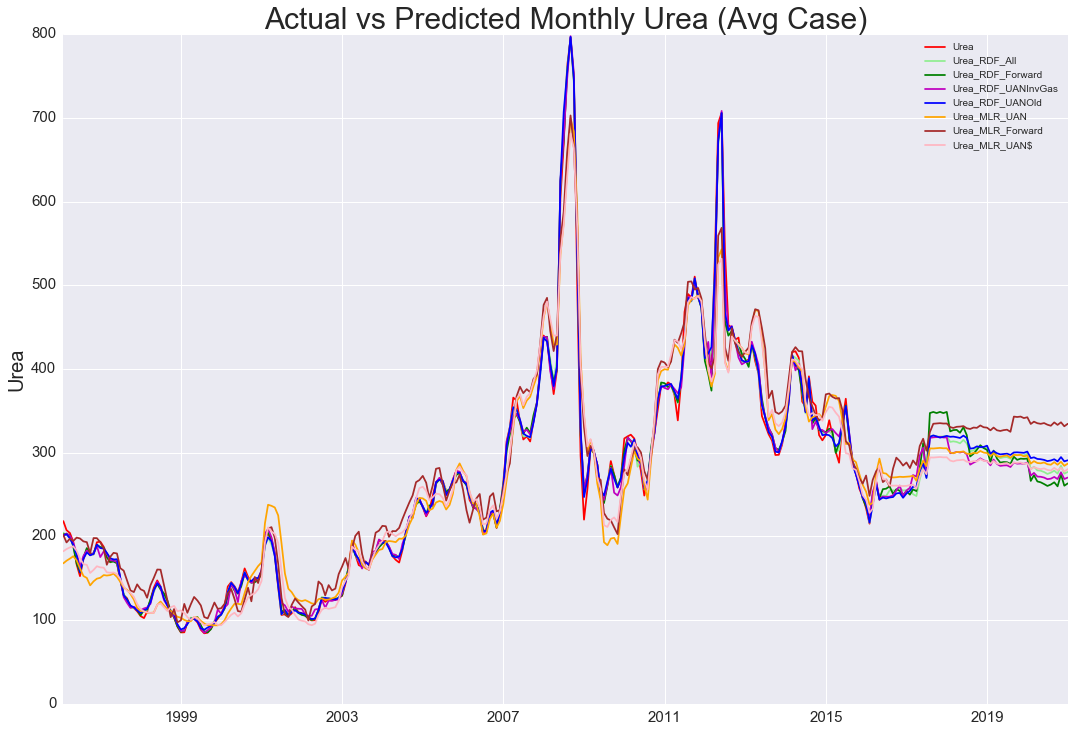

In [59]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['Urea'])
y2 = (df['Urea_RDF_All'])
y3 = (df['Urea_RDF_Forward'])
y4 = (df['Urea_RDF_UANInvGas'])
y5 = (df['Urea_RDF_UANOld'])
y6 =(df['Urea_MLR_UAN'])
y7 = (df['Urea_MLR_Forward'])
y8 = (df['Urea_MLR_UAN$'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'b')
ax.plot(x,y6,'orange')
ax.plot(x,y7,'brown')
ax.plot(x,y8,'lightpink')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Best Case
#### 		      crude	     corn	      gas	   coal
#### Q2-16	  63.00 	 395.00 	 2.75 	 55.00 
#### Q3-16	  70.00 	 390.00 	 3.00 	 57.00 
#### Q4-16	  72.00 	 410.00 	 3.00 	 57.00 
#### Q1-17	  72.00 	 395.00 	 3.40 	 62.00 
#### Q2-17	  80.00 	 390.00 	 3.30 	 62.00 
#### ALL-17	  82.00 	 410.00 	 3.53 	 75.00 
#### ALL-18	  90.00 	 475.00 	 6.00 	 77.00 
#### ALL-19	  110.00 	 400.00 	 6.00 	 85.00 
#### ALL-20	  150.00 	 550.00 	 6.00 	 67.00 


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilbestrandomness.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
1057   4/8/2016   94.24  40.99  365.00    49.85  2.08          537505   
1058  4/15/2016   94.70  41.71  382.00    50.85  2.00          537505   
1059  4/22/2016   95.12  44.54  375.50    51.00  2.27          537505   
1060  4/29/2016   93.08  46.69  391.75    50.75  2.32          537505   
1061  4/30/2016   93.08  46.69  391.75    50.75  2.32          537505   

        Urea_Prod  UAN_Inventory     UAN  Urea  
1057  316641.6667    998987.8733  209.92   248  
1058  316641.6667    998987.8733  205.12   255  
1059  316641.6667    998987.8733  205.12   238  
1060  316641.6667    998987.8733  212.16   232  
1061  316641.6667    998987.8733  212.16   232

In [64]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory             int64
Urea_Prod                float64
UAN_Inventory            float64
UAN                      float64
Urea                     float64
dtype: object

In [65]:
df_96on.describe()

Dollar        Crude         Corn      My_Coal          Gas  \
count  1062.000000  1062.000000  1062.000000  1062.000000  1062.000000   
mean     90.673315    54.785461   361.748588    58.269360     4.598559   
std      11.704577    31.243572   156.648138    33.567719     2.364318   
min      71.660000    11.260000   182.500000    20.900000     1.660000   
25%      81.180000    26.417500   231.062500    27.430000     2.760000   
50%      87.900000    49.170000   325.500000    51.840000     4.025000   
75%      98.707500    81.967500   424.437500    79.675000     5.825000   
max     119.900000   145.860000   809.250000   192.500000    14.430000   

       Urea_Inventory      Urea_Prod   UAN_Inventory          UAN         Urea  
count     1062.000000    1062.000000     1062.000000  1062.000000  1062.000000  
mean    379668.265537  321111.410575  1005441.983512   183.703955   260.028249  
std     151925.711944   97500.498985   490773.222051    96.550610   135.620177  
min     115939.000000  129670.329700   297701.149400    58.000000    83.000000  
25%     255962.750000  246470.588200   650601.513700   101.200000   151.250000  
50%     368370.000000  287209.302300   850475.860200   165.200000   240.000000  
75%     479692.000000  418566.750000  1245263.158000   257.680000   335.000000  
max     843000.000000  549000.000000  2588392.857000   514.880000   825.000000

### 3 MLR models I will use (in above case)

### 4 RDF models will be used (parameters found above in exploratory analysis)

In [66]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#uan dominates, then crude and coal

MSE train: 50.954, test: 407.964
R^2 train: 0.997, test: 0.976
[ 0.00902073  0.05438477  0.01568553  0.00598351  0.05346593  0.00758251
  0.00727995  0.84184953  0.00474754]


In [67]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_RDF_All'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_RDF_All'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_All_Error'] = rdf_error3

mlruan_predicted = 13.9179 + (df_96on['UAN']*1.3397) 
df_96on['Urea_MLR_UAN'] = mlruan_predicted
mlruan_error = (abs(df_96on['Urea_MLR_UAN'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_UAN'] = mlruan_error

mlruandollar_predicted = 161.4817 + (df_96on['UAN']*1.2219) - (df_96on['Dollar']*1.3888) 
df_96on['Urea_MLR_UAN$'] = mlruandollar_predicted
mlruandollar_error = (abs(df_96on['Urea_MLR_UAN$'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_UAN$'] = mlruandollar_error

mlrforward_predicted = 110.4163 + (df_96on['Urea_Prod']*0.0002) - (df_96on['Urea_Inventory']*0.00009329) + (df_96on['UAN']*1.2893) - (df_96on['Dollar']*1.1659)  
df_96on['Urea_MLR_Forward'] = mlrforward_predicted
mlrforward_error = (abs(df_96on['Urea_MLR_Forward'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Forward'] = mlrforward_error

print("Average RDF All error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR UAN error is: %.3f" % (mlruan_error.mean()))
print("Average MLR UAN and $ error is: %.3f" % (mlruandollar_error.mean()))
print("Average MLR (Forward) UAN,$,urea_inv,urea_prod error is: %.3f" % (mlrforward_error.mean()))

df_96on

Average RDF All error is: 2.421
Average MLR UAN error is: 10.972
Average MLR UAN and $ error is: 9.936
Average MLR (Forward) UAN,$,urea_inv,urea_prod error is: 11.444


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42          589899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22          589899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96          589899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95          589899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08          609091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24          609091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17          609091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26          609091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06          681818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05          681818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22          681818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42          681818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26          681818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29          689899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39          689899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37          689899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21          689899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14          615152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27          615152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33          615152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38          615152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44          615152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47          466667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57          466667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70          466667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81          466667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79          438384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77          438384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33          438384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17          438384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65          252000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49          252000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49          252000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53          299000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53          299000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29          299000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27          299000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25          251000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05          251000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87          251000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08          251000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36          271664   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47          271664   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13          271664   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14          271664   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33          271664   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14          115939   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03          115939   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87          115939   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87          115939   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79          376763   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92          376763   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99          376763

In [68]:
#uan, $, urea_inv, urea_prod
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 79.911, test: 447.422
R^2 train: 0.996, test: 0.974
[ 0.94662951  0.02241399  0.01390637  0.01705013]


In [69]:
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_RDF_Forward'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_RDF_Forward'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_Forward'] = rdf_error4

print("Average RDF forward error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF forward error is: 2.646


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42          589899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22          589899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96          589899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95          589899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08          609091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24          609091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17          609091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26          609091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06          681818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05          681818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22          681818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42          681818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26          681818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29          689899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39          689899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37          689899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21          689899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14          615152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27          615152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33          615152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38          615152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44          615152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47          466667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57          466667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70          466667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81          466667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79          438384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77          438384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33          438384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17          438384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65          252000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49          252000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49          252000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53          299000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53          299000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29          299000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27          299000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25          251000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05          251000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87          251000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08          251000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36          271664   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47          271664   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13          271664   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14          271664   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33          271664   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14          115939   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03          115939   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87          115939   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87          115939   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79          376763   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92          376763   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99          376763

In [70]:
#uan, urea_inventory, gas
X = df_96on[['UAN','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 86.235, test: 446.362
R^2 train: 0.995, test: 0.974
[ 0.95363093  0.02134773  0.02502134]


In [71]:
urea_predicted6 = forest.predict(X)
urea_predicted6 = pd.DataFrame(urea_predicted6)
df_96on['Urea_RDF_UANInvGas'] = urea_predicted6
rdf_error6 = (abs(df_96on['Urea_RDF_UANInvGas'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_UANInvGas'] = rdf_error6

print("Average RDF uan, urea_inv, gas error is: %.3f" % (rdf_error6.mean()))
df_96on

Average RDF uan, urea_inv, gas error is: 3.171


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42          589899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22          589899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96          589899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95          589899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08          609091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24          609091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17          609091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26          609091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06          681818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05          681818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22          681818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42          681818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26          681818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29          689899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39          689899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37          689899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21          689899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14          615152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27          615152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33          615152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38          615152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44          615152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47          466667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57          466667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70          466667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81          466667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79          438384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77          438384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33          438384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17          438384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65          252000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49          252000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49          252000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53          299000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53          299000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29          299000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27          299000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25          251000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05          251000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87          251000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08          251000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36          271664   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47          271664   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13          271664   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14          271664   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33          271664   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14          115939   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03          115939   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87          115939   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87          115939   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79          376763   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92          376763   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99          376763

In [72]:
#same as last model we used but add uan this time
X = df_96on[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 55.522, test: 419.256
R^2 train: 0.997, test: 0.976
[ 0.84331528  0.05911     0.05766684  0.02028676  0.00956026  0.01006085]


In [73]:
#last added model
urea_predicted7 = forest.predict(X)
urea_predicted7 = pd.DataFrame(urea_predicted7)
df_96on['Urea_RDF_UANOld'] = urea_predicted7
rdf_error7 = (abs(df_96on['Urea_RDF_UANOld'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_UANOld'] = rdf_error7

print("Average RDF uan, urea_inv, gas, crude, coal, corn error is: %.3f" % (rdf_error7.mean()))
df_96on

Average RDF uan, urea_inv, gas, crude, coal, corn error is: 2.565


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42          589899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22          589899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96          589899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95          589899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08          609091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24          609091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17          609091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26          609091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06          681818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05          681818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22          681818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42          681818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26          681818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29          689899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39          689899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37          689899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21          689899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14          615152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27          615152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33          615152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38          615152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44          615152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47          466667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57          466667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70          466667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81          466667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79          438384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77          438384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33          438384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17          438384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65          252000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49          252000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49          252000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53          299000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53          299000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29          299000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27          299000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25          251000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05          251000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87          251000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08          251000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36          271664   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47          271664   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13          271664   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14          271664   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33          271664   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14          115939   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03          115939   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87          115939   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87          115939   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79          376763   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92          376763   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99          376763

#### Predictions

In [79]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN']][1062:2768]
newpred = data [['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']][1062:1488]
newpred3 = data[['UAN','Dollar','Urea_Inventory','Urea_Prod']][1062:1488]
newpred4 = data[['UAN','Gas','Urea_Inventory']][1062:2768]
newpred5 = data[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']][1062:2768]

In [80]:
#new predictions
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 53.182, test: 412.339
R^2 train: 0.997, test: 0.976
[ 0.00803716  0.05126937  0.01360202  0.00594565  0.06033527  0.00780406
  0.00729904  0.84073681  0.00497061]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         431682    312000   
1    2016-05-02  93.03  60.54  394.98   52.46   2.4         431682    312000   
2    2016-05-03  92.99  57.92  391.81   50.93  2.38         431682    312000   
3    2016-05-04  93.04  62.15  392.96    52.9  2.56         431682    312000   
4    2016-05-05  92.94  53.32  394.69   52.83  2.44         431682    312000   
5    2016-05-06  93.05  53.32  391.86   53.94  2.42         431682    312000   
6    2016-05-07  93.07  61.95   392.7   52.78  2.34         431682    312000   
7    2016-05-08  92.97  56.28  393.09   54.43  2.42         431682    312000   
8    2016-05-09  92.91  61.81  392.51   53.91  2.49         431682    312000   
9    2016-05-10  93.08  56.36  393.41   53.28  2.69         431682    312000   
10   2016-05-11  93.04  58.47  393.13   52.58  2.36         431682    312000   
11   2016-05-12  93.04  62.62  393.95      51  2.52         431682    312000   
12   2016-05-13  92.92  59.02  393.42   53.21  2.57         431682    312000   
13   2016-05-14  93.07  54.71  394.27   53.44  2.48         431682    312000   
14   2016-05-15  92.95  59.45  394.31   54.51  2.65         431682    312000   
15   2016-05-16  93.08  49.76  394.01   51.51  2.56         431682    312000   
16   2016-05-17  92.92   54.4  392.01      52  2.62         431682    312000   
17   2016-05-18  92.97   62.4  392.53   51.97  2.71         431682    312000   
18   2016-05-19  92.96  59.86  394.46   52.22  2.67         431682    312000   
19   2016-05-20  93.05  55.61  393.32   52.62  2.67         431682    312000   
20   2016-05-21  92.98  56.94  392.66   50.98   2.5         431682    312000   
21   2016-05-22     93  58.34  391.85   54.14   2.7         431682    312000   
22   2016-05-23  92.95  49.49  392.11   54.11  2.39         431682    312000   
23   2016-05-24  92.95  48.87  394.78   51.78  2.45         431682    312000   
24   2016-05-25  92.94  53.61  392.88   51.02   2.4         431682    312000   
25   2016-05-26  92.97   54.4  394.44   54.33  2.48         431682    312000   
26   2016-05-27  92.97  50.16  392.95   52.85  2.53         431682    312000   
27   2016-05-28  93.07  51.31  391.95   52.77  2.65         431682    312000   
28   2016-05-29  92.92  60.94  393.63   53.87  2.33         431682    312000   
29   2016-05-30  93.08  62.04  393.36   51.92  2.36         431682    312000   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  86.92     81  486.29   81.34     6         348800       NaN   
1677 2020-12-03   87.5     81  433.33   69.15     6         348800       NaN   
1678 2020-12-04  87.11     81  440.03   84.64     6         348800       NaN   
1679 2020-12-05  87.31     81  428.23   69.92     6         348800       NaN   
1680 2020-12-06     87     81  420.08   69.39     6         348800       NaN   
1681 2020-12-07  87.03     81  522.48   77.06     6         348800       NaN   
1682 2020-12-08  87.19     81  444.81   76.69     6         348800       NaN   
1683 2020-12-09  86.92     81  438.59   73.43     6         348800       NaN   
1684 2020-12-10  87.02     81  444.33   84.39     6         348800       NaN   
1685 2020-12-11  86.96     81  544.22   79.51     6         348800       NaN   
1686 2020-12-12  87.15     81  469.14   72.78     6         348800       NaN   
1687 2020-12-13  87.02     81  527.94   69.79     6         348800       NaN   
1688 2020-12-14  87.27     81  479.66   76.24     6         348800       NaN   
1689 2020-12-15  87.43     81  458.35   74.68     6         348800       NaN   
1690 2020-12-16  87.48     81   508.1   81.67     6         348800       NaN   
1691 2020-12-17  87.38     81  452.69   84.71     6         348800       NaN   
1692 2020-12-18  87.27     81  524.25   69.01     6         348800       NaN   
1693 2020-12-19  87.14     81  426.33   79.75     6         348800       NaN   
1694 2020-1

In [81]:
#other predictions
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_RDF_Forward'] = df_new_pred2

mlruan_predicted2 = 13.9179 + (newpred2['UAN']*1.3397) 
newpred2['Urea_MLR_UAN'] = mlruan_predicted2

mlruandollar_predicted2 = 161.4817 + (newpred2['UAN']*1.2219) - (newpred2['Dollar']*1.3888) 
newpred2['Urea_MLR_UAN$'] = mlruandollar_predicted2

mlrforward_predicted2 = 110.4163 + (newpred2['Urea_Prod']*0.0002) - (newpred2['Urea_Inventory']*0.00009329) + (newpred2['UAN']*1.2893) - (newpred2['Dollar']*1.1659)  
newpred2['Urea_MLR_Forward'] = mlrforward_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 78.159, test: 467.411
R^2 train: 0.996, test: 0.973
[ 0.94666774  0.02218583  0.01365897  0.01748746]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         431682    312000   
1    2016-05-02  93.03  60.54  394.98   52.46   2.4         431682    312000   
2    2016-05-03  92.99  57.92  391.81   50.93  2.38         431682    312000   
3    2016-05-04  93.04  62.15  392.96    52.9  2.56         431682    312000   
4    2016-05-05  92.94  53.32  394.69   52.83  2.44         431682    312000   
5    2016-05-06  93.05  53.32  391.86   53.94  2.42         431682    312000   
6    2016-05-07  93.07  61.95   392.7   52.78  2.34         431682    312000   
7    2016-05-08  92.97  56.28  393.09   54.43  2.42         431682    312000   
8    2016-05-09  92.91  61.81  392.51   53.91  2.49         431682    312000   
9    2016-05-10  93.08  56.36  393.41   53.28  2.69         431682    312000   
10   2016-05-11  93.04  58.47  393.13   52.58  2.36         431682    312000   
11   2016-05-12  93.04  62.62  393.95      51  2.52         431682    312000   
12   2016-05-13  92.92  59.02  393.42   53.21  2.57         431682    312000   
13   2016-05-14  93.07  54.71  394.27   53.44  2.48         431682    312000   
14   2016-05-15  92.95  59.45  394.31   54.51  2.65         431682    312000   
15   2016-05-16  93.08  49.76  394.01   51.51  2.56         431682    312000   
16   2016-05-17  92.92   54.4  392.01      52  2.62         431682    312000   
17   2016-05-18  92.97   62.4  392.53   51.97  2.71         431682    312000   
18   2016-05-19  92.96  59.86  394.46   52.22  2.67         431682    312000   
19   2016-05-20  93.05  55.61  393.32   52.62  2.67         431682    312000   
20   2016-05-21  92.98  56.94  392.66   50.98   2.5         431682    312000   
21   2016-05-22     93  58.34  391.85   54.14   2.7         431682    312000   
22   2016-05-23  92.95  49.49  392.11   54.11  2.39         431682    312000   
23   2016-05-24  92.95  48.87  394.78   51.78  2.45         431682    312000   
24   2016-05-25  92.94  53.61  392.88   51.02   2.4         431682    312000   
25   2016-05-26  92.97   54.4  394.44   54.33  2.48         431682    312000   
26   2016-05-27  92.97  50.16  392.95   52.85  2.53         431682    312000   
27   2016-05-28  93.07  51.31  391.95   52.77  2.65         431682    312000   
28   2016-05-29  92.92  60.94  393.63   53.87  2.33         431682    312000   
29   2016-05-30  93.08  62.04  393.36   51.92  2.36         431682    312000   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  86.92     81  486.29   81.34     6         348800       NaN   
1677 2020-12-03   87.5     81  433.33   69.15     6         348800       NaN   
1678 2020-12-04  87.11     81  440.03   84.64     6         348800       NaN   
1679 2020-12-05  87.31     81  428.23   69.92     6         348800       NaN   
1680 2020-12-06     87     81  420.08   69.39     6         348800       NaN   
1681 2020-12-07  87.03     81  522.48   77.06     6         348800       NaN   
1682 2020-12-08  87.19     81  444.81   76.69     6         348800       NaN   
1683 2020-12-09  86.92     81  438.59   73.43     6         348800       NaN   
1684 2020-12-10  87.02     81  444.33   84.39     6         348800       NaN   
1685 2020-12-11  86.96     81  544.22   79.51     6         348800       NaN   
1686 2020-12-12  87.15     81  469.14   72.78     6         348800       NaN   
1687 2020-12-13  87.02     81  527.94   69.79     6         348800       NaN   
1688 2020-12-14  87.27     81  479.66   76.24     6         348800       NaN   
1689 2020-12-15  87.43     81  458.35   74.68     6         348800       NaN   
1690 2020-12-16  87.48     81   508.1   81.67     6         348800       NaN   
1691 2020-12-17  87.38     81  452.69   84.71     6         348800       NaN   
1692 2020-12-18  87.27     81  524.25   69.01     6         348800       NaN   
1693 2020-12-19  87.14     81  426.33   79.75     6         348800       NaN   
1694 2020-1

In [82]:
X = df_96on[['UAN','Gas','Urea_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['Urea_RDF_UANInvGas'] = df_new_pred3
newpred2

MSE train: 90.286, test: 457.046
R^2 train: 0.995, test: 0.974
[ 0.95442639  0.02101663  0.02455698]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         431682    312000   
1    2016-05-02  93.03  60.54  394.98   52.46   2.4         431682    312000   
2    2016-05-03  92.99  57.92  391.81   50.93  2.38         431682    312000   
3    2016-05-04  93.04  62.15  392.96    52.9  2.56         431682    312000   
4    2016-05-05  92.94  53.32  394.69   52.83  2.44         431682    312000   
5    2016-05-06  93.05  53.32  391.86   53.94  2.42         431682    312000   
6    2016-05-07  93.07  61.95   392.7   52.78  2.34         431682    312000   
7    2016-05-08  92.97  56.28  393.09   54.43  2.42         431682    312000   
8    2016-05-09  92.91  61.81  392.51   53.91  2.49         431682    312000   
9    2016-05-10  93.08  56.36  393.41   53.28  2.69         431682    312000   
10   2016-05-11  93.04  58.47  393.13   52.58  2.36         431682    312000   
11   2016-05-12  93.04  62.62  393.95      51  2.52         431682    312000   
12   2016-05-13  92.92  59.02  393.42   53.21  2.57         431682    312000   
13   2016-05-14  93.07  54.71  394.27   53.44  2.48         431682    312000   
14   2016-05-15  92.95  59.45  394.31   54.51  2.65         431682    312000   
15   2016-05-16  93.08  49.76  394.01   51.51  2.56         431682    312000   
16   2016-05-17  92.92   54.4  392.01      52  2.62         431682    312000   
17   2016-05-18  92.97   62.4  392.53   51.97  2.71         431682    312000   
18   2016-05-19  92.96  59.86  394.46   52.22  2.67         431682    312000   
19   2016-05-20  93.05  55.61  393.32   52.62  2.67         431682    312000   
20   2016-05-21  92.98  56.94  392.66   50.98   2.5         431682    312000   
21   2016-05-22     93  58.34  391.85   54.14   2.7         431682    312000   
22   2016-05-23  92.95  49.49  392.11   54.11  2.39         431682    312000   
23   2016-05-24  92.95  48.87  394.78   51.78  2.45         431682    312000   
24   2016-05-25  92.94  53.61  392.88   51.02   2.4         431682    312000   
25   2016-05-26  92.97   54.4  394.44   54.33  2.48         431682    312000   
26   2016-05-27  92.97  50.16  392.95   52.85  2.53         431682    312000   
27   2016-05-28  93.07  51.31  391.95   52.77  2.65         431682    312000   
28   2016-05-29  92.92  60.94  393.63   53.87  2.33         431682    312000   
29   2016-05-30  93.08  62.04  393.36   51.92  2.36         431682    312000   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  86.92     81  486.29   81.34     6         348800       NaN   
1677 2020-12-03   87.5     81  433.33   69.15     6         348800       NaN   
1678 2020-12-04  87.11     81  440.03   84.64     6         348800       NaN   
1679 2020-12-05  87.31     81  428.23   69.92     6         348800       NaN   
1680 2020-12-06     87     81  420.08   69.39     6         348800       NaN   
1681 2020-12-07  87.03     81  522.48   77.06     6         348800       NaN   
1682 2020-12-08  87.19     81  444.81   76.69     6         348800       NaN   
1683 2020-12-09  86.92     81  438.59   73.43     6         348800       NaN   
1684 2020-12-10  87.02     81  444.33   84.39     6         348800       NaN   
1685 2020-12-11  86.96     81  544.22   79.51     6         348800       NaN   
1686 2020-12-12  87.15     81  469.14   72.78     6         348800       NaN   
1687 2020-12-13  87.02     81  527.94   69.79     6         348800       NaN   
1688 2020-12-14  87.27     81  479.66   76.24     6         348800       NaN   
1689 2020-12-15  87.43     81  458.35   74.68     6         348800       NaN   
1690 2020-12-16  87.48     81   508.1   81.67     6         348800       NaN   
1691 2020-12-17  87.38     81  452.69   84.71     6         348800       NaN   
1692 2020-12-18  87.27     81  524.25   69.01     6         348800       NaN   
1693 2020-12-19  87.14     81  426.33   79.75     6         348800       NaN   
1694 2020-1

In [83]:
#last added prediction
X = df_96on[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predictedold = forest.predict(newpred5)
df_new_predold = pd.DataFrame(newpred_predictedold)
newpred2['Urea_RDF_UANOld'] = df_new_predold
newpred2

MSE train: 54.818, test: 424.726
R^2 train: 0.997, test: 0.975
[ 0.84401068  0.05948119  0.056616    0.02077953  0.0097047   0.0094079 ]


Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01  93.08  46.69  391.75   50.75  2.32         431682    312000   
1    2016-05-02  93.03  60.54  394.98   52.46   2.4         431682    312000   
2    2016-05-03  92.99  57.92  391.81   50.93  2.38         431682    312000   
3    2016-05-04  93.04  62.15  392.96    52.9  2.56         431682    312000   
4    2016-05-05  92.94  53.32  394.69   52.83  2.44         431682    312000   
5    2016-05-06  93.05  53.32  391.86   53.94  2.42         431682    312000   
6    2016-05-07  93.07  61.95   392.7   52.78  2.34         431682    312000   
7    2016-05-08  92.97  56.28  393.09   54.43  2.42         431682    312000   
8    2016-05-09  92.91  61.81  392.51   53.91  2.49         431682    312000   
9    2016-05-10  93.08  56.36  393.41   53.28  2.69         431682    312000   
10   2016-05-11  93.04  58.47  393.13   52.58  2.36         431682    312000   
11   2016-05-12  93.04  62.62  393.95      51  2.52         431682    312000   
12   2016-05-13  92.92  59.02  393.42   53.21  2.57         431682    312000   
13   2016-05-14  93.07  54.71  394.27   53.44  2.48         431682    312000   
14   2016-05-15  92.95  59.45  394.31   54.51  2.65         431682    312000   
15   2016-05-16  93.08  49.76  394.01   51.51  2.56         431682    312000   
16   2016-05-17  92.92   54.4  392.01      52  2.62         431682    312000   
17   2016-05-18  92.97   62.4  392.53   51.97  2.71         431682    312000   
18   2016-05-19  92.96  59.86  394.46   52.22  2.67         431682    312000   
19   2016-05-20  93.05  55.61  393.32   52.62  2.67         431682    312000   
20   2016-05-21  92.98  56.94  392.66   50.98   2.5         431682    312000   
21   2016-05-22     93  58.34  391.85   54.14   2.7         431682    312000   
22   2016-05-23  92.95  49.49  392.11   54.11  2.39         431682    312000   
23   2016-05-24  92.95  48.87  394.78   51.78  2.45         431682    312000   
24   2016-05-25  92.94  53.61  392.88   51.02   2.4         431682    312000   
25   2016-05-26  92.97   54.4  394.44   54.33  2.48         431682    312000   
26   2016-05-27  92.97  50.16  392.95   52.85  2.53         431682    312000   
27   2016-05-28  93.07  51.31  391.95   52.77  2.65         431682    312000   
28   2016-05-29  92.92  60.94  393.63   53.87  2.33         431682    312000   
29   2016-05-30  93.08  62.04  393.36   51.92  2.36         431682    312000   
...         ...    ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  86.92     81  486.29   81.34     6         348800       NaN   
1677 2020-12-03   87.5     81  433.33   69.15     6         348800       NaN   
1678 2020-12-04  87.11     81  440.03   84.64     6         348800       NaN   
1679 2020-12-05  87.31     81  428.23   69.92     6         348800       NaN   
1680 2020-12-06     87     81  420.08   69.39     6         348800       NaN   
1681 2020-12-07  87.03     81  522.48   77.06     6         348800       NaN   
1682 2020-12-08  87.19     81  444.81   76.69     6         348800       NaN   
1683 2020-12-09  86.92     81  438.59   73.43     6         348800       NaN   
1684 2020-12-10  87.02     81  444.33   84.39     6         348800       NaN   
1685 2020-12-11  86.96     81  544.22   79.51     6         348800       NaN   
1686 2020-12-12  87.15     81  469.14   72.78     6         348800       NaN   
1687 2020-12-13  87.02     81  527.94   69.79     6         348800       NaN   
1688 2020-12-14  87.27     81  479.66   76.24     6         348800       NaN   
1689 2020-12-15  87.43     81  458.35   74.68     6         348800       NaN   
1690 2020-12-16  87.48     81   508.1   81.67     6         348800       NaN   
1691 2020-12-17  87.38     81  452.69   84.71     6         348800       NaN   
1692 2020-12-18  87.27     81  524.25   69.01     6         348800       NaN   
1693 2020-12-19  87.14     81  426.33   79.75     6         348800       NaN   
1694 2020-1

In [84]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

Corn  Crude       Date Dollar   Gas  MLR_Error_Forward  MLR_Error_UAN  \
0     369.75  19.65 1996-01-05  85.06  2.42           8.282170      24.252864   
1     366.25  17.98 1996-01-12  85.06  2.22           7.719566      23.668267   
2        365  18.25 1996-01-19  86.75  1.96           7.776796      22.967976   
3     360.25  17.36 1996-01-26  87.64  1.95           6.588798      21.494316   
4      370.5  17.38 1996-02-02  87.01  2.08           6.369722      16.619151   
5     367.25  17.38 1996-02-09  86.87  2.24           6.290099      16.619151   
6     382.75   18.4 1996-02-16  85.91  2.17           7.988305      18.604410   
7      383.5  18.45 1996-02-23  85.43  2.26           7.721813      18.604410   
8     386.75  18.62 1996-03-01  86.49  2.06           7.212121      18.604410   
9      388.5  18.87 1996-03-08  86.81  2.05           5.130996      16.619151   
10    383.25  20.08 1996-03-15  86.28  2.22           4.829569      16.619151   
11    376.25   20.3 1996-03-22  86.47  2.42           0.533252      11.319350   
12       394  20.15 1996-03-29  86.52  2.26           0.504104      11.319350   
13    416.25   20.9 1996-04-05  86.61  2.29           1.743481      11.319350   
14       438  21.91 1996-04-12  87.53  2.39           0.225851       9.045487   
15    438.25  21.04 1996-04-19  87.48  2.37           2.894055       6.651947   
16       482  20.84 1996-04-26   87.9  2.21           0.464877       8.908284   
17       453  20.12 1996-05-03  87.85  2.14           7.817727       6.949323   
18    482.25  20.14 1996-05-10  87.92  2.27          11.366310       3.847633   
19     504.5  19.44 1996-05-17  88.24  2.33          23.510044       6.835963   
20       413  20.32 1996-05-24  88.83  2.38          25.982342       8.894981   
21       400   19.1 1996-05-31  87.78  2.44          32.768125      14.045419   
22       393  19.43 1996-06-07  88.42  2.47          37.801519      14.045419   
23     385.5   19.5 1996-06-14  88.14  2.57          31.675619       8.223803   
24    386.75  19.32 1996-06-21   88.3   2.7          25.014037       1.980400   
25    397.75   20.1 1996-06-28  87.82  2.81          24.044199       0.597484   
26     402.5  20.38 1996-07-05  88.12  2.79          17.642752       6.798436   
27     428.5   21.2 1996-07-12  88.07  2.77          14.216963       9.539659   
28    367.75  20.78 1996-07-19  86.48  2.33          14.093963      10.800553   
29    316.75  19.69 1996-07-26  86.46  2.17           4.855706      18.032941   
...      ...    ...        ...    ...   ...                ...            ...   
1676  486.29     81 2020-12-02  86.92     6                NaN            NaN   
1677  433.33     81 2020-12-03   87.5     6                NaN            NaN   
1678  440.03     81 2020-12-04  87.11     6                NaN            NaN   
1679  428.23     81 2020-12-05  87.31     6                NaN            NaN   
1680  420.08     81 2020-12-06     87     6                NaN            NaN   
1681  522.48     81 2020-12-07  87.03     6                NaN            NaN   
1682  444.81     81 2020-12-08  87.19     6                NaN            NaN   
1683  438.59     81 2020-12-09  86.92     6                NaN            NaN   
1684  444.33     81 2020-12-10  87.02     6                NaN            NaN   
1685  544.22     81 2020-12-11  86.96     6                NaN            NaN   
1686  469.14     81 2020-12-12  87.15     6                NaN            NaN   
1687  527.94     81 2020-12-13  87.02     6                NaN            NaN   
1688  479.66     81 2020-12-14  87.27     6                NaN            NaN   
1689  458.35     81 2020-12-15  87.43     6                NaN            NaN   
1690   508.1     81 2020-12-16  87.48     6                NaN            NaN   
1691  452.69     81 2020-12-17  87.38     6                NaN            NaN   
1692  524.25     81 2020-12-18  87.27     6                NaN            NaN   
1693  426.33     81 2020-12-19  87.14  

In [85]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
combined

Date Dollar  Crude    Corn My_Coal   Gas Urea_Inventory  \
0     1996-01-05 00:00:00  85.06  19.65  369.75   25.36  2.42         589899   
1     1996-01-12 00:00:00  85.06  17.98  366.25   25.27  2.22         589899   
2     1996-01-19 00:00:00  86.75  18.25     365   29.07  1.96         589899   
3     1996-01-26 00:00:00  87.64  17.36  360.25    29.2  1.95         589899   
4     1996-02-02 00:00:00  87.01  17.38   370.5   32.11  2.08         609091   
5     1996-02-09 00:00:00  86.87  17.38  367.25   28.67  2.24         609091   
6     1996-02-16 00:00:00  85.91   18.4  382.75   28.17  2.17         609091   
7     1996-02-23 00:00:00  85.43  18.45   383.5   28.83  2.26         609091   
8     1996-03-01 00:00:00  86.49  18.62  386.75   27.86  2.06         681818   
9     1996-03-08 00:00:00  86.81  18.87   388.5   26.51  2.05         681818   
10    1996-03-15 00:00:00  86.28  20.08  383.25   27.86  2.22         681818   
11    1996-03-22 00:00:00  86.47   20.3  376.25   28.82  2.42         681818   
12    1996-03-29 00:00:00  86.52  20.15     394   27.18  2.26         681818   
13    1996-04-05 00:00:00  86.61   20.9  416.25   29.39  2.29         689899   
14    1996-04-12 00:00:00  87.53  21.91     438    28.5  2.39         689899   
15    1996-04-19 00:00:00  87.48  21.04  438.25   27.18  2.37         689899   
16    1996-04-26 00:00:00   87.9  20.84     482   31.91  2.21         689899   
17    1996-05-03 00:00:00  87.85  20.12     453   29.39  2.14         615152   
18    1996-05-10 00:00:00  87.92  20.14  482.25   27.18  2.27         615152   
19    1996-05-17 00:00:00  88.24  19.44   504.5   28.88  2.33         615152   
20    1996-05-24 00:00:00  88.83  20.32     413   29.22  2.38         615152   
21    1996-05-31 00:00:00  87.78   19.1     400   26.48  2.44         615152   
22    1996-06-07 00:00:00  88.42  19.43     393   26.94  2.47         466667   
23    1996-06-14 00:00:00  88.14   19.5   385.5   26.69  2.57         466667   
24    1996-06-21 00:00:00   88.3  19.32  386.75   26.62   2.7         466667   
25    1996-06-28 00:00:00  87.82   20.1  397.75   26.58  2.81         466667   
26    1996-07-05 00:00:00  88.12  20.38   402.5   26.95  2.79         438384   
27    1996-07-12 00:00:00  88.07   21.2   428.5   26.94  2.77         438384   
28    1996-07-19 00:00:00  86.48  20.78  367.75   26.94  2.33         438384   
29    1996-07-26 00:00:00  86.46  19.69  316.75   26.93  2.17         438384   
...                   ...    ...    ...     ...     ...   ...            ...   
2738  2020-12-02 00:00:00  86.92     81  486.29   81.34     6         348800   
2739  2020-12-03 00:00:00   87.5     81  433.33   69.15     6         348800   
2740  2020-12-04 00:00:00  87.11     81  440.03   84.64     6         348800   
2741  2020-12-05 00:00:00  87.31     81  428.23   69.92     6         348800   
2742  2020-12-06 00:00:00     87     81  420.08   69.39     6         348800   
2743  2020-12-07 00:00:00  87.03     81  522.48   77.06     6         348800   
2744  2020-12-08 00:00:00  87.19     81  444.81   76.69     6         348800   
2745  2020-12-09 00:00:00  86.92     81  438.59   73.43     6         348800   
2746  2020-12-10 00:00:00  87.02     81  444.33   84.39     6         348800   
2747  2020-12-11 00:00:00  86.96     81  544.22   79.51     6         348800   
2748  2020-12-12 00:00:00  87.15     81  469.14   72.78     6         348800   
2749  2020-12-13 00:00:00  87.02     81  527.94   69.79     6         348800   
2750  2020-12-14 00:00:00  87.27     81  479.66   76.24     6         348800   
2751  2020-12-15 00:00:00  87.43     81  458.35   74.68     6         348800   
2752  2020-12-16 00:00:00  87.48     81   508.1   81.67     6         348800   
2753  2020-12-17 00:00:00  87.38     81  452.69   84.71     6         348800   
2754  2020-12-18 00:00:00  87.27     81  524.25   69.01     6         348800   
2755  2020-12-19 00:00:00  87.14     81  426.33   79.75     6         348800   
2756  2020-12-20 00:0

In [86]:
combined.to_csv("C:/Users/msteinme/Documents/ureaaprilbestresultsuan.csv")

In [87]:
#split into months
cols = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [88]:
mycolumns = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

Dollar  Crude        Corn    My_Coal  Gas  Urea_Inventory  Urea_Prod  \
295  87.210000     81  479.220000  75.547097    6          348800        NaN   
296  87.153333     81  486.098667  76.718000    6          348800        NaN   
297  87.200323     81  468.328710  75.120968    6          348800        NaN   
298  87.227667     81  474.106333  76.241333    6          348800        NaN   
299  87.217419     81  477.212258  75.784516    6          348800        NaN   

     UAN_Inventory         UAN  Urea  Urea_MLR_UAN  Urea_MLR_UAN$  \
295        1000000  273.903686   NaN    380.866669     375.047366   
296        1000000  283.724616   NaN    394.023768     387.126259   
297        1000000  272.088065   NaN    378.434280     372.842298   
298        1000000  274.451686   NaN    381.600823     375.692431   
299        1000000  273.538483   NaN    380.377406     374.590821   

     Urea_MLR_Forward  Urea_RDF_All  Urea_RDF_Forward  Urea_RDF_UANInvGas  \
295               NaN           NaN               NaN          364.633780   
296               NaN           NaN               NaN          374.286979   
297               NaN           NaN               NaN          361.397009   
298               NaN           NaN               NaN          363.827929   
299               NaN           NaN               NaN          357.376308   

     Urea_RDF_UANOld  
295       366.213657  
296       373.533738  
297       360.724225  
298       363.373175  
299       359.164689

In [89]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [90]:
print(df.dtypes)
df.tail()

Dollar                       float64
Crude                        float64
Corn                         float64
My_Coal                      float64
Gas                          float64
Urea_Inventory               float64
Urea_Prod                    float64
UAN_Inventory                float64
UAN                          float64
Urea                         float64
Urea_MLR_UAN                 float64
Urea_MLR_UAN$                float64
Urea_MLR_Forward             float64
Urea_RDF_All                 float64
Urea_RDF_Forward             float64
Urea_RDF_UANInvGas           float64
Urea_RDF_UANOld              float64
Monthly_Date          datetime64[ns]
dtype: object


Dollar  Crude        Corn    My_Coal  Gas  Urea_Inventory  Urea_Prod  \
295  87.210000     81  479.220000  75.547097    6          348800        NaN   
296  87.153333     81  486.098667  76.718000    6          348800        NaN   
297  87.200323     81  468.328710  75.120968    6          348800        NaN   
298  87.227667     81  474.106333  76.241333    6          348800        NaN   
299  87.217419     81  477.212258  75.784516    6          348800        NaN   

     UAN_Inventory         UAN  Urea  Urea_MLR_UAN  Urea_MLR_UAN$  \
295        1000000  273.903686   NaN    380.866669     375.047366   
296        1000000  283.724616   NaN    394.023768     387.126259   
297        1000000  272.088065   NaN    378.434280     372.842298   
298        1000000  274.451686   NaN    381.600823     375.692431   
299        1000000  273.538483   NaN    380.377406     374.590821   

     Urea_MLR_Forward  Urea_RDF_All  Urea_RDF_Forward  Urea_RDF_UANInvGas  \
295               NaN           NaN               NaN          364.633780   
296               NaN           NaN               NaN          374.286979   
297               NaN           NaN               NaN          361.397009   
298               NaN           NaN               NaN          363.827929   
299               NaN           NaN               NaN          357.376308   

     Urea_RDF_UANOld Monthly_Date  
295       366.213657   2020-08-31  
296       373.533738   2020-09-30  
297       360.724225   2020-10-31  
298       363.373175   2020-11-30  
299       359.164689   2020-12-31

In [91]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilbestresultsmonthlyuan.csv")

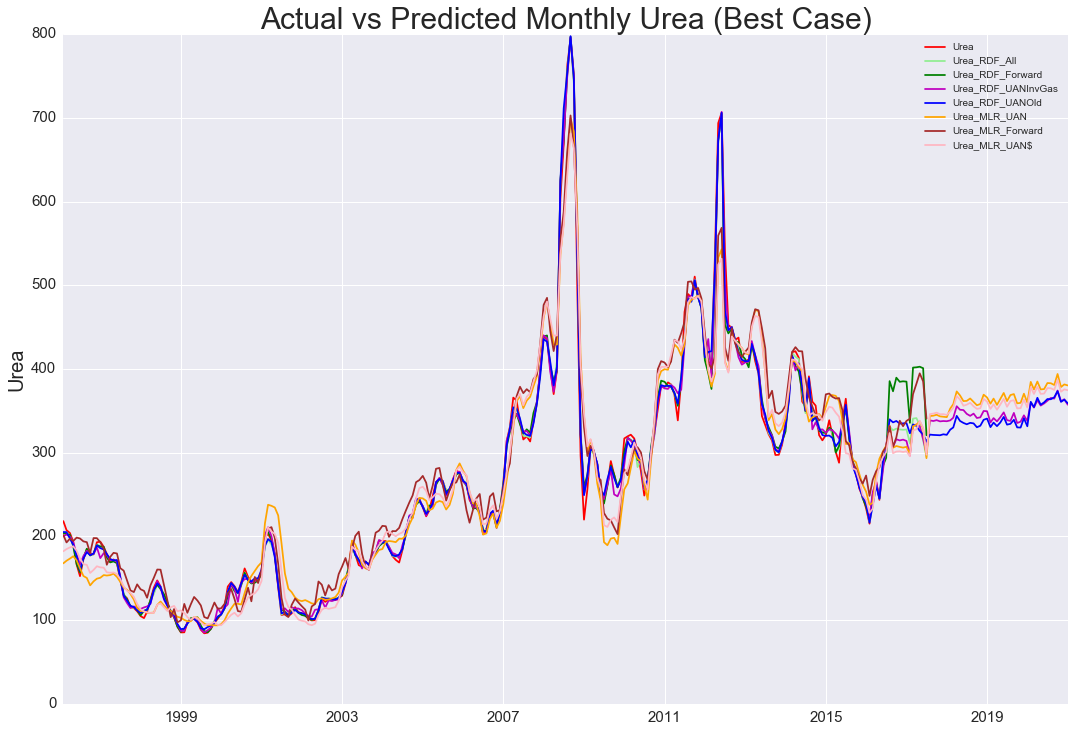

In [92]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['Urea'])
y2 = (df['Urea_RDF_All'])
y3 = (df['Urea_RDF_Forward'])
y4 = (df['Urea_RDF_UANInvGas'])
y5 = (df['Urea_RDF_UANOld'])
y6 =(df['Urea_MLR_UAN'])
y7 = (df['Urea_MLR_Forward'])
y8 = (df['Urea_MLR_UAN$'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'b')
ax.plot(x,y6,'orange')
ax.plot(x,y7,'brown')
ax.plot(x,y8,'lightpink')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Worst Case
#### 	          crude	       corn	      gas	   coal
#### Q2-16	  34.00 	 345.00 	 1.75 	 49.40 
#### Q3-16	  35.00 	 340.00 	 2.05 	 48.50 
#### Q4-16	  35.00 	 335.00 	 2.10 	 47.50 
#### Q1-17	  37.00 	 335.00 	 2.25 	 47.00 
#### Q2-17	  40.00 	 350.00 	 2.05 	 47.00 
#### ALL-17	  38.50 	 361.00 	 2.24 	 47.00 
#### ALL-18	  48.70 	 378.00 	 2.60 	 48.20 
#### ALL-19	  46.00 	 384.00 	 2.61 	 48.70 
#### ALL-20	  54.00 	 388.00 	 2.56 	 49.20 


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilworstrandomness.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
1057   4/8/2016   94.24  40.99  365.00    49.85  2.08     537504.7397   
1058  4/15/2016   94.70  41.71  382.00    50.85  2.00     537504.7397   
1059  4/22/2016   95.12  44.54  375.50    51.00  2.27     537504.7397   
1060  4/29/2016   93.08  46.69  391.75    50.75  2.32     537504.7397   
1061  4/30/2016   93.08  46.69  391.75    50.75  2.32     537504.7397   

        Urea_Prod  UAN_Inventory     UAN  Urea  
1057  316641.6667    998987.8733  209.92   248  
1058  316641.6667    998987.8733  205.12   255  
1059  316641.6667    998987.8733  205.12   238  
1060  316641.6667    998987.8733  212.16   232  
1061  316641.6667    998987.8733  212.16   232

In [94]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
Urea_Prod                float64
UAN_Inventory            float64
UAN                      float64
Urea                     float64
dtype: object

In [95]:
df_96on.describe()

Dollar        Crude         Corn      My_Coal          Gas  \
count  1062.000000  1062.000000  1062.000000  1062.000000  1062.000000   
mean     90.673315    54.785461   361.748588    58.269360     4.598559   
std      11.704577    31.243572   156.648138    33.567719     2.364318   
min      71.660000    11.260000   182.500000    20.900000     1.660000   
25%      81.180000    26.417500   231.062500    27.430000     2.760000   
50%      87.900000    49.170000   325.500000    51.840000     4.025000   
75%      98.707500    81.967500   424.437500    79.675000     5.825000   
max     119.900000   145.860000   809.250000   192.500000    14.430000   

       Urea_Inventory      Urea_Prod   UAN_Inventory          UAN         Urea  
count     1062.000000    1062.000000     1062.000000  1062.000000  1062.000000  
mean    379668.241622  321111.410575  1005441.983512   183.703955   260.028249  
std     151925.723394   97500.498985   490773.222051    96.550610   135.620177  
min     115938.863000  129670.329700   297701.149400    58.000000    83.000000  
25%     255962.678600  246470.588200   650601.513700   101.200000   151.250000  
50%     368370.238100  287209.302300   850475.860200   165.200000   240.000000  
75%     479692.000000  418566.750000  1245263.158000   257.680000   335.000000  
max     843000.000000  549000.000000  2588392.857000   514.880000   825.000000

### 3 MLR Models I will use same as in Avg case

### 4 RDF models will be used (parameters found above in exploratory analysis)

In [96]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#uan dominates, then crude and coal

MSE train: 51.016, test: 405.343
R^2 train: 0.997, test: 0.977
[ 0.00829153  0.0537494   0.01559005  0.00642313  0.05509869  0.00735069
  0.00720006  0.84117135  0.0051251 ]


In [97]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_RDF_All'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_RDF_All'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_All_Error'] = rdf_error3

mlruan_predicted = 13.9179 + (df_96on['UAN']*1.3397) 
df_96on['Urea_MLR_UAN'] = mlruan_predicted
mlruan_error = (abs(df_96on['Urea_MLR_UAN'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_UAN'] = mlruan_error

mlruandollar_predicted = 161.4817 + (df_96on['UAN']*1.2219) - (df_96on['Dollar']*1.3888) 
df_96on['Urea_MLR_UAN$'] = mlruandollar_predicted
mlruandollar_error = (abs(df_96on['Urea_MLR_UAN$'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_UAN$'] = mlruandollar_error

mlrforward_predicted = 110.4163 + (df_96on['Urea_Prod']*0.0002) - (df_96on['Urea_Inventory']*0.00009329) + (df_96on['UAN']*1.2893) - (df_96on['Dollar']*1.1659)  
df_96on['Urea_MLR_Forward'] = mlrforward_predicted
mlrforward_error = (abs(df_96on['Urea_MLR_Forward'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Forward'] = mlrforward_error

print("Average RDF All error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR UAN error is: %.3f" % (mlruan_error.mean()))
print("Average MLR UAN and $ error is: %.3f" % (mlruandollar_error.mean()))
print("Average MLR (Forward) UAN,$,urea_inv,urea_prod error is: %.3f" % (mlrforward_error.mean()))

df_96on

Average RDF All error is: 2.396
Average MLR UAN error is: 10.972
Average MLR UAN and $ error is: 9.936
Average MLR (Forward) UAN,$,urea_inv,urea_prod error is: 11.444


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42     589898.9899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22     589898.9899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96     589898.9899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95     589898.9899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08     609090.9091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24     609090.9091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17     609090.9091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26     609090.9091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06     681818.1818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05     681818.1818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22     681818.1818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42     681818.1818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26     681818.1818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29     689898.9899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39     689898.9899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37     689898.9899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21     689898.9899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14     615151.5152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27     615151.5152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33     615151.5152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38     615151.5152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44     615151.5152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47     466666.6667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57     466666.6667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70     466666.6667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81     466666.6667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79     438383.8384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77     438383.8384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33     438383.8384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17     438383.8384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65     252000.0000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49     252000.0000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49     252000.0000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53     299000.0000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53     299000.0000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29     299000.0000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27     299000.0000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25     251000.0000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05     251000.0000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87     251000.0000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08     251000.0000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36     271663.8356   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47     271663.8356   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13     271663.8356   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14     271663.8356   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33     271663.8356   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14     115938.8630   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03     115938.8630   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87     115938.8630   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87     115938.8630   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79     376762.8219   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92     376762.8219   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99     376762.8219

In [98]:
#uan, $, urea_inv, urea_prod
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 80.359, test: 444.138
R^2 train: 0.996, test: 0.974
[ 0.94539022  0.02454021  0.01377981  0.01628976]


In [99]:
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_RDF_Forward'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_RDF_Forward'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_Forward'] = rdf_error4

print("Average RDF forward error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF forward error is: 2.658


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42     589898.9899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22     589898.9899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96     589898.9899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95     589898.9899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08     609090.9091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24     609090.9091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17     609090.9091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26     609090.9091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06     681818.1818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05     681818.1818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22     681818.1818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42     681818.1818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26     681818.1818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29     689898.9899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39     689898.9899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37     689898.9899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21     689898.9899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14     615151.5152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27     615151.5152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33     615151.5152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38     615151.5152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44     615151.5152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47     466666.6667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57     466666.6667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70     466666.6667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81     466666.6667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79     438383.8384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77     438383.8384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33     438383.8384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17     438383.8384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65     252000.0000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49     252000.0000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49     252000.0000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53     299000.0000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53     299000.0000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29     299000.0000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27     299000.0000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25     251000.0000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05     251000.0000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87     251000.0000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08     251000.0000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36     271663.8356   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47     271663.8356   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13     271663.8356   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14     271663.8356   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33     271663.8356   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14     115938.8630   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03     115938.8630   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87     115938.8630   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87     115938.8630   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79     376762.8219   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92     376762.8219   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99     376762.8219

In [100]:
#uan, urea_inventory, gas
X = df_96on[['UAN','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 87.647, test: 444.130
R^2 train: 0.995, test: 0.974
[ 0.95276758  0.02180255  0.02542987]


In [101]:
urea_predicted6 = forest.predict(X)
urea_predicted6 = pd.DataFrame(urea_predicted6)
df_96on['Urea_RDF_UANInvGas'] = urea_predicted6
rdf_error6 = (abs(df_96on['Urea_RDF_UANInvGas'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_UANInvGas'] = rdf_error6

print("Average RDF uan, urea_inv, gas error is: %.3f" % (rdf_error6.mean()))
df_96on

Average RDF uan, urea_inv, gas error is: 3.206


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42     589898.9899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22     589898.9899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96     589898.9899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95     589898.9899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08     609090.9091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24     609090.9091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17     609090.9091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26     609090.9091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06     681818.1818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05     681818.1818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22     681818.1818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42     681818.1818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26     681818.1818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29     689898.9899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39     689898.9899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37     689898.9899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21     689898.9899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14     615151.5152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27     615151.5152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33     615151.5152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38     615151.5152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44     615151.5152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47     466666.6667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57     466666.6667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70     466666.6667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81     466666.6667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79     438383.8384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77     438383.8384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33     438383.8384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17     438383.8384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65     252000.0000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49     252000.0000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49     252000.0000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53     299000.0000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53     299000.0000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29     299000.0000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27     299000.0000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25     251000.0000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05     251000.0000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87     251000.0000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08     251000.0000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36     271663.8356   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47     271663.8356   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13     271663.8356   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14     271663.8356   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33     271663.8356   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14     115938.8630   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03     115938.8630   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87     115938.8630   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87     115938.8630   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79     376762.8219   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92     376762.8219   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99     376762.8219

In [102]:
#same as last model we used but add uan this time
X = df_96on[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 53.760, test: 411.643
R^2 train: 0.997, test: 0.976
[ 0.8451176   0.05285312  0.06249634  0.01975864  0.01000955  0.00976475]


In [103]:
#last added model
urea_predicted7 = forest.predict(X)
urea_predicted7 = pd.DataFrame(urea_predicted7)
df_96on['Urea_RDF_UANOld'] = urea_predicted7
rdf_error7 = (abs(df_96on['Urea_RDF_UANOld'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error_UANOld'] = rdf_error7

print("Average RDF uan, urea_inv, gas, crude, coal, corn error is: %.3f" % (rdf_error7.mean()))
df_96on

Average RDF uan, urea_inv, gas, crude, coal, corn error is: 2.525


Date  Dollar  Crude    Corn  My_Coal   Gas  Urea_Inventory  \
0    1996-01-05   85.06  19.65  369.75    25.36  2.42     589898.9899   
1    1996-01-12   85.06  17.98  366.25    25.27  2.22     589898.9899   
2    1996-01-19   86.75  18.25  365.00    29.07  1.96     589898.9899   
3    1996-01-26   87.64  17.36  360.25    29.20  1.95     589898.9899   
4    1996-02-02   87.01  17.38  370.50    32.11  2.08     609090.9091   
5    1996-02-09   86.87  17.38  367.25    28.67  2.24     609090.9091   
6    1996-02-16   85.91  18.40  382.75    28.17  2.17     609090.9091   
7    1996-02-23   85.43  18.45  383.50    28.83  2.26     609090.9091   
8    1996-03-01   86.49  18.62  386.75    27.86  2.06     681818.1818   
9    1996-03-08   86.81  18.87  388.50    26.51  2.05     681818.1818   
10   1996-03-15   86.28  20.08  383.25    27.86  2.22     681818.1818   
11   1996-03-22   86.47  20.30  376.25    28.82  2.42     681818.1818   
12   1996-03-29   86.52  20.15  394.00    27.18  2.26     681818.1818   
13   1996-04-05   86.61  20.90  416.25    29.39  2.29     689898.9899   
14   1996-04-12   87.53  21.91  438.00    28.50  2.39     689898.9899   
15   1996-04-19   87.48  21.04  438.25    27.18  2.37     689898.9899   
16   1996-04-26   87.90  20.84  482.00    31.91  2.21     689898.9899   
17   1996-05-03   87.85  20.12  453.00    29.39  2.14     615151.5152   
18   1996-05-10   87.92  20.14  482.25    27.18  2.27     615151.5152   
19   1996-05-17   88.24  19.44  504.50    28.88  2.33     615151.5152   
20   1996-05-24   88.83  20.32  413.00    29.22  2.38     615151.5152   
21   1996-05-31   87.78  19.10  400.00    26.48  2.44     615151.5152   
22   1996-06-07   88.42  19.43  393.00    26.94  2.47     466666.6667   
23   1996-06-14   88.14  19.50  385.50    26.69  2.57     466666.6667   
24   1996-06-21   88.30  19.32  386.75    26.62  2.70     466666.6667   
25   1996-06-28   87.82  20.10  397.75    26.58  2.81     466666.6667   
26   1996-07-05   88.12  20.38  402.50    26.95  2.79     438383.8384   
27   1996-07-12   88.07  21.20  428.50    26.94  2.77     438383.8384   
28   1996-07-19   86.48  20.78  367.75    26.94  2.33     438383.8384   
29   1996-07-26   86.46  19.69  316.75    26.93  2.17     438383.8384   
...         ...     ...    ...     ...      ...   ...             ...   
1032 2015-10-16   94.54  47.72  387.75    53.10  2.65     252000.0000   
1033 2015-10-23   97.13  45.47  388.75    52.80  2.49     252000.0000   
1034 2015-10-30   96.95  47.47  391.50    53.05  2.49     252000.0000   
1035 2015-11-06   99.17  45.47  381.75    52.15  2.53     299000.0000   
1036 2015-11-13   99.00  42.00  365.50    52.40  2.53     299000.0000   
1037 2015-11-20   99.57  41.90  369.75    52.90  2.29     299000.0000   
1038 2015-11-27  100.02  43.06  367.25    52.85  2.27     299000.0000   
1039 2015-12-04   98.35  41.39  381.50    53.00  2.25     251000.0000   
1040 2015-12-11   97.57  37.25  375.25    52.25  2.05     251000.0000   
1041 2015-12-18   98.70  36.06  380.50    52.20  1.87     251000.0000   
1042 2015-12-25   97.85  39.11  370.75    52.10  2.08     251000.0000   
1043 2016-01-01   98.68  38.17  364.50    50.60  2.36     271663.8356   
1044 2016-01-08   98.54  34.32  362.75    50.25  2.47     271663.8356   
1045 2016-01-15   98.96  30.39  367.50    49.15  2.13     271663.8356   
1046 2016-01-22   99.57  33.51  374.75    49.00  2.14     271663.8356   
1047 2016-01-29   99.61  35.28  376.75    48.80  2.33     271663.8356   
1048 2016-02-05   97.03  32.72  370.75    51.60  2.14     115938.8630   
1049 2016-02-12   95.94  31.91  363.50    50.70  2.03     115938.8630   
1050 2016-02-19   96.60  31.75  369.25    50.50  1.87     115938.8630   
1051 2016-02-26   98.15  34.58  359.50    50.45  1.87     115938.8630   
1052 2016-03-04   97.34  37.75  358.25    51.00  1.79     376762.8219   
1053 2016-03-11   96.17  40.09  365.00    51.50  1.92     376762.8219   
1054 2016-03-18   95.09  41.14  371.75    52.20  1.99     376762.8219

#### Predictions

In [104]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN']][1062:2768]
newpred = data [['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']][1062:2768]
newpred3 = data[['UAN','Dollar','Urea_Inventory','Urea_Prod']][1062:2768]
newpred4 = data[['UAN','Gas','Urea_Inventory']][1062:2768]
newpred5 = data[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']][1062:2768]

In [105]:
#new predictions
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN','UAN_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 49.564, test: 408.568
R^2 train: 0.997, test: 0.976
[ 0.00822836  0.05966751  0.0139305   0.00624339  0.0479135   0.0072284
  0.00710495  0.84464523  0.00503815]


Date  Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01   93.08  46.69  391.75   50.75  2.32         593563    316642   
1    2016-05-02   93.51  34.83  362.13   50.57  1.93         593563    316642   
2    2016-05-03   94.02  44.91  380.07   49.94   2.3         593563    316642   
3    2016-05-04   95.99  35.85  351.18   49.48  2.04         593563    316642   
4    2016-05-05   97.73  35.23  367.43   50.12  2.27         593563    316642   
5    2016-05-06   95.03  41.69  372.63   50.05  2.25         593563    316642   
6    2016-05-07   94.44  40.61  363.58   49.99  2.29         593563    316642   
7    2016-05-08   94.54  42.55  368.45   49.81  2.19         593563    316642   
8    2016-05-09   99.34  37.95  386.42    49.5  2.29         593563    316642   
9    2016-05-10   95.54  34.13  373.24   49.65   2.1         593563    316642   
10   2016-05-11    96.1  46.05  346.83   50.01  1.81         593563    316642   
11   2016-05-12   97.78  41.12  382.63   50.32  2.14         593563    316642   
12   2016-05-13   95.63  40.74  352.97   49.46  1.98         593563    316642   
13   2016-05-14      99  35.04  383.68   49.91  2.32         593563    316642   
14   2016-05-15   96.83  35.43  383.12   50.44  2.25         593563    316642   
15   2016-05-16   96.78  41.38  356.89   50.04  1.87         593563    316642   
16   2016-05-17    97.9  42.96  369.07    49.6  1.96         593563    316642   
17   2016-05-18   96.09  39.14   350.4   50.51  2.02         593563    316642   
18   2016-05-19   98.28  35.46  378.04   49.48     2         593563    316642   
19   2016-05-20   93.89  38.06  373.83   50.17  2.28         593563    316642   
20   2016-05-21   99.07  35.14  387.96   49.54  1.95         593563    316642   
21   2016-05-22   96.02  43.68  345.22    50.5  2.15         593563    316642   
22   2016-05-23   93.85   40.8  374.57   49.42  1.98         593563    316642   
23   2016-05-24   98.81  44.55  374.01   49.94  2.23         593563    316642   
24   2016-05-25   99.54  45.29  358.33   50.63  1.91         593563    316642   
25   2016-05-26   97.83  45.14  373.24   49.76  1.86         593563    316642   
26   2016-05-27   99.67  46.38  348.77   49.47  1.88         593563    316642   
27   2016-05-28   98.14  39.45  368.18   49.83  2.03         593563    316642   
28   2016-05-29   94.63  43.71  367.78   49.43  2.05         593563    316642   
29   2016-05-30   93.82  40.12  383.94   49.64  2.02         593563    316642   
...         ...     ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  100.61  49.53  387.31   49.08  2.59         479600    556466   
1677 2020-12-03  105.16  51.91  386.89   49.13  2.57         479600    556466   
1678 2020-12-04  105.78  53.66   384.1   48.72  2.56         479600    556466   
1679 2020-12-05  107.05   46.5  386.23   49.08  2.58         479600    556466   
1680 2020-12-06  108.08   47.5  386.96   48.77  2.61         479600    556466   
1681 2020-12-07  102.93  47.08   386.1   48.76   2.6         479600    556466   
1682 2020-12-08     103  49.84  384.12   48.92  2.58         479600    556466   
1683 2020-12-09  106.83  53.53  387.37    48.9   2.6         479600    556466   
1684 2020-12-10  109.18  53.98   385.4   48.92  2.59         479600    556466   
1685 2020-12-11  102.83  52.46  385.31   49.11   2.6         479600    556466   
1686 2020-12-12   104.9  51.74  385.52   48.88  2.58         479600    556466   
1687 2020-12-13  109.94   46.3  385.04   48.99  2.56         479600    556466   
1688 2020-12-14  102.86  50.56  384.18   48.89  2.59         479600    556466   
1689 2020-12-15  103.81  53.69  386.54   48.77   2.6         479600    556466   
1690 2020-12-16  107.74  49.02  387.68   48.87  2.58         479600    556466   
1691 2020-12-17  106.85  51.45  384.68   49.01  2.57         479600    556466   
1692 2020-12-18   109.6  52.15  384.29    49.1  2.57         479600    556466   
1693 2020-12-19  101.62  46.27  387.42   4

In [106]:
#other predictions
X = df_96on[['UAN','Dollar','Urea_Inventory','Urea_Prod']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_RDF_Forward'] = df_new_pred2

mlruan_predicted2 = 13.9179 + (newpred2['UAN']*1.3397) 
newpred2['Urea_MLR_UAN'] = mlruan_predicted2

mlruandollar_predicted2 = 161.4817 + (newpred2['UAN']*1.2219) - (newpred2['Dollar']*1.3888) 
newpred2['Urea_MLR_UAN$'] = mlruandollar_predicted2

mlrforward_predicted2 = 110.4163 + (newpred2['Urea_Prod']*0.0002) - (newpred2['Urea_Inventory']*0.00009329) + (newpred2['UAN']*1.2893) - (newpred2['Dollar']*1.1659)  
newpred2['Urea_MLR_Forward'] = mlrforward_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 75.984, test: 445.880
R^2 train: 0.996, test: 0.974
[ 0.94653073  0.02285596  0.01373734  0.01687596]


Date  Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01   93.08  46.69  391.75   50.75  2.32         593563    316642   
1    2016-05-02   93.51  34.83  362.13   50.57  1.93         593563    316642   
2    2016-05-03   94.02  44.91  380.07   49.94   2.3         593563    316642   
3    2016-05-04   95.99  35.85  351.18   49.48  2.04         593563    316642   
4    2016-05-05   97.73  35.23  367.43   50.12  2.27         593563    316642   
5    2016-05-06   95.03  41.69  372.63   50.05  2.25         593563    316642   
6    2016-05-07   94.44  40.61  363.58   49.99  2.29         593563    316642   
7    2016-05-08   94.54  42.55  368.45   49.81  2.19         593563    316642   
8    2016-05-09   99.34  37.95  386.42    49.5  2.29         593563    316642   
9    2016-05-10   95.54  34.13  373.24   49.65   2.1         593563    316642   
10   2016-05-11    96.1  46.05  346.83   50.01  1.81         593563    316642   
11   2016-05-12   97.78  41.12  382.63   50.32  2.14         593563    316642   
12   2016-05-13   95.63  40.74  352.97   49.46  1.98         593563    316642   
13   2016-05-14      99  35.04  383.68   49.91  2.32         593563    316642   
14   2016-05-15   96.83  35.43  383.12   50.44  2.25         593563    316642   
15   2016-05-16   96.78  41.38  356.89   50.04  1.87         593563    316642   
16   2016-05-17    97.9  42.96  369.07    49.6  1.96         593563    316642   
17   2016-05-18   96.09  39.14   350.4   50.51  2.02         593563    316642   
18   2016-05-19   98.28  35.46  378.04   49.48     2         593563    316642   
19   2016-05-20   93.89  38.06  373.83   50.17  2.28         593563    316642   
20   2016-05-21   99.07  35.14  387.96   49.54  1.95         593563    316642   
21   2016-05-22   96.02  43.68  345.22    50.5  2.15         593563    316642   
22   2016-05-23   93.85   40.8  374.57   49.42  1.98         593563    316642   
23   2016-05-24   98.81  44.55  374.01   49.94  2.23         593563    316642   
24   2016-05-25   99.54  45.29  358.33   50.63  1.91         593563    316642   
25   2016-05-26   97.83  45.14  373.24   49.76  1.86         593563    316642   
26   2016-05-27   99.67  46.38  348.77   49.47  1.88         593563    316642   
27   2016-05-28   98.14  39.45  368.18   49.83  2.03         593563    316642   
28   2016-05-29   94.63  43.71  367.78   49.43  2.05         593563    316642   
29   2016-05-30   93.82  40.12  383.94   49.64  2.02         593563    316642   
...         ...     ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  100.61  49.53  387.31   49.08  2.59         479600    556466   
1677 2020-12-03  105.16  51.91  386.89   49.13  2.57         479600    556466   
1678 2020-12-04  105.78  53.66   384.1   48.72  2.56         479600    556466   
1679 2020-12-05  107.05   46.5  386.23   49.08  2.58         479600    556466   
1680 2020-12-06  108.08   47.5  386.96   48.77  2.61         479600    556466   
1681 2020-12-07  102.93  47.08   386.1   48.76   2.6         479600    556466   
1682 2020-12-08     103  49.84  384.12   48.92  2.58         479600    556466   
1683 2020-12-09  106.83  53.53  387.37    48.9   2.6         479600    556466   
1684 2020-12-10  109.18  53.98   385.4   48.92  2.59         479600    556466   
1685 2020-12-11  102.83  52.46  385.31   49.11   2.6         479600    556466   
1686 2020-12-12   104.9  51.74  385.52   48.88  2.58         479600    556466   
1687 2020-12-13  109.94   46.3  385.04   48.99  2.56         479600    556466   
1688 2020-12-14  102.86  50.56  384.18   48.89  2.59         479600    556466   
1689 2020-12-15  103.81  53.69  386.54   48.77   2.6         479600    556466   
1690 2020-12-16  107.74  49.02  387.68   48.87  2.58         479600    556466   
1691 2020-12-17  106.85  51.45  384.68   49.01  2.57         479600    556466   
1692 2020-12-18   109.6  52.15  384.29    49.1  2.57         479600    556466   
1693 2020-12-19  101.62  46.27  387.42   4

In [107]:
X = df_96on[['UAN','Gas','Urea_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['Urea_RDF_UANInvGas'] = df_new_pred3
newpred2

MSE train: 90.745, test: 450.529
R^2 train: 0.995, test: 0.974
[ 0.95360937  0.0214367   0.02495393]


Date  Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01   93.08  46.69  391.75   50.75  2.32         593563    316642   
1    2016-05-02   93.51  34.83  362.13   50.57  1.93         593563    316642   
2    2016-05-03   94.02  44.91  380.07   49.94   2.3         593563    316642   
3    2016-05-04   95.99  35.85  351.18   49.48  2.04         593563    316642   
4    2016-05-05   97.73  35.23  367.43   50.12  2.27         593563    316642   
5    2016-05-06   95.03  41.69  372.63   50.05  2.25         593563    316642   
6    2016-05-07   94.44  40.61  363.58   49.99  2.29         593563    316642   
7    2016-05-08   94.54  42.55  368.45   49.81  2.19         593563    316642   
8    2016-05-09   99.34  37.95  386.42    49.5  2.29         593563    316642   
9    2016-05-10   95.54  34.13  373.24   49.65   2.1         593563    316642   
10   2016-05-11    96.1  46.05  346.83   50.01  1.81         593563    316642   
11   2016-05-12   97.78  41.12  382.63   50.32  2.14         593563    316642   
12   2016-05-13   95.63  40.74  352.97   49.46  1.98         593563    316642   
13   2016-05-14      99  35.04  383.68   49.91  2.32         593563    316642   
14   2016-05-15   96.83  35.43  383.12   50.44  2.25         593563    316642   
15   2016-05-16   96.78  41.38  356.89   50.04  1.87         593563    316642   
16   2016-05-17    97.9  42.96  369.07    49.6  1.96         593563    316642   
17   2016-05-18   96.09  39.14   350.4   50.51  2.02         593563    316642   
18   2016-05-19   98.28  35.46  378.04   49.48     2         593563    316642   
19   2016-05-20   93.89  38.06  373.83   50.17  2.28         593563    316642   
20   2016-05-21   99.07  35.14  387.96   49.54  1.95         593563    316642   
21   2016-05-22   96.02  43.68  345.22    50.5  2.15         593563    316642   
22   2016-05-23   93.85   40.8  374.57   49.42  1.98         593563    316642   
23   2016-05-24   98.81  44.55  374.01   49.94  2.23         593563    316642   
24   2016-05-25   99.54  45.29  358.33   50.63  1.91         593563    316642   
25   2016-05-26   97.83  45.14  373.24   49.76  1.86         593563    316642   
26   2016-05-27   99.67  46.38  348.77   49.47  1.88         593563    316642   
27   2016-05-28   98.14  39.45  368.18   49.83  2.03         593563    316642   
28   2016-05-29   94.63  43.71  367.78   49.43  2.05         593563    316642   
29   2016-05-30   93.82  40.12  383.94   49.64  2.02         593563    316642   
...         ...     ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  100.61  49.53  387.31   49.08  2.59         479600    556466   
1677 2020-12-03  105.16  51.91  386.89   49.13  2.57         479600    556466   
1678 2020-12-04  105.78  53.66   384.1   48.72  2.56         479600    556466   
1679 2020-12-05  107.05   46.5  386.23   49.08  2.58         479600    556466   
1680 2020-12-06  108.08   47.5  386.96   48.77  2.61         479600    556466   
1681 2020-12-07  102.93  47.08   386.1   48.76   2.6         479600    556466   
1682 2020-12-08     103  49.84  384.12   48.92  2.58         479600    556466   
1683 2020-12-09  106.83  53.53  387.37    48.9   2.6         479600    556466   
1684 2020-12-10  109.18  53.98   385.4   48.92  2.59         479600    556466   
1685 2020-12-11  102.83  52.46  385.31   49.11   2.6         479600    556466   
1686 2020-12-12   104.9  51.74  385.52   48.88  2.58         479600    556466   
1687 2020-12-13  109.94   46.3  385.04   48.99  2.56         479600    556466   
1688 2020-12-14  102.86  50.56  384.18   48.89  2.59         479600    556466   
1689 2020-12-15  103.81  53.69  386.54   48.77   2.6         479600    556466   
1690 2020-12-16  107.74  49.02  387.68   48.87  2.58         479600    556466   
1691 2020-12-17  106.85  51.45  384.68   49.01  2.57         479600    556466   
1692 2020-12-18   109.6  52.15  384.29    49.1  2.57         479600    556466   
1693 2020-12-19  101.62  46.27  387.42   4

In [108]:
#last added prediction
X = df_96on[['UAN','Crude','My_Coal','Corn','Gas','Urea_Inventory']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predictedold = forest.predict(newpred5)
df_new_predold = pd.DataFrame(newpred_predictedold)
newpred2['Urea_RDF_UANOld'] = df_new_predold
newpred2

MSE train: 59.445, test: 400.278
R^2 train: 0.997, test: 0.977
[ 0.84563974  0.06145883  0.05407971  0.0186344   0.01074906  0.00943826]


Date  Dollar  Crude    Corn My_Coal   Gas Urea_Inventory Urea_Prod  \
0    2016-05-01   93.08  46.69  391.75   50.75  2.32         593563    316642   
1    2016-05-02   93.51  34.83  362.13   50.57  1.93         593563    316642   
2    2016-05-03   94.02  44.91  380.07   49.94   2.3         593563    316642   
3    2016-05-04   95.99  35.85  351.18   49.48  2.04         593563    316642   
4    2016-05-05   97.73  35.23  367.43   50.12  2.27         593563    316642   
5    2016-05-06   95.03  41.69  372.63   50.05  2.25         593563    316642   
6    2016-05-07   94.44  40.61  363.58   49.99  2.29         593563    316642   
7    2016-05-08   94.54  42.55  368.45   49.81  2.19         593563    316642   
8    2016-05-09   99.34  37.95  386.42    49.5  2.29         593563    316642   
9    2016-05-10   95.54  34.13  373.24   49.65   2.1         593563    316642   
10   2016-05-11    96.1  46.05  346.83   50.01  1.81         593563    316642   
11   2016-05-12   97.78  41.12  382.63   50.32  2.14         593563    316642   
12   2016-05-13   95.63  40.74  352.97   49.46  1.98         593563    316642   
13   2016-05-14      99  35.04  383.68   49.91  2.32         593563    316642   
14   2016-05-15   96.83  35.43  383.12   50.44  2.25         593563    316642   
15   2016-05-16   96.78  41.38  356.89   50.04  1.87         593563    316642   
16   2016-05-17    97.9  42.96  369.07    49.6  1.96         593563    316642   
17   2016-05-18   96.09  39.14   350.4   50.51  2.02         593563    316642   
18   2016-05-19   98.28  35.46  378.04   49.48     2         593563    316642   
19   2016-05-20   93.89  38.06  373.83   50.17  2.28         593563    316642   
20   2016-05-21   99.07  35.14  387.96   49.54  1.95         593563    316642   
21   2016-05-22   96.02  43.68  345.22    50.5  2.15         593563    316642   
22   2016-05-23   93.85   40.8  374.57   49.42  1.98         593563    316642   
23   2016-05-24   98.81  44.55  374.01   49.94  2.23         593563    316642   
24   2016-05-25   99.54  45.29  358.33   50.63  1.91         593563    316642   
25   2016-05-26   97.83  45.14  373.24   49.76  1.86         593563    316642   
26   2016-05-27   99.67  46.38  348.77   49.47  1.88         593563    316642   
27   2016-05-28   98.14  39.45  368.18   49.83  2.03         593563    316642   
28   2016-05-29   94.63  43.71  367.78   49.43  2.05         593563    316642   
29   2016-05-30   93.82  40.12  383.94   49.64  2.02         593563    316642   
...         ...     ...    ...     ...     ...   ...            ...       ...   
1676 2020-12-02  100.61  49.53  387.31   49.08  2.59         479600    556466   
1677 2020-12-03  105.16  51.91  386.89   49.13  2.57         479600    556466   
1678 2020-12-04  105.78  53.66   384.1   48.72  2.56         479600    556466   
1679 2020-12-05  107.05   46.5  386.23   49.08  2.58         479600    556466   
1680 2020-12-06  108.08   47.5  386.96   48.77  2.61         479600    556466   
1681 2020-12-07  102.93  47.08   386.1   48.76   2.6         479600    556466   
1682 2020-12-08     103  49.84  384.12   48.92  2.58         479600    556466   
1683 2020-12-09  106.83  53.53  387.37    48.9   2.6         479600    556466   
1684 2020-12-10  109.18  53.98   385.4   48.92  2.59         479600    556466   
1685 2020-12-11  102.83  52.46  385.31   49.11   2.6         479600    556466   
1686 2020-12-12   104.9  51.74  385.52   48.88  2.58         479600    556466   
1687 2020-12-13  109.94   46.3  385.04   48.99  2.56         479600    556466   
1688 2020-12-14  102.86  50.56  384.18   48.89  2.59         479600    556466   
1689 2020-12-15  103.81  53.69  386.54   48.77   2.6         479600    556466   
1690 2020-12-16  107.74  49.02  387.68   48.87  2.58         479600    556466   
1691 2020-12-17  106.85  51.45  384.68   49.01  2.57         479600    556466   
1692 2020-12-18   109.6  52.15  384.29    49.1  2.57         479600    556466   
1693 2020-12-19  101.62  46.27  387.42   4

In [109]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

Corn  Crude       Date  Dollar   Gas  MLR_Error_Forward  \
0     369.75  19.65 1996-01-05   85.06  2.42           8.282169   
1     366.25  17.98 1996-01-12   85.06  2.22           7.719566   
2        365  18.25 1996-01-19   86.75  1.96           7.776796   
3     360.25  17.36 1996-01-26   87.64  1.95           6.588797   
4      370.5  17.38 1996-02-02   87.01  2.08           6.369718   
5     367.25  17.38 1996-02-09   86.87  2.24           6.290095   
6     382.75   18.4 1996-02-16   85.91  2.17           7.988301   
7      383.5  18.45 1996-02-23   85.43  2.26           7.721809   
8     386.75  18.62 1996-03-01   86.49  2.06           7.212129   
9      388.5  18.87 1996-03-08   86.81  2.05           5.131005   
10    383.25  20.08 1996-03-15   86.28  2.22           4.829577   
11    376.25   20.3 1996-03-22   86.47  2.42           0.533243   
12       394  20.15 1996-03-29   86.52  2.26           0.504096   
13    416.25   20.9 1996-04-05   86.61  2.29           1.743481   
14       438  21.91 1996-04-12   87.53  2.39           0.225851   
15    438.25  21.04 1996-04-19   87.48  2.37           2.894055   
16       482  20.84 1996-04-26    87.9  2.21           0.464878   
17       453  20.12 1996-05-03   87.85  2.14           7.817751   
18    482.25  20.14 1996-05-10   87.92  2.27          11.366336   
19     504.5  19.44 1996-05-17   88.24  2.33          23.510072   
20       413  20.32 1996-05-24   88.83  2.38          25.982371   
21       400   19.1 1996-05-31   87.78  2.44          32.768155   
22       393  19.43 1996-06-07   88.42  2.47          37.801540   
23     385.5   19.5 1996-06-14   88.14  2.57          31.675639   
24    386.75  19.32 1996-06-21    88.3   2.7          25.014057   
25    397.75   20.1 1996-06-28   87.82  2.81          24.044219   
26     402.5  20.38 1996-07-05   88.12  2.79          17.642761   
27     428.5   21.2 1996-07-12   88.07  2.77          14.216971   
28    367.75  20.78 1996-07-19   86.48  2.33          14.093972   
29    316.75  19.69 1996-07-26   86.46  2.17           4.855714   
...      ...    ...        ...     ...   ...                ...   
1676  387.31  49.53 2020-12-02  100.61  2.59                NaN   
1677  386.89  51.91 2020-12-03  105.16  2.57                NaN   
1678   384.1  53.66 2020-12-04  105.78  2.56                NaN   
1679  386.23   46.5 2020-12-05  107.05  2.58                NaN   
1680  386.96   47.5 2020-12-06  108.08  2.61                NaN   
1681   386.1  47.08 2020-12-07  102.93   2.6                NaN   
1682  384.12  49.84 2020-12-08     103  2.58                NaN   
1683  387.37  53.53 2020-12-09  106.83   2.6                NaN   
1684   385.4  53.98 2020-12-10  109.18  2.59                NaN   
1685  385.31  52.46 2020-12-11  102.83   2.6                NaN   
1686  385.52  51.74 2020-12-12   104.9  2.58                NaN   
1687  385.04   46.3 2020-12-13  109.94  2.56                NaN   
1688  384.18  50.56 2020-12-14  102.86  2.59                NaN   
1689  386.54  53.69 2020-12-15  103.81   2.6                NaN   
1690  387.68  49.02 2020-12-16  107.74  2.58                NaN   
1691  384.68  51.45 2020-12-17  106.85  2.57                NaN   
1692  384.29  52.15 2020-12-18   109.6  2.57                NaN   
1693  387.42  46.27 2020-12-19  101.62  2.61                NaN   
1694  385.54  53.94 2020-12-20  109.66   2.6                NaN   
1695  386.74  52.34 2020-12-21  102.05   2.6                NaN   
1696  384.95  49.11 2020-12-22  101.96  2.61                NaN   
1697  385.69  47.54 2020-12-23  105.56  2.58                NaN   
1698  387.03  51.98 2020-12-24  109.88  2.58                NaN   
1699  384.41  46.88 2020-12-25  107.51  2.59                NaN   
1700  384.53  46.64 2020-12-26  106.65  2.58                NaN   
1701  385.23  51.52 2020-12-27  102.56  2.59                NaN   
1702  386.33  50.04 2020-12-28  104.98  2.58                NaN   
1703  384.26  53.95 2020-12-29  107.69  2.57           

In [110]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
combined

Date  Dollar  Crude    Corn My_Coal   Gas Urea_Inventory  \
0     1996-01-05 00:00:00   85.06  19.65  369.75   25.36  2.42         589899   
1     1996-01-12 00:00:00   85.06  17.98  366.25   25.27  2.22         589899   
2     1996-01-19 00:00:00   86.75  18.25     365   29.07  1.96         589899   
3     1996-01-26 00:00:00   87.64  17.36  360.25    29.2  1.95         589899   
4     1996-02-02 00:00:00   87.01  17.38   370.5   32.11  2.08         609091   
5     1996-02-09 00:00:00   86.87  17.38  367.25   28.67  2.24         609091   
6     1996-02-16 00:00:00   85.91   18.4  382.75   28.17  2.17         609091   
7     1996-02-23 00:00:00   85.43  18.45   383.5   28.83  2.26         609091   
8     1996-03-01 00:00:00   86.49  18.62  386.75   27.86  2.06         681818   
9     1996-03-08 00:00:00   86.81  18.87   388.5   26.51  2.05         681818   
10    1996-03-15 00:00:00   86.28  20.08  383.25   27.86  2.22         681818   
11    1996-03-22 00:00:00   86.47   20.3  376.25   28.82  2.42         681818   
12    1996-03-29 00:00:00   86.52  20.15     394   27.18  2.26         681818   
13    1996-04-05 00:00:00   86.61   20.9  416.25   29.39  2.29         689899   
14    1996-04-12 00:00:00   87.53  21.91     438    28.5  2.39         689899   
15    1996-04-19 00:00:00   87.48  21.04  438.25   27.18  2.37         689899   
16    1996-04-26 00:00:00    87.9  20.84     482   31.91  2.21         689899   
17    1996-05-03 00:00:00   87.85  20.12     453   29.39  2.14         615152   
18    1996-05-10 00:00:00   87.92  20.14  482.25   27.18  2.27         615152   
19    1996-05-17 00:00:00   88.24  19.44   504.5   28.88  2.33         615152   
20    1996-05-24 00:00:00   88.83  20.32     413   29.22  2.38         615152   
21    1996-05-31 00:00:00   87.78   19.1     400   26.48  2.44         615152   
22    1996-06-07 00:00:00   88.42  19.43     393   26.94  2.47         466667   
23    1996-06-14 00:00:00   88.14   19.5   385.5   26.69  2.57         466667   
24    1996-06-21 00:00:00    88.3  19.32  386.75   26.62   2.7         466667   
25    1996-06-28 00:00:00   87.82   20.1  397.75   26.58  2.81         466667   
26    1996-07-05 00:00:00   88.12  20.38   402.5   26.95  2.79         438384   
27    1996-07-12 00:00:00   88.07   21.2   428.5   26.94  2.77         438384   
28    1996-07-19 00:00:00   86.48  20.78  367.75   26.94  2.33         438384   
29    1996-07-26 00:00:00   86.46  19.69  316.75   26.93  2.17         438384   
...                   ...     ...    ...     ...     ...   ...            ...   
2738  2020-12-02 00:00:00  100.61  49.53  387.31   49.08  2.59         479600   
2739  2020-12-03 00:00:00  105.16  51.91  386.89   49.13  2.57         479600   
2740  2020-12-04 00:00:00  105.78  53.66   384.1   48.72  2.56         479600   
2741  2020-12-05 00:00:00  107.05   46.5  386.23   49.08  2.58         479600   
2742  2020-12-06 00:00:00  108.08   47.5  386.96   48.77  2.61         479600   
2743  2020-12-07 00:00:00  102.93  47.08   386.1   48.76   2.6         479600   
2744  2020-12-08 00:00:00     103  49.84  384.12   48.92  2.58         479600   
2745  2020-12-09 00:00:00  106.83  53.53  387.37    48.9   2.6         479600   
2746  2020-12-10 00:00:00  109.18  53.98   385.4   48.92  2.59         479600   
2747  2020-12-11 00:00:00  102.83  52.46  385.31   49.11   2.6         479600   
2748  2020-12-12 00:00:00   104.9  51.74  385.52   48.88  2.58         479600   
2749  2020-12-13 00:00:00  109.94   46.3  385.04   48.99  2.56         479600   
2750  2020-12-14 00:00:00  102.86  50.56  384.18   48.89  2.59         479600   
2751  2020-12-15 00:00:00  103.81  53.69  386.54   48.77   2.6         479600   
2752  2020-12-16 00:00:00  107.74  49.02  387.68   48.87  2.58         479600   
2753  2020-12-17 00:00:00  106.85  51.45  384.68   49.01  2.57         479600   
2754  2020-12-18 00:00:00   109.6  52.15  384.29    49.1  2.57         479600   
2755  2020-12-19 00:00:00  101.62  46.27  387.42   4

In [111]:
combined.to_csv("C:/Users/msteinme/Documents/ureaaprilworstresultsuan.csv")

In [112]:
#split into months
cols = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [113]:
mycolumns = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','UAN','Urea','Urea_MLR_UAN','Urea_MLR_UAN$','Urea_MLR_Forward','Urea_RDF_All','Urea_RDF_Forward','Urea_RDF_UANInvGas','Urea_RDF_UANOld']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

Dollar      Crude        Corn    My_Coal       Gas  Urea_Inventory  \
295  104.930323  50.452581  386.156774  48.922903  2.584194          479600   
296  105.679333  49.988000  386.388000  48.910333  2.581667          479600   
297  105.049032  50.065806  385.693871  48.945806  2.580000          479600   
298  105.862000  50.654333  386.282667  48.942667  2.584667          479600   
299  105.313871  50.440645  385.781935  48.924839  2.586129          479600   

     Urea_Prod  UAN_Inventory         UAN  Urea  Urea_MLR_UAN  Urea_MLR_UAN$  \
295  556466.25        1375000  178.197129   NaN    252.648593     233.493539   
296  556466.25        1375000  178.199864   NaN    252.652257     232.456655   
297  556466.25        1375000  178.120333   NaN    252.545710     233.234839   
298  556466.25        1375000  178.253202   NaN    252.723714     232.268142   
299  556466.25        1375000  178.166487   NaN    252.607542     232.923426   

     Urea_MLR_Forward  Urea_RDF_All  Urea_RDF_Forward  Urea_RDF_UANInvGas  \
295        284.378961    254.506538        225.269717          235.141666   
296        283.509216    254.196435        225.509996          235.138454   
297        284.141545    254.235611        225.422564          235.083344   
298        283.365013    254.619264        224.981934          235.192587   
299        283.892275    254.630709        225.211262          235.176741   

     Urea_RDF_UANOld  
295       252.359823  
296       251.448952  
297       251.414481  
298       252.904770  
299       252.805008

In [114]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [115]:
print(df.dtypes)
df.tail()

Dollar                       float64
Crude                        float64
Corn                         float64
My_Coal                      float64
Gas                          float64
Urea_Inventory               float64
Urea_Prod                    float64
UAN_Inventory                float64
UAN                          float64
Urea                         float64
Urea_MLR_UAN                 float64
Urea_MLR_UAN$                float64
Urea_MLR_Forward             float64
Urea_RDF_All                 float64
Urea_RDF_Forward             float64
Urea_RDF_UANInvGas           float64
Urea_RDF_UANOld              float64
Monthly_Date          datetime64[ns]
dtype: object


Dollar      Crude        Corn    My_Coal       Gas  Urea_Inventory  \
295  104.930323  50.452581  386.156774  48.922903  2.584194          479600   
296  105.679333  49.988000  386.388000  48.910333  2.581667          479600   
297  105.049032  50.065806  385.693871  48.945806  2.580000          479600   
298  105.862000  50.654333  386.282667  48.942667  2.584667          479600   
299  105.313871  50.440645  385.781935  48.924839  2.586129          479600   

     Urea_Prod  UAN_Inventory         UAN  Urea  Urea_MLR_UAN  Urea_MLR_UAN$  \
295  556466.25        1375000  178.197129   NaN    252.648593     233.493539   
296  556466.25        1375000  178.199864   NaN    252.652257     232.456655   
297  556466.25        1375000  178.120333   NaN    252.545710     233.234839   
298  556466.25        1375000  178.253202   NaN    252.723714     232.268142   
299  556466.25        1375000  178.166487   NaN    252.607542     232.923426   

     Urea_MLR_Forward  Urea_RDF_All  Urea_RDF_Forward  Urea_RDF_UANInvGas  \
295        284.378961    254.506538        225.269717          235.141666   
296        283.509216    254.196435        225.509996          235.138454   
297        284.141545    254.235611        225.422564          235.083344   
298        283.365013    254.619264        224.981934          235.192587   
299        283.892275    254.630709        225.211262          235.176741   

     Urea_RDF_UANOld Monthly_Date  
295       252.359823   2020-08-31  
296       251.448952   2020-09-30  
297       251.414481   2020-10-31  
298       252.904770   2020-11-30  
299       252.805008   2020-12-31

In [116]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilworstresultsmonthlyuan.csv")

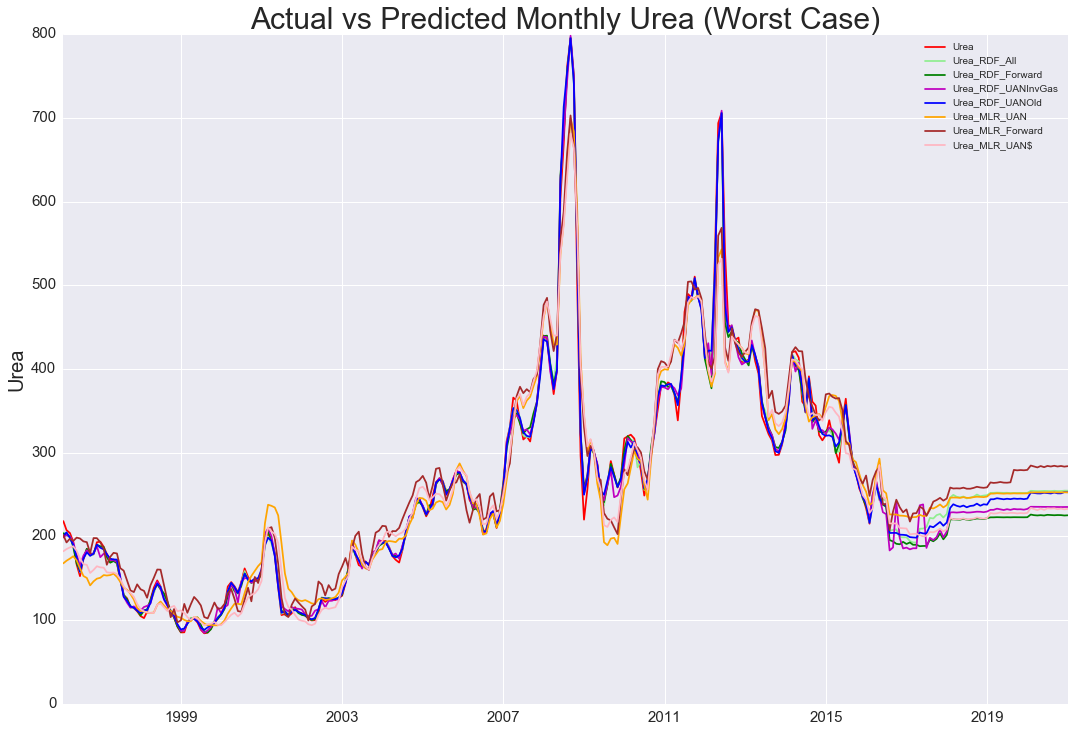

In [117]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['Urea'])
y2 = (df['Urea_RDF_All'])
y3 = (df['Urea_RDF_Forward'])
y4 = (df['Urea_RDF_UANInvGas'])
y5 = (df['Urea_RDF_UANOld'])
y6 =(df['Urea_MLR_UAN'])
y7 = (df['Urea_MLR_Forward'])
y8 = (df['Urea_MLR_UAN$'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'b')
ax.plot(x,y6,'orange')
ax.plot(x,y7,'brown')
ax.plot(x,y8,'lightpink')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()